In [1]:
library("growthrates") 

Loading required package: lattice

Loading required package: deSolve



In [3]:
data(bactgrowth) 
str(bactgrowth)

'data.frame':	2232 obs. of  5 variables:
 $ strain   : Factor w/ 3 levels "D","R","T": 3 3 3 3 3 3 3 3 3 3 ...
 $ replicate: int  2 2 2 2 2 2 2 2 2 2 ...
 $ conc     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ time     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ value    : num  0.013 0.014 0.017 0.022 0.03 0.039 0.042 0.045 0.048 0.049 ...


In [5]:
head(bactgrowth)

strain replicate conc time value
1 T      2         0    0    0.013
2 T      2         0    1    0.014
3 T      2         0    2    0.017
4 T      2         0    3    0.022
5 T      2         0    4    0.030
6 T      2         0    5    0.039

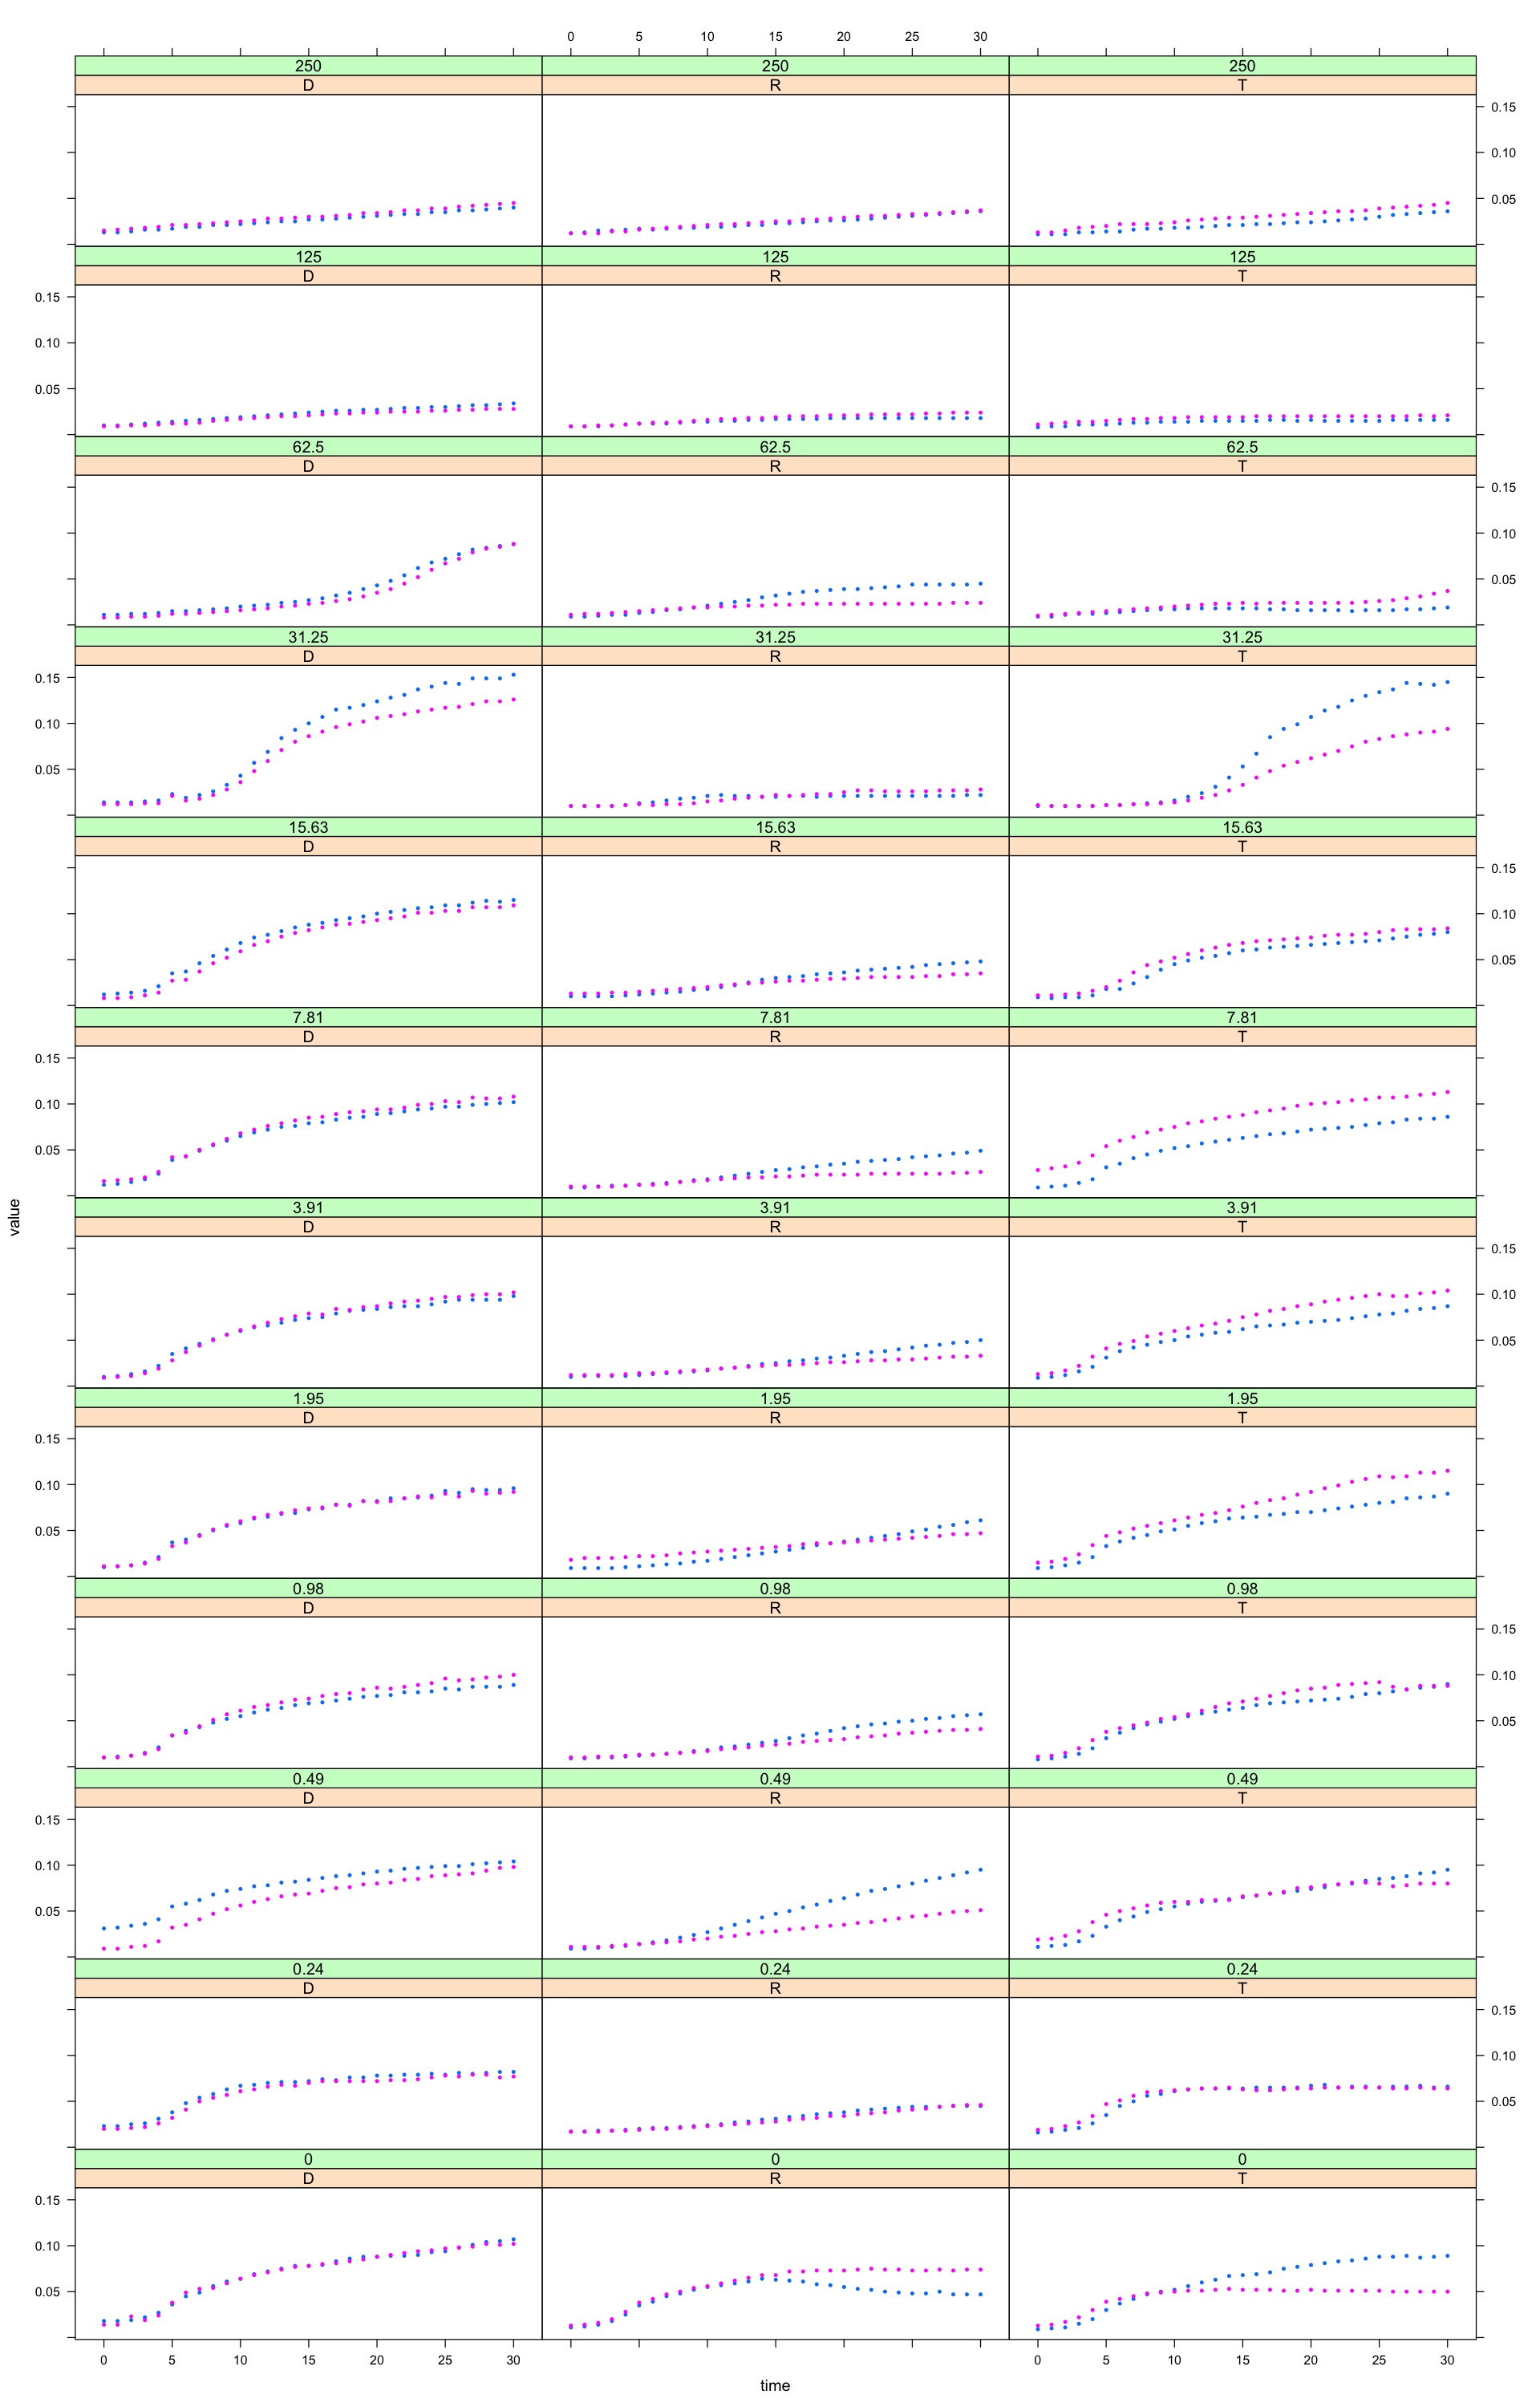

In [10]:
library(lattice) 
data(bactgrowth) 
options(repr.plot.width=16, repr.plot.height=25)


xyplot(value ~ time|strain+as.factor(conc), data = bactgrowth, groups = replicate, pch = 16, cex = 0.5)

In [11]:
splitted.data <- multisplit(bactgrowth, c("strain", "conc", "replicate")) 
dat <- splitted.data[[1]]


In [12]:
fit <- fit_easylinear(dat$time, dat$value)


In [13]:
summary(fit)


Call:
lm(formula = y ~ x)

Residuals:
       1        2        3        4        5        6 
 0.02113 -0.03716 -0.03727  0.04552  0.06376 -0.05598 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.39425    0.06429  -68.35 2.74e-07 ***
x            0.20490    0.01336   15.34 0.000105 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05587 on 4 degrees of freedom
Multiple R-squared:  0.9833,	Adjusted R-squared:  0.9791 
F-statistic: 235.3 on 1 and 4 DF,  p-value: 0.0001053


In [14]:
coef(fit)

y0     y0_lm     mumax       lag 
0.0180000 0.0123482 0.2048985 1.8392607

In [15]:
rsquared(fit) 

r2 
0.9832876

In [16]:
deviance(fit)

[1] 0.01248744

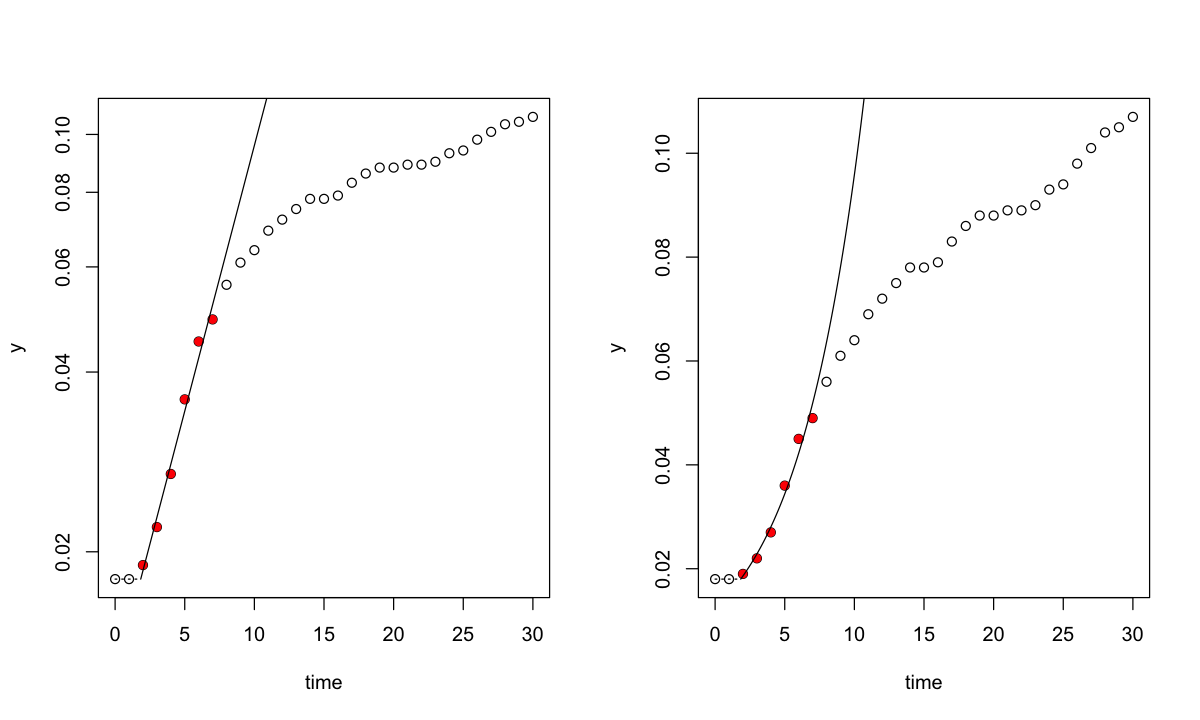

In [32]:
par(mfrow = c(1, 2)) 
options(repr.plot.width=10, repr.plot.height=6)


plot(fit, log = "y") 
plot(fit)

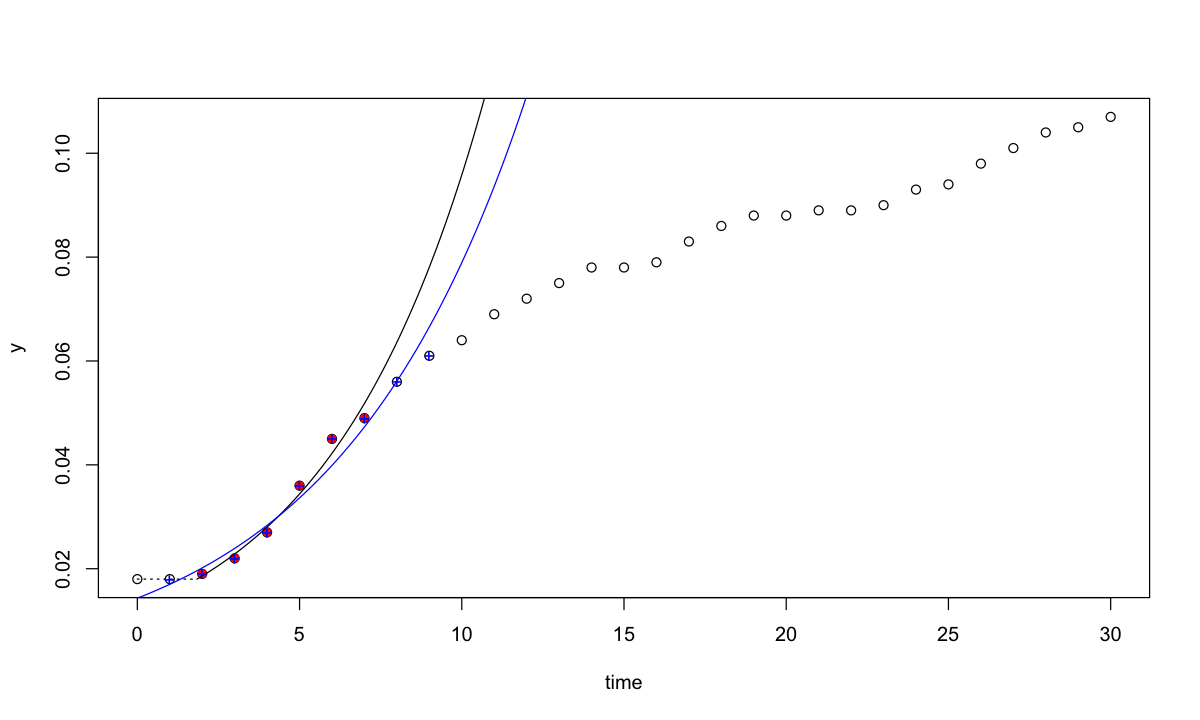

In [33]:
fitx <- fit_easylinear(dat$time, dat$value, h = 8, quota = 0.95) 
plot(fit) 
lines(fitx, pch = "+", col = "blue")

In [34]:
p<- c(y0 = 0.01, mumax = 0.2, K = 0.1)
lower <- c(y0 = 1e-6, mumax = 0,
K = 0)
upper <- c(y0 = 0.05, mumax = 5,
K = 0.5)
fit1 <- fit_growthmodel(FUN = grow_logistic, p = p, dat$time, dat$value, lower = lower, upper = upper)
p<- c(yi = 0.02, ya = 0.001, kw = 0.1, mumax = 0.2, K = 0.1)
lower <- c(yi = 1e-6, ya = 1e-6, kw = 0,
mumax = 0,
K = 0)
upper <- c(yi = 0.05, ya = 0.05, kw = 10,
mumax = 5,
K = 0.5)
fit2 <- fit_growthmodel(FUN = grow_twostep, p = p, time = dat$time, y = dat$value, lower = lower, upper = upper)
coef(fit1) ##

y0      mumax          K 
0.01748268 0.20006908 0.09962612

In [35]:
coef(fit2)

yi          ya          kw       mumax           K 
0.014595131 0.003854939 5.710969436 0.194236453 0.100192749

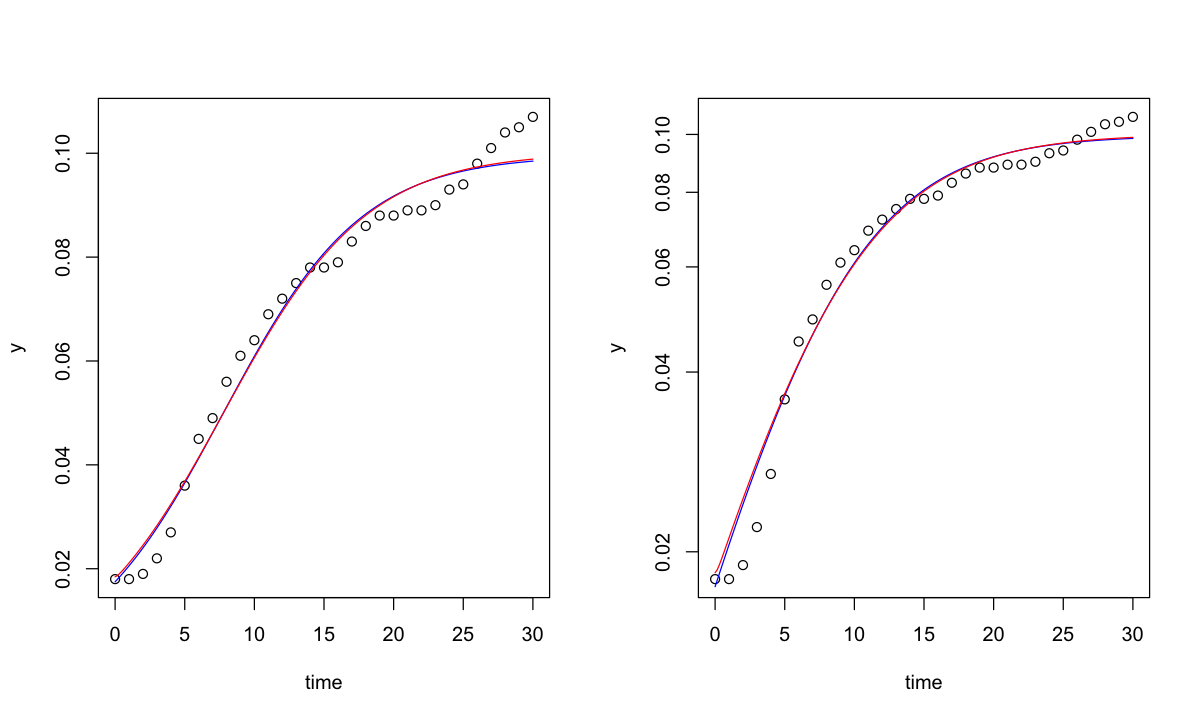

In [36]:

#Estimation of Growth Rates with Package growthrates

## mumax ya yi ## 0.014224009 0.003910263 3.884232782 0.199236020 0.099856849
par(mfrow = c(1, 2)) 
plot(fit1) 
lines(fit2, col = "red")
plot(fit1, log = "y") 
lines(fit2, col = "red")

In [37]:
fit3 <- fit_growthmodel(FUN = grow_twostep, p = p, time = dat$time, y = dat$value, lower = lower, upper = upper, which = c("kw", "mumax", "K"))
summary(fit3)



Parameters:
      Estimate Std. Error t value Pr(>|t|)    
kw    9.893017   3.934852   2.514    0.018 *  
mumax 0.174837   0.014905  11.730 2.54e-12 ***
K     0.101958   0.002516  40.522  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.00452 on 28 degrees of freedom

Parameter correlation:
           kw   mumax       K
kw     1.0000 -0.8813  0.5842
mumax -0.8813  1.0000 -0.8083
K      0.5842 -0.8083  1.0000

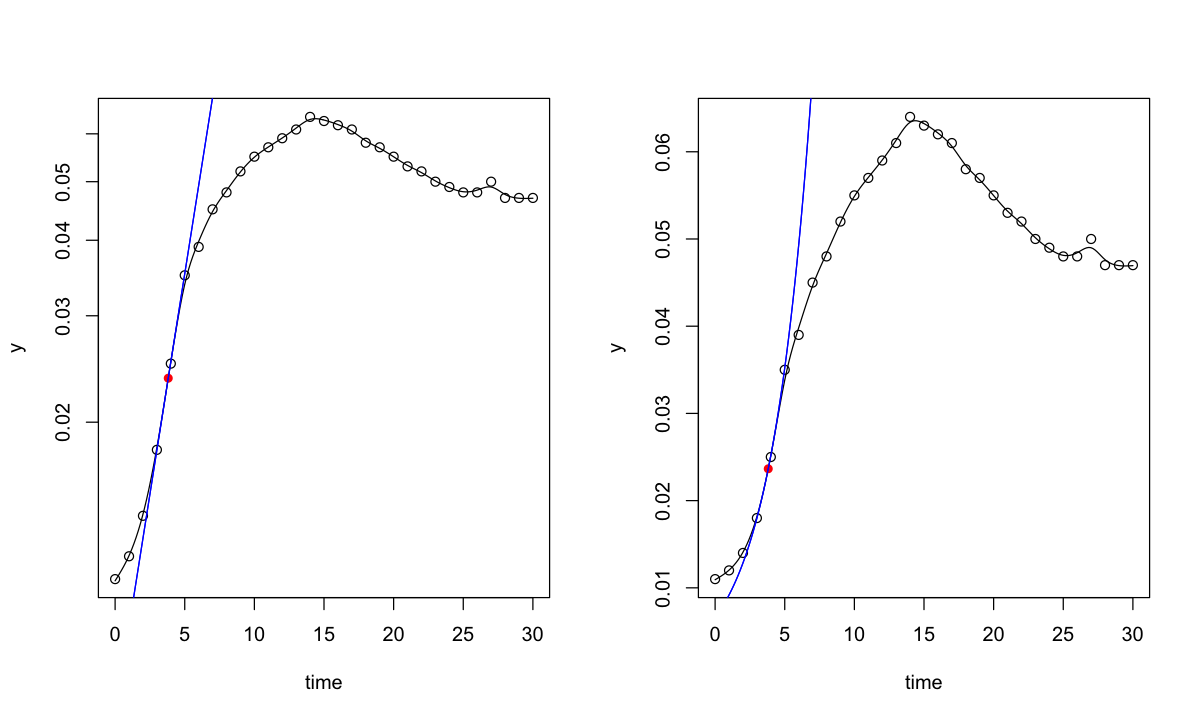

In [46]:
dat <- splitted.data[[2]] 
time <- dat$time
y<- dat$value
#y
## automatic smoothing with cv 
res <- fit_spline(time, y)
par(mfrow = c(1, 2)) 
plot(res, log = "y") 
plot(res)

In [47]:
coef(res)

y0       mumax 
0.006562443 0.335991063

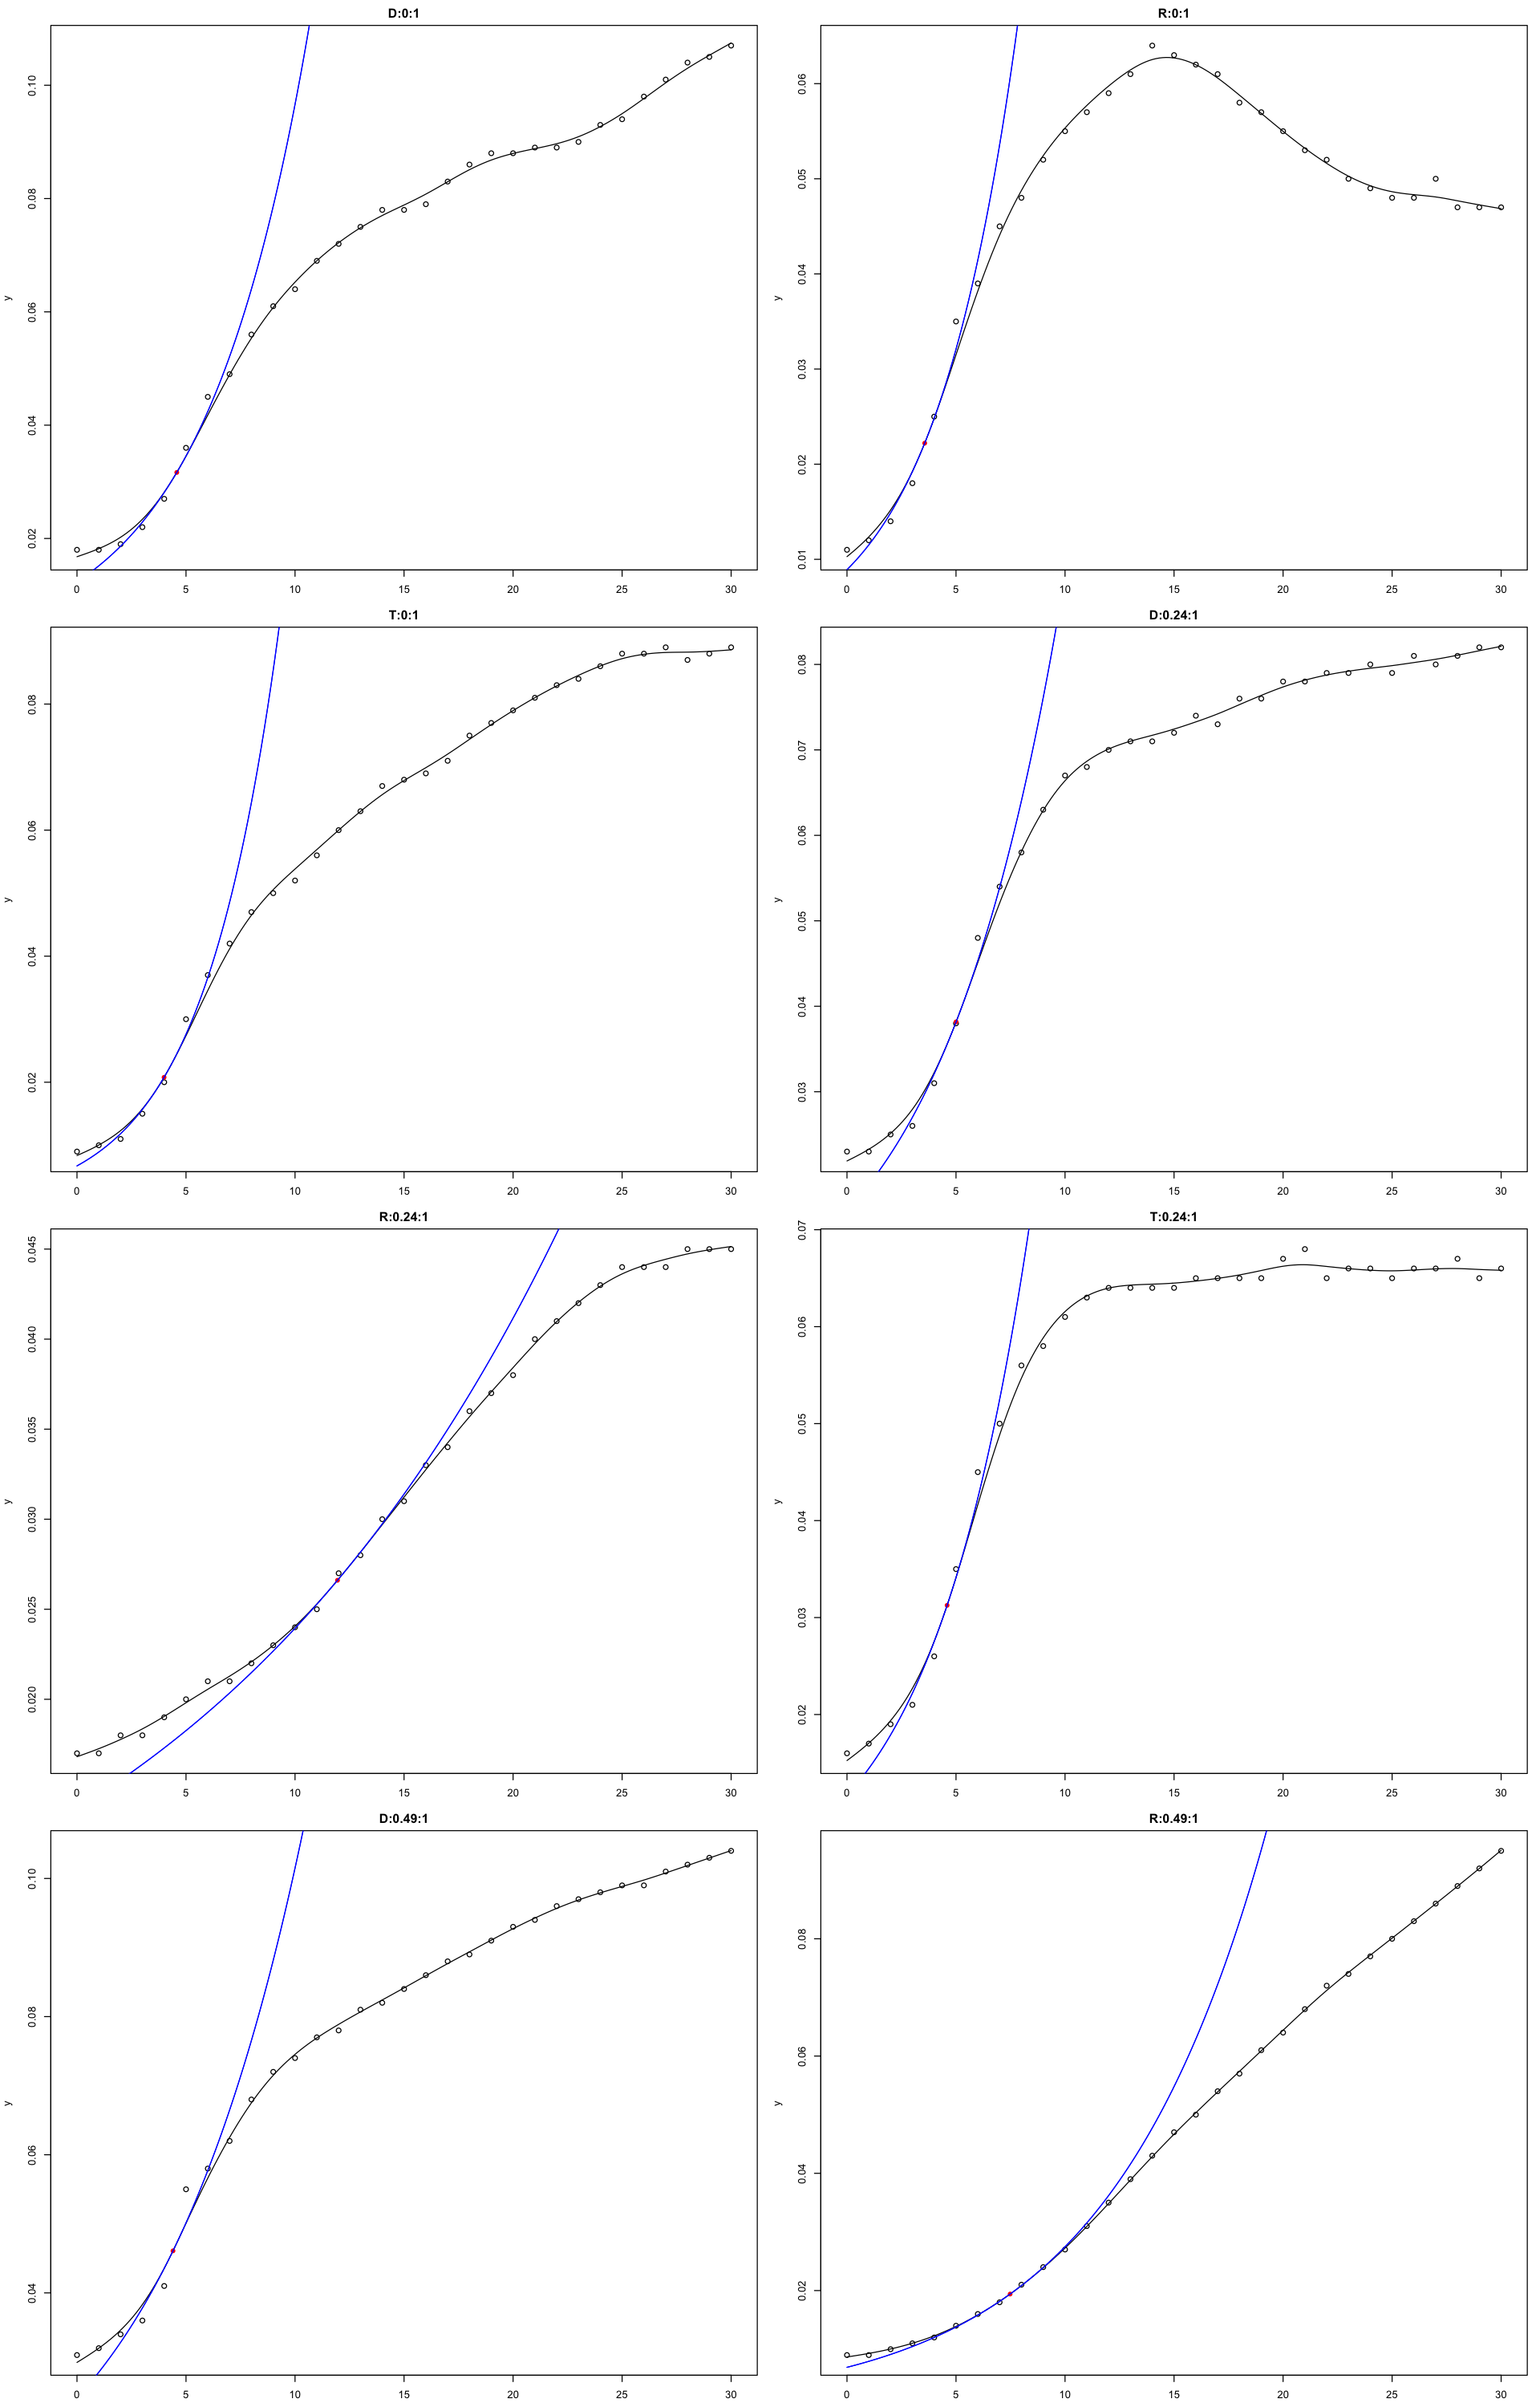

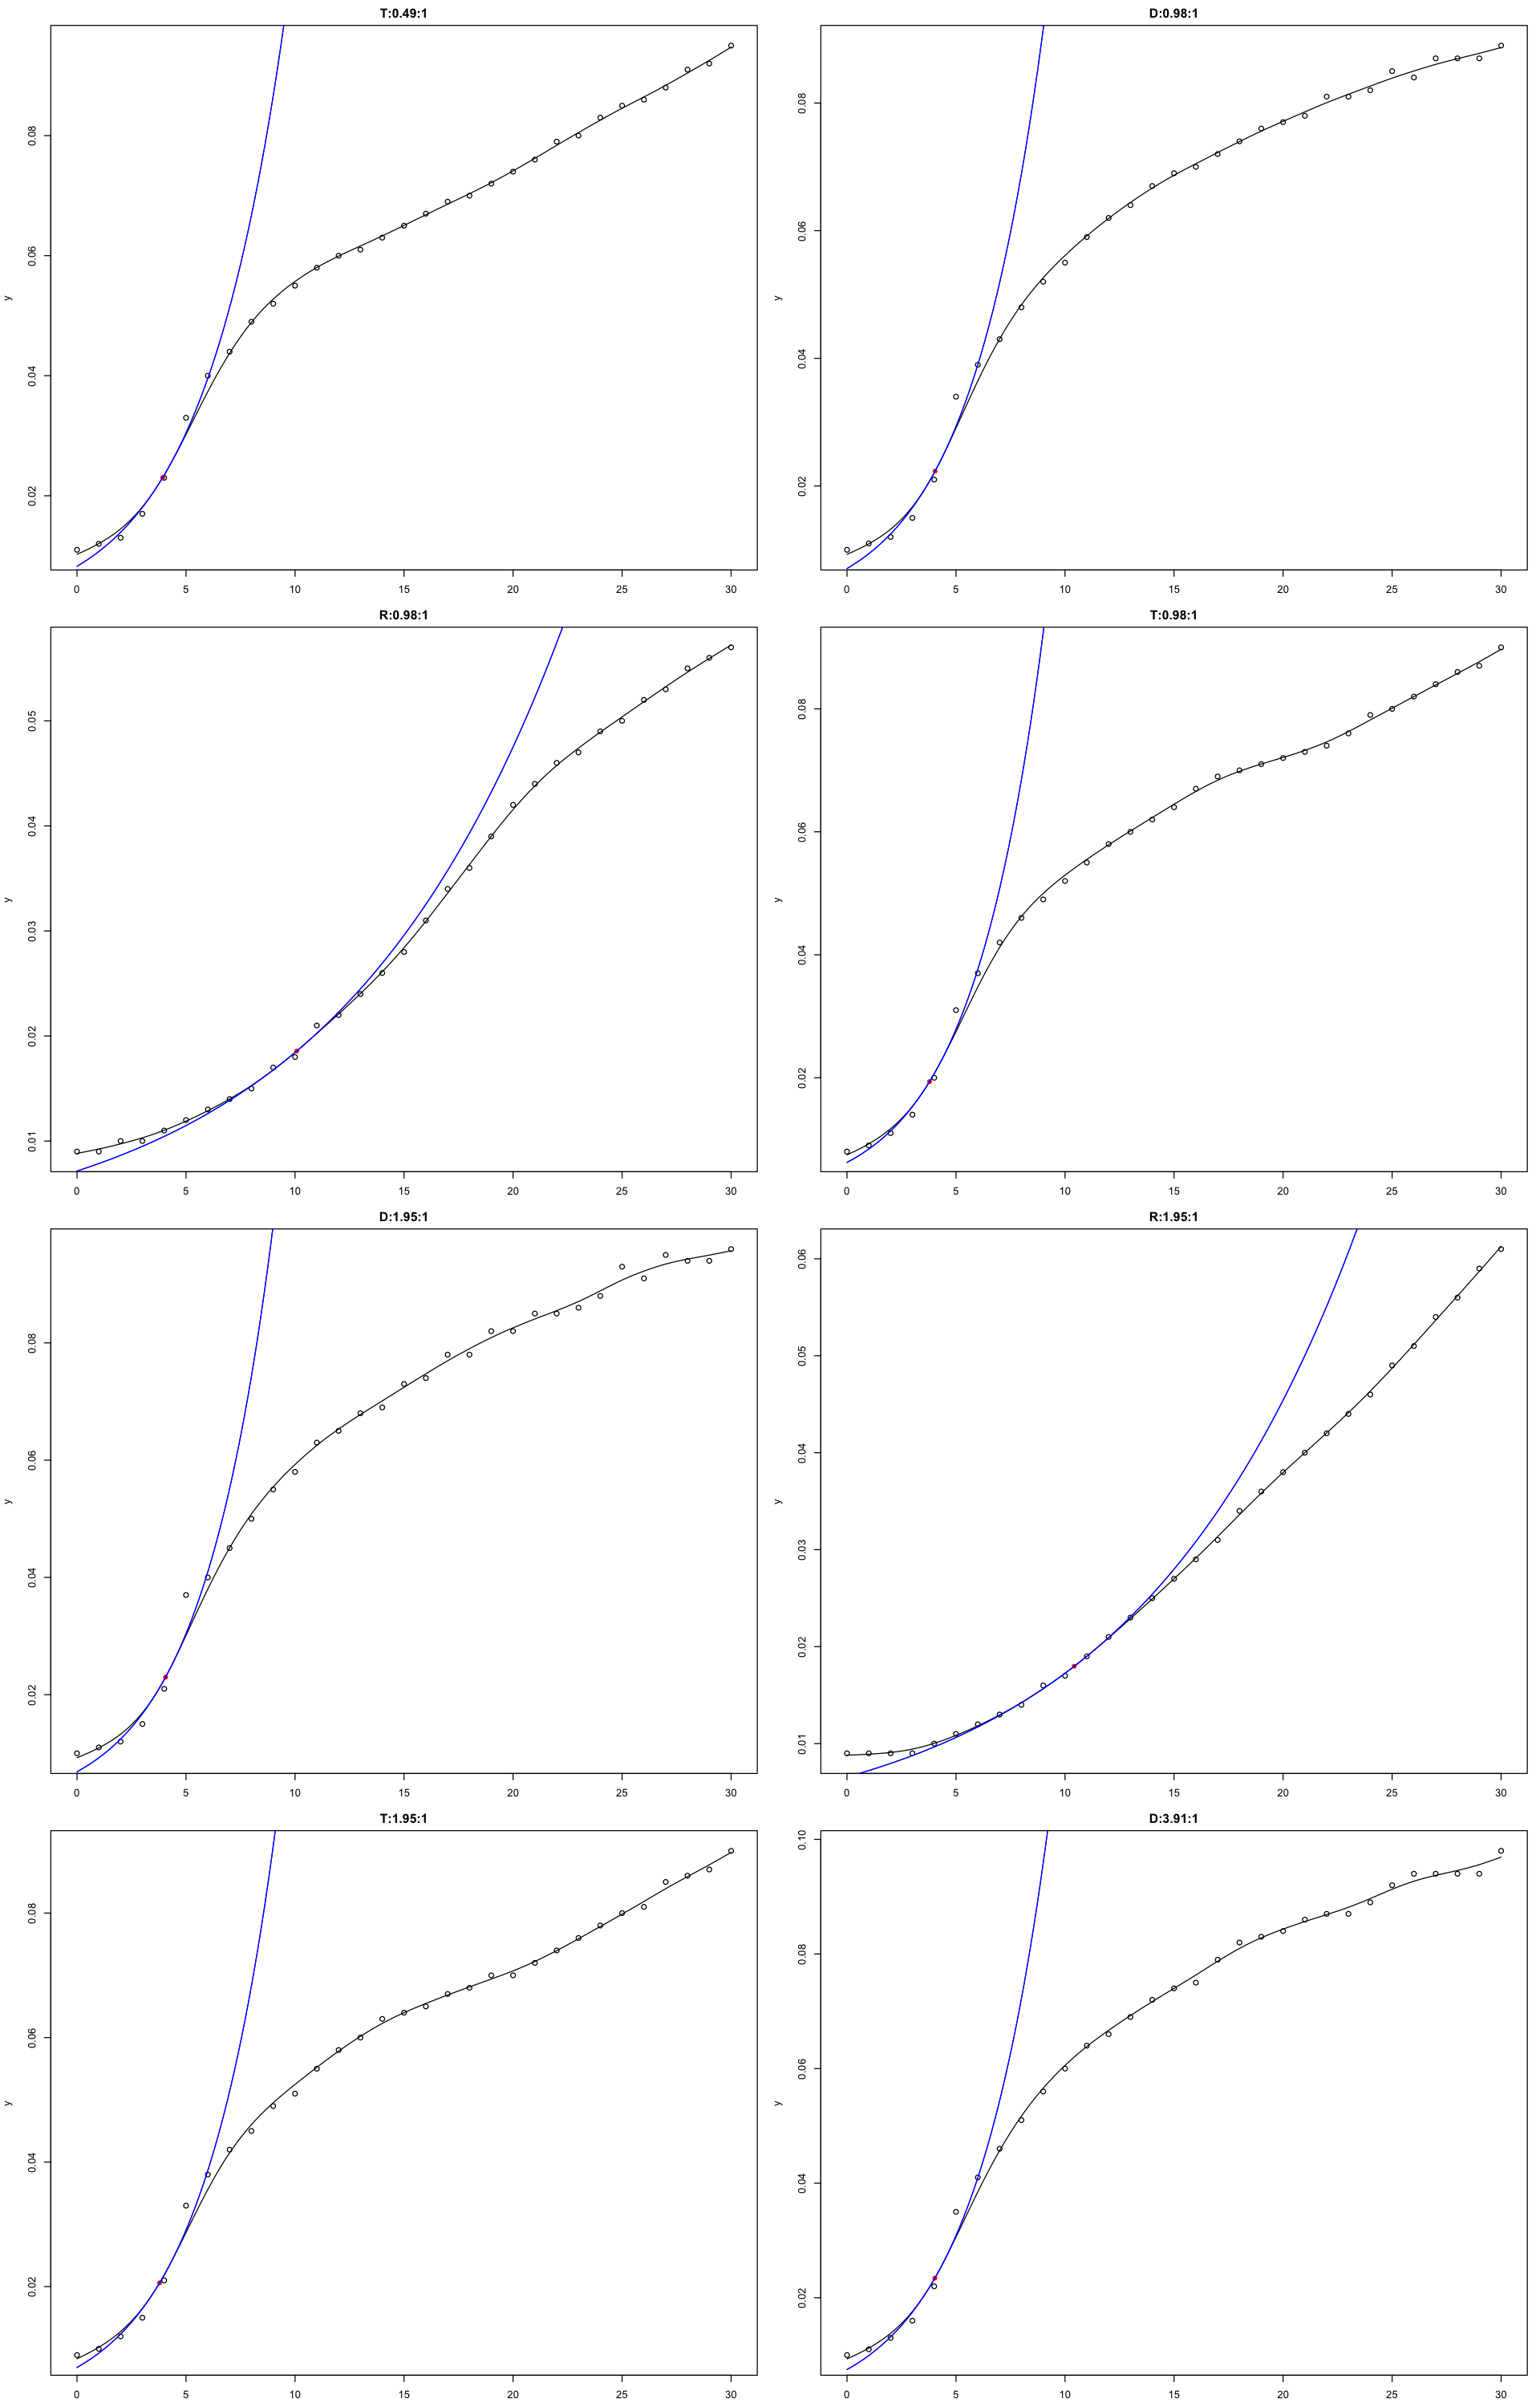

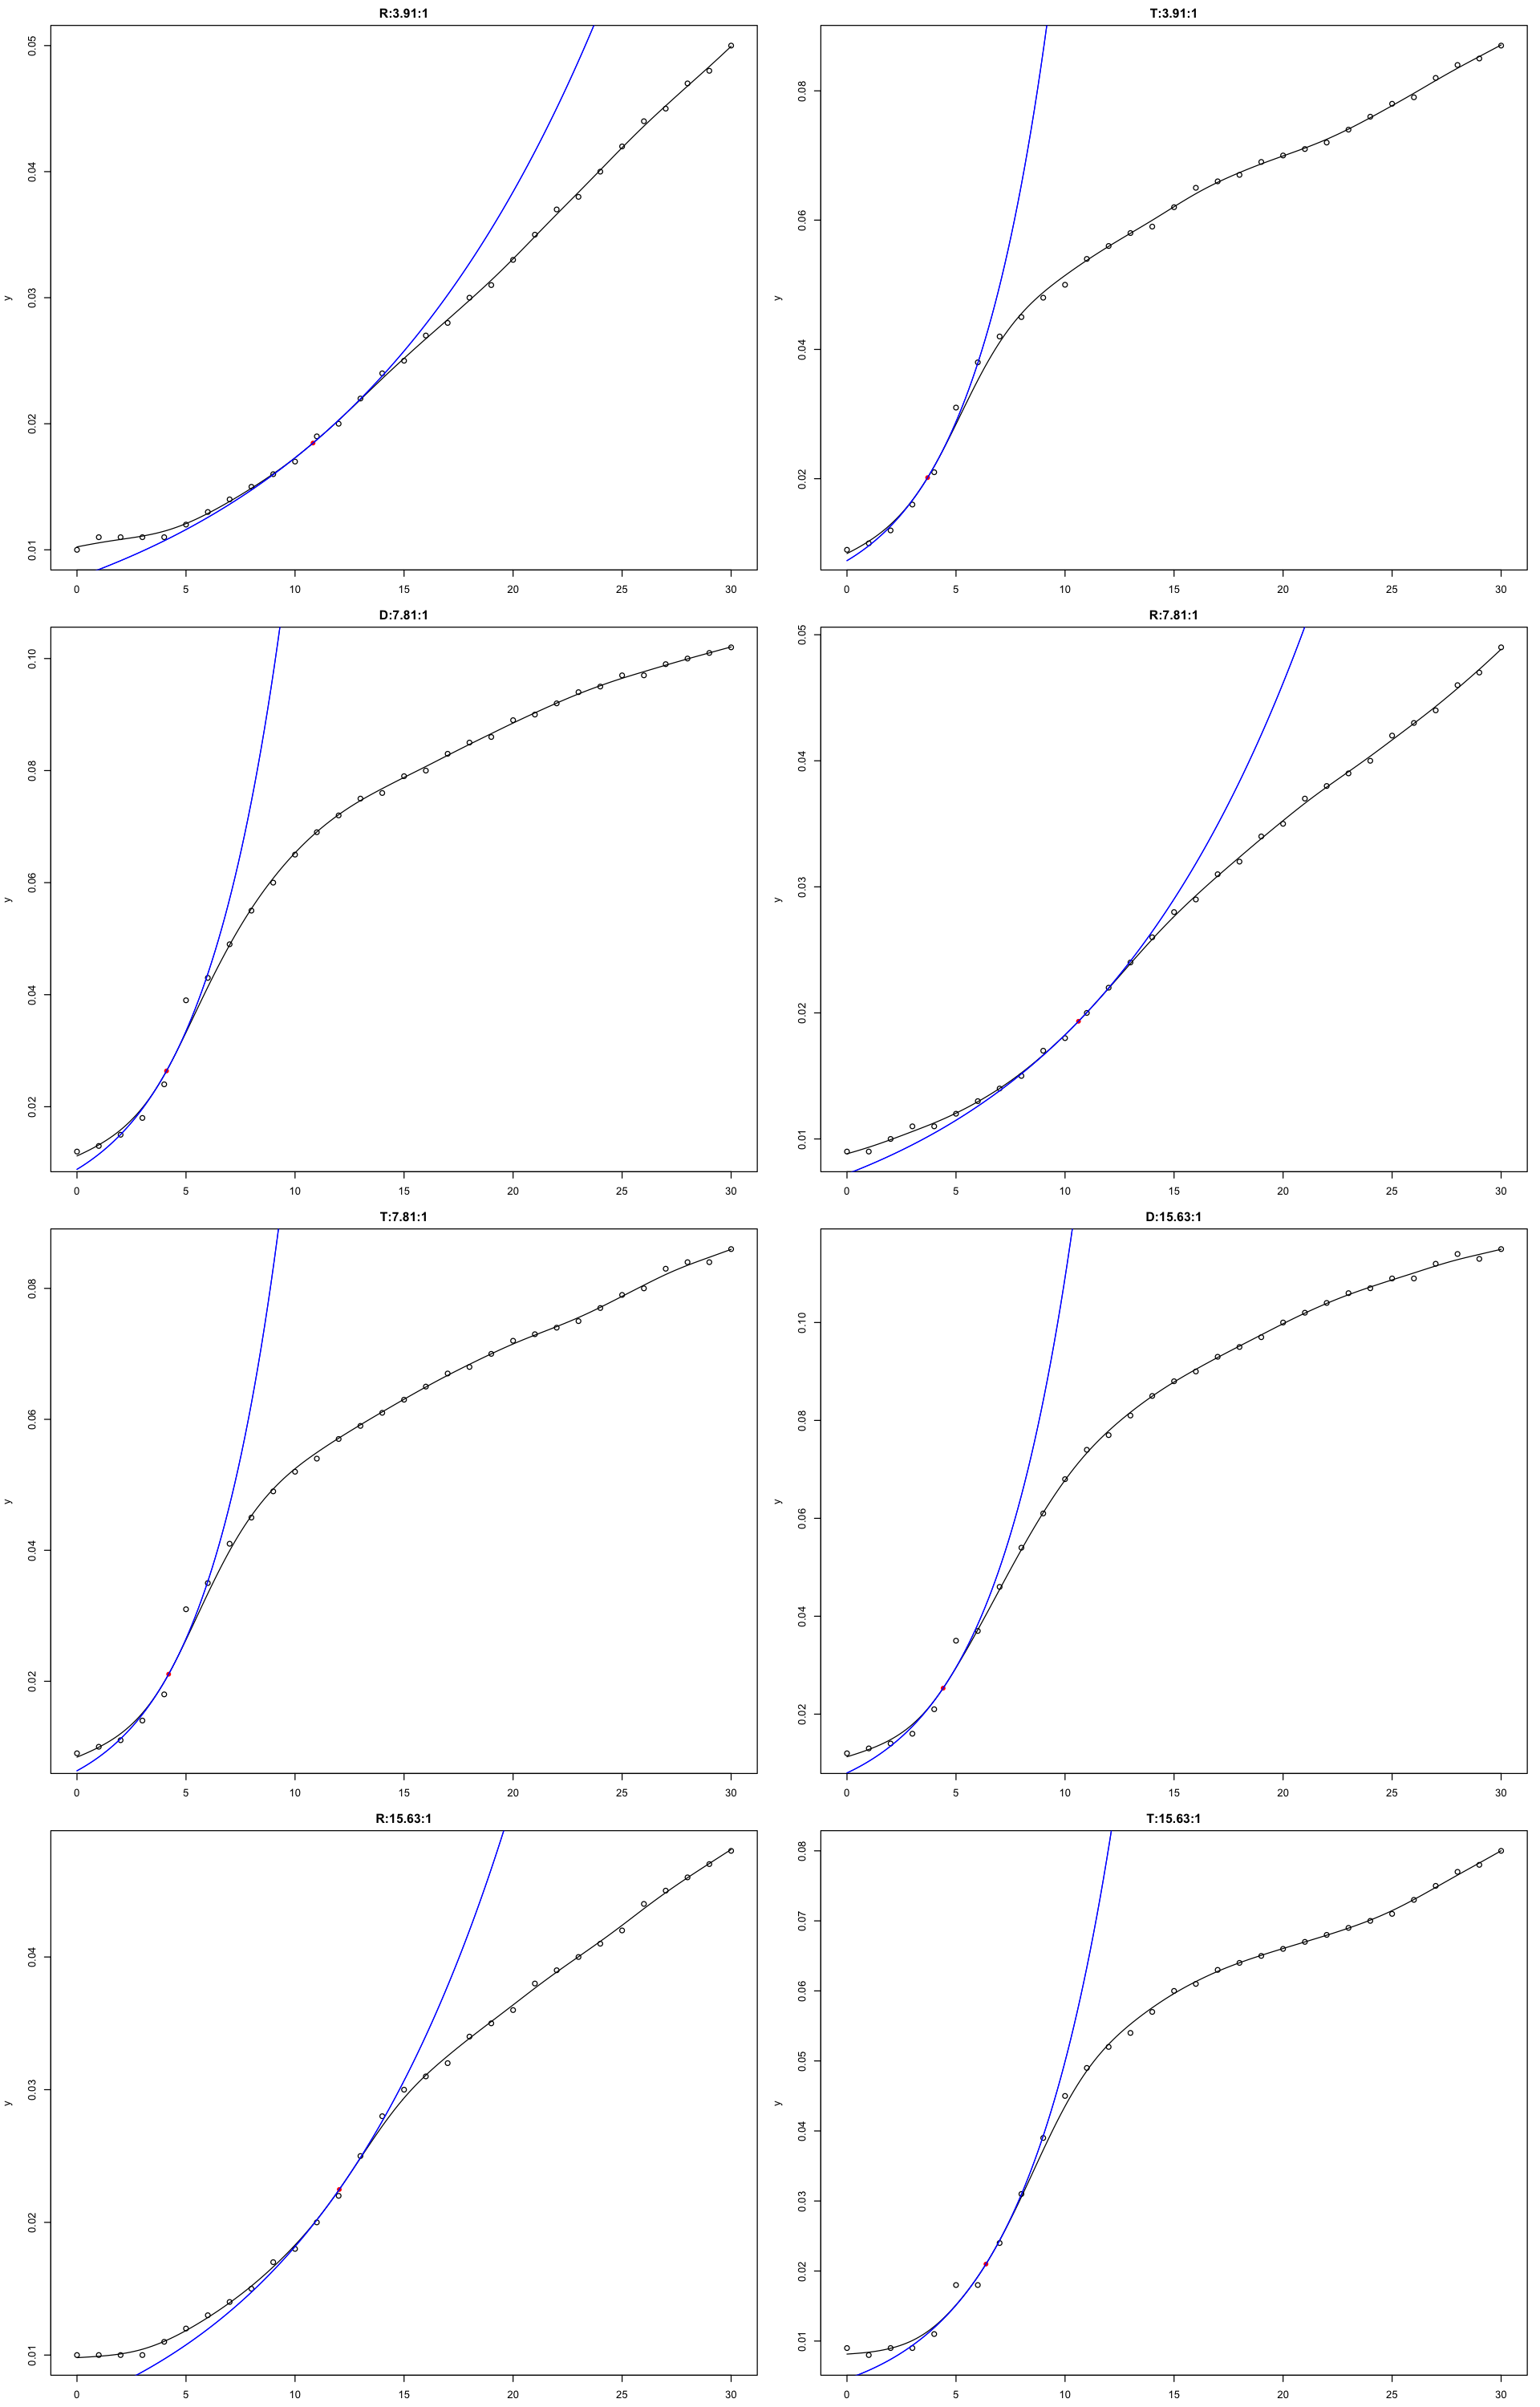

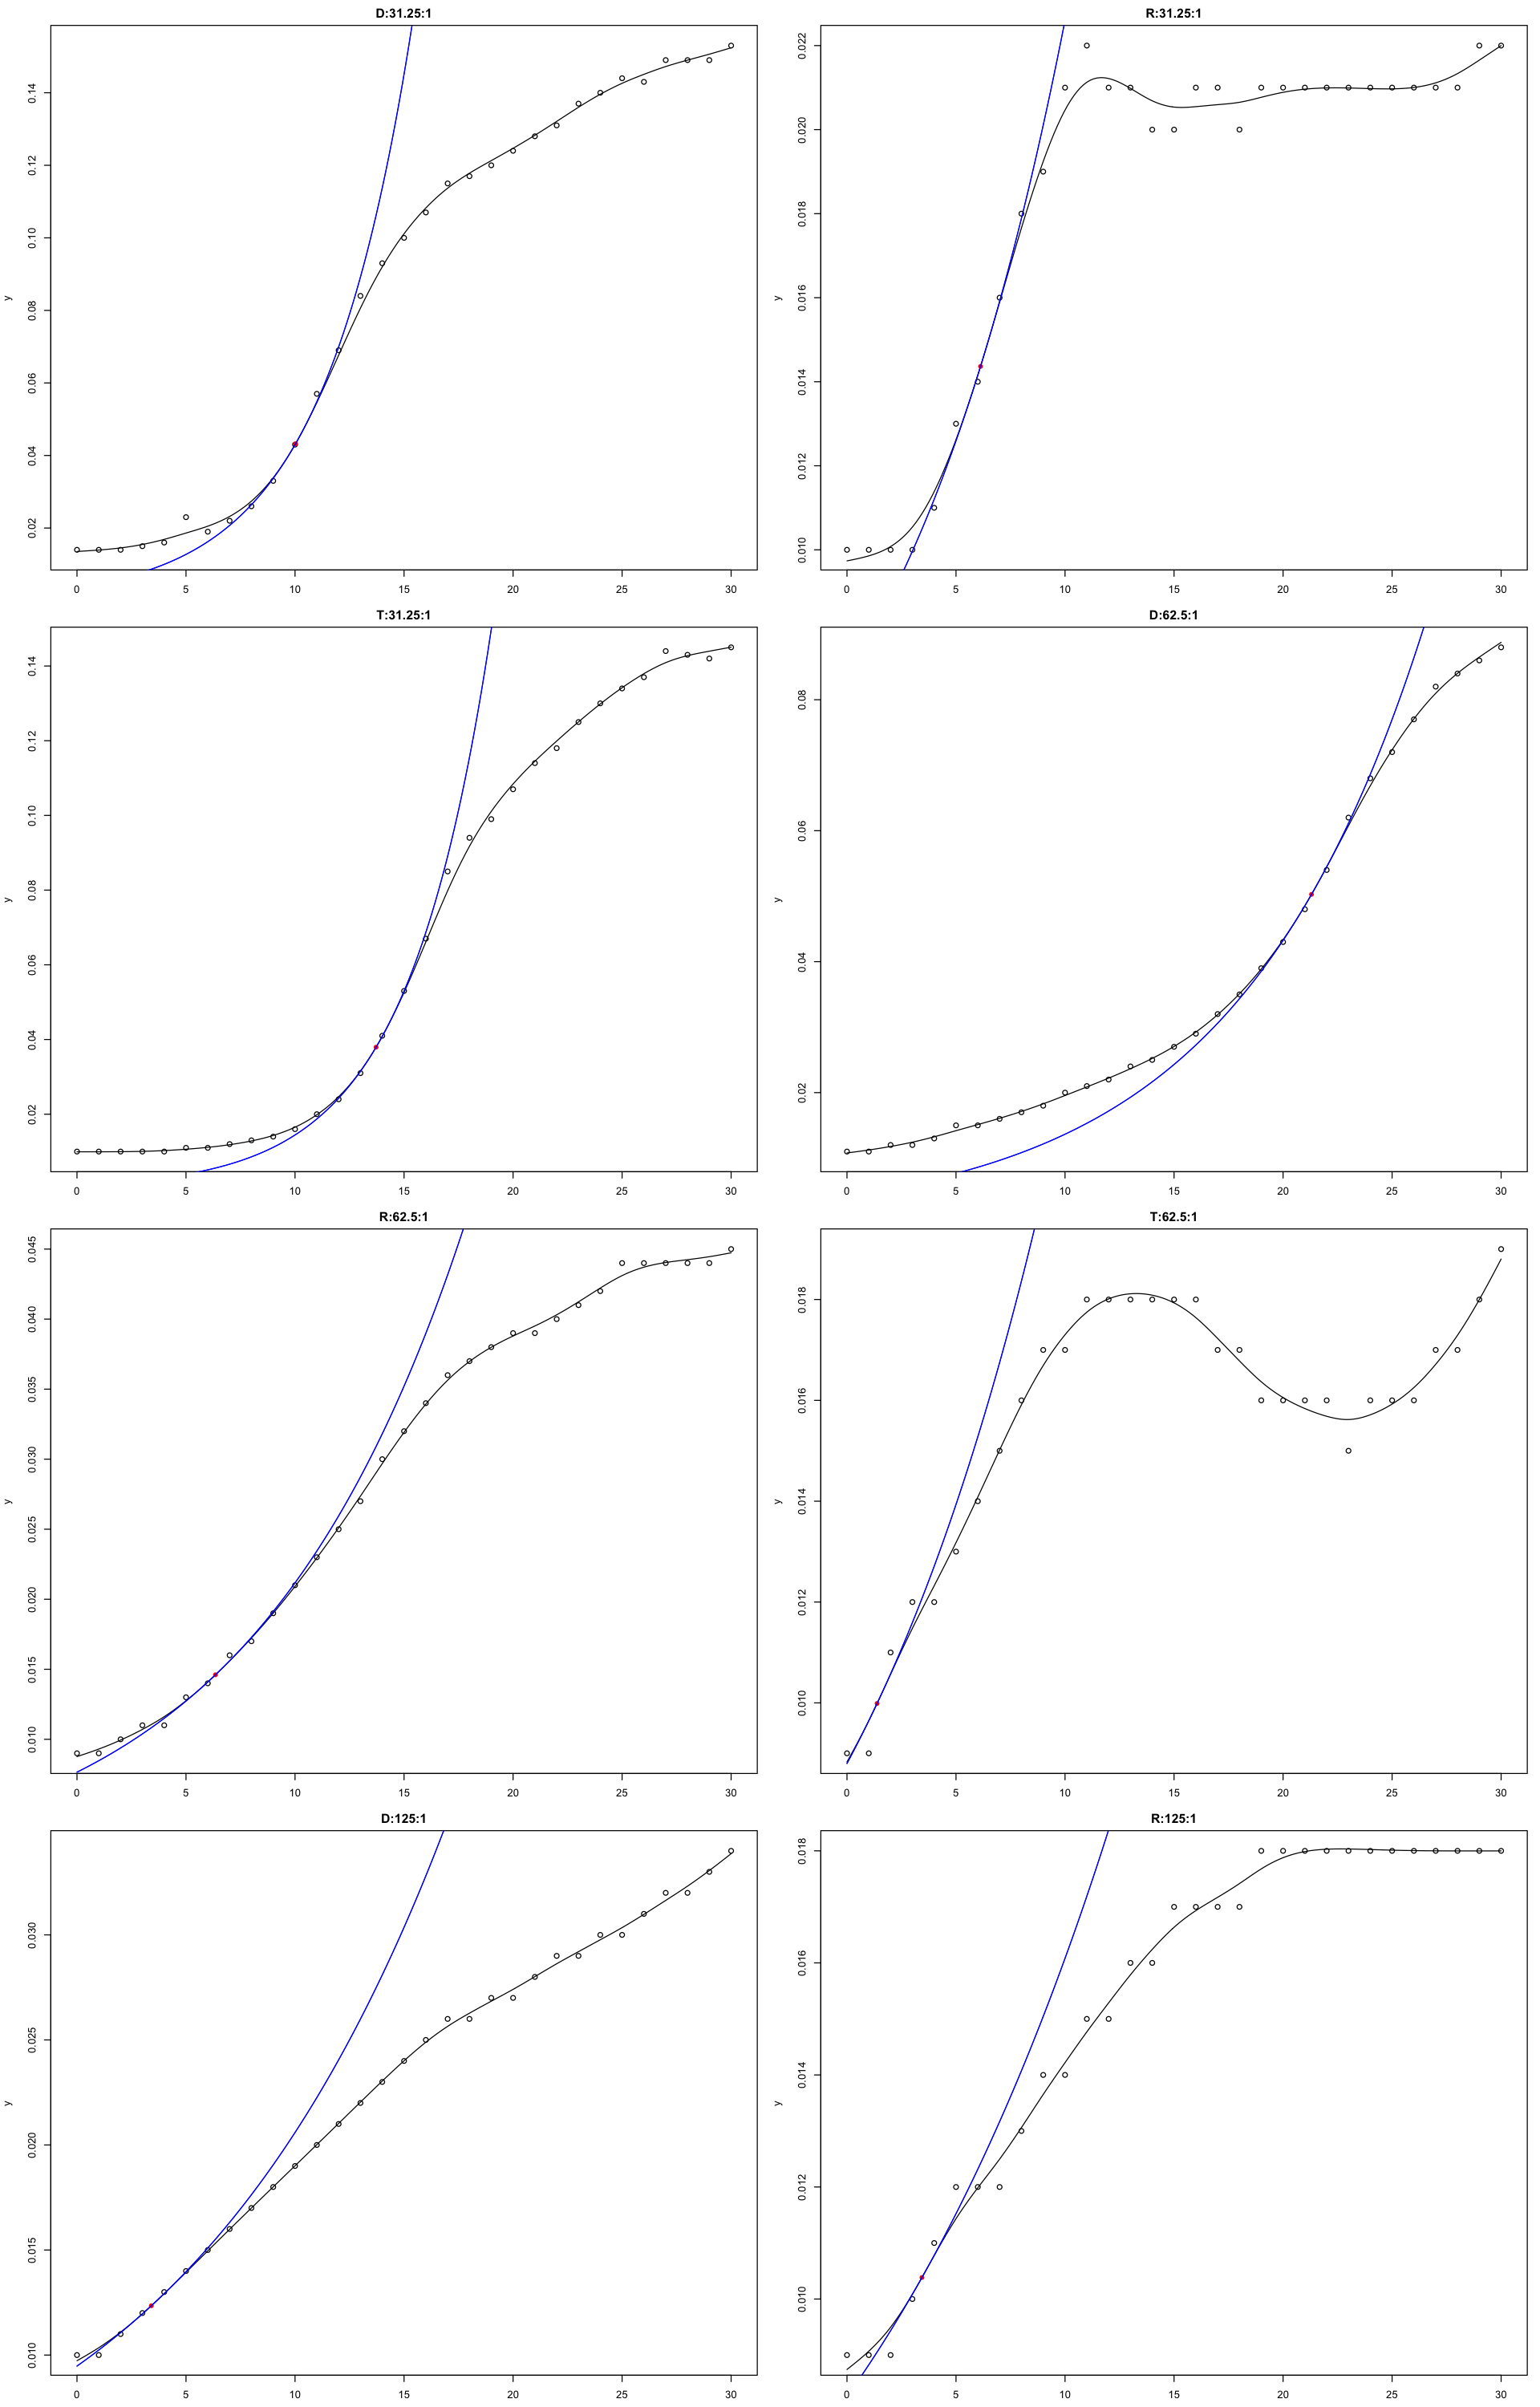

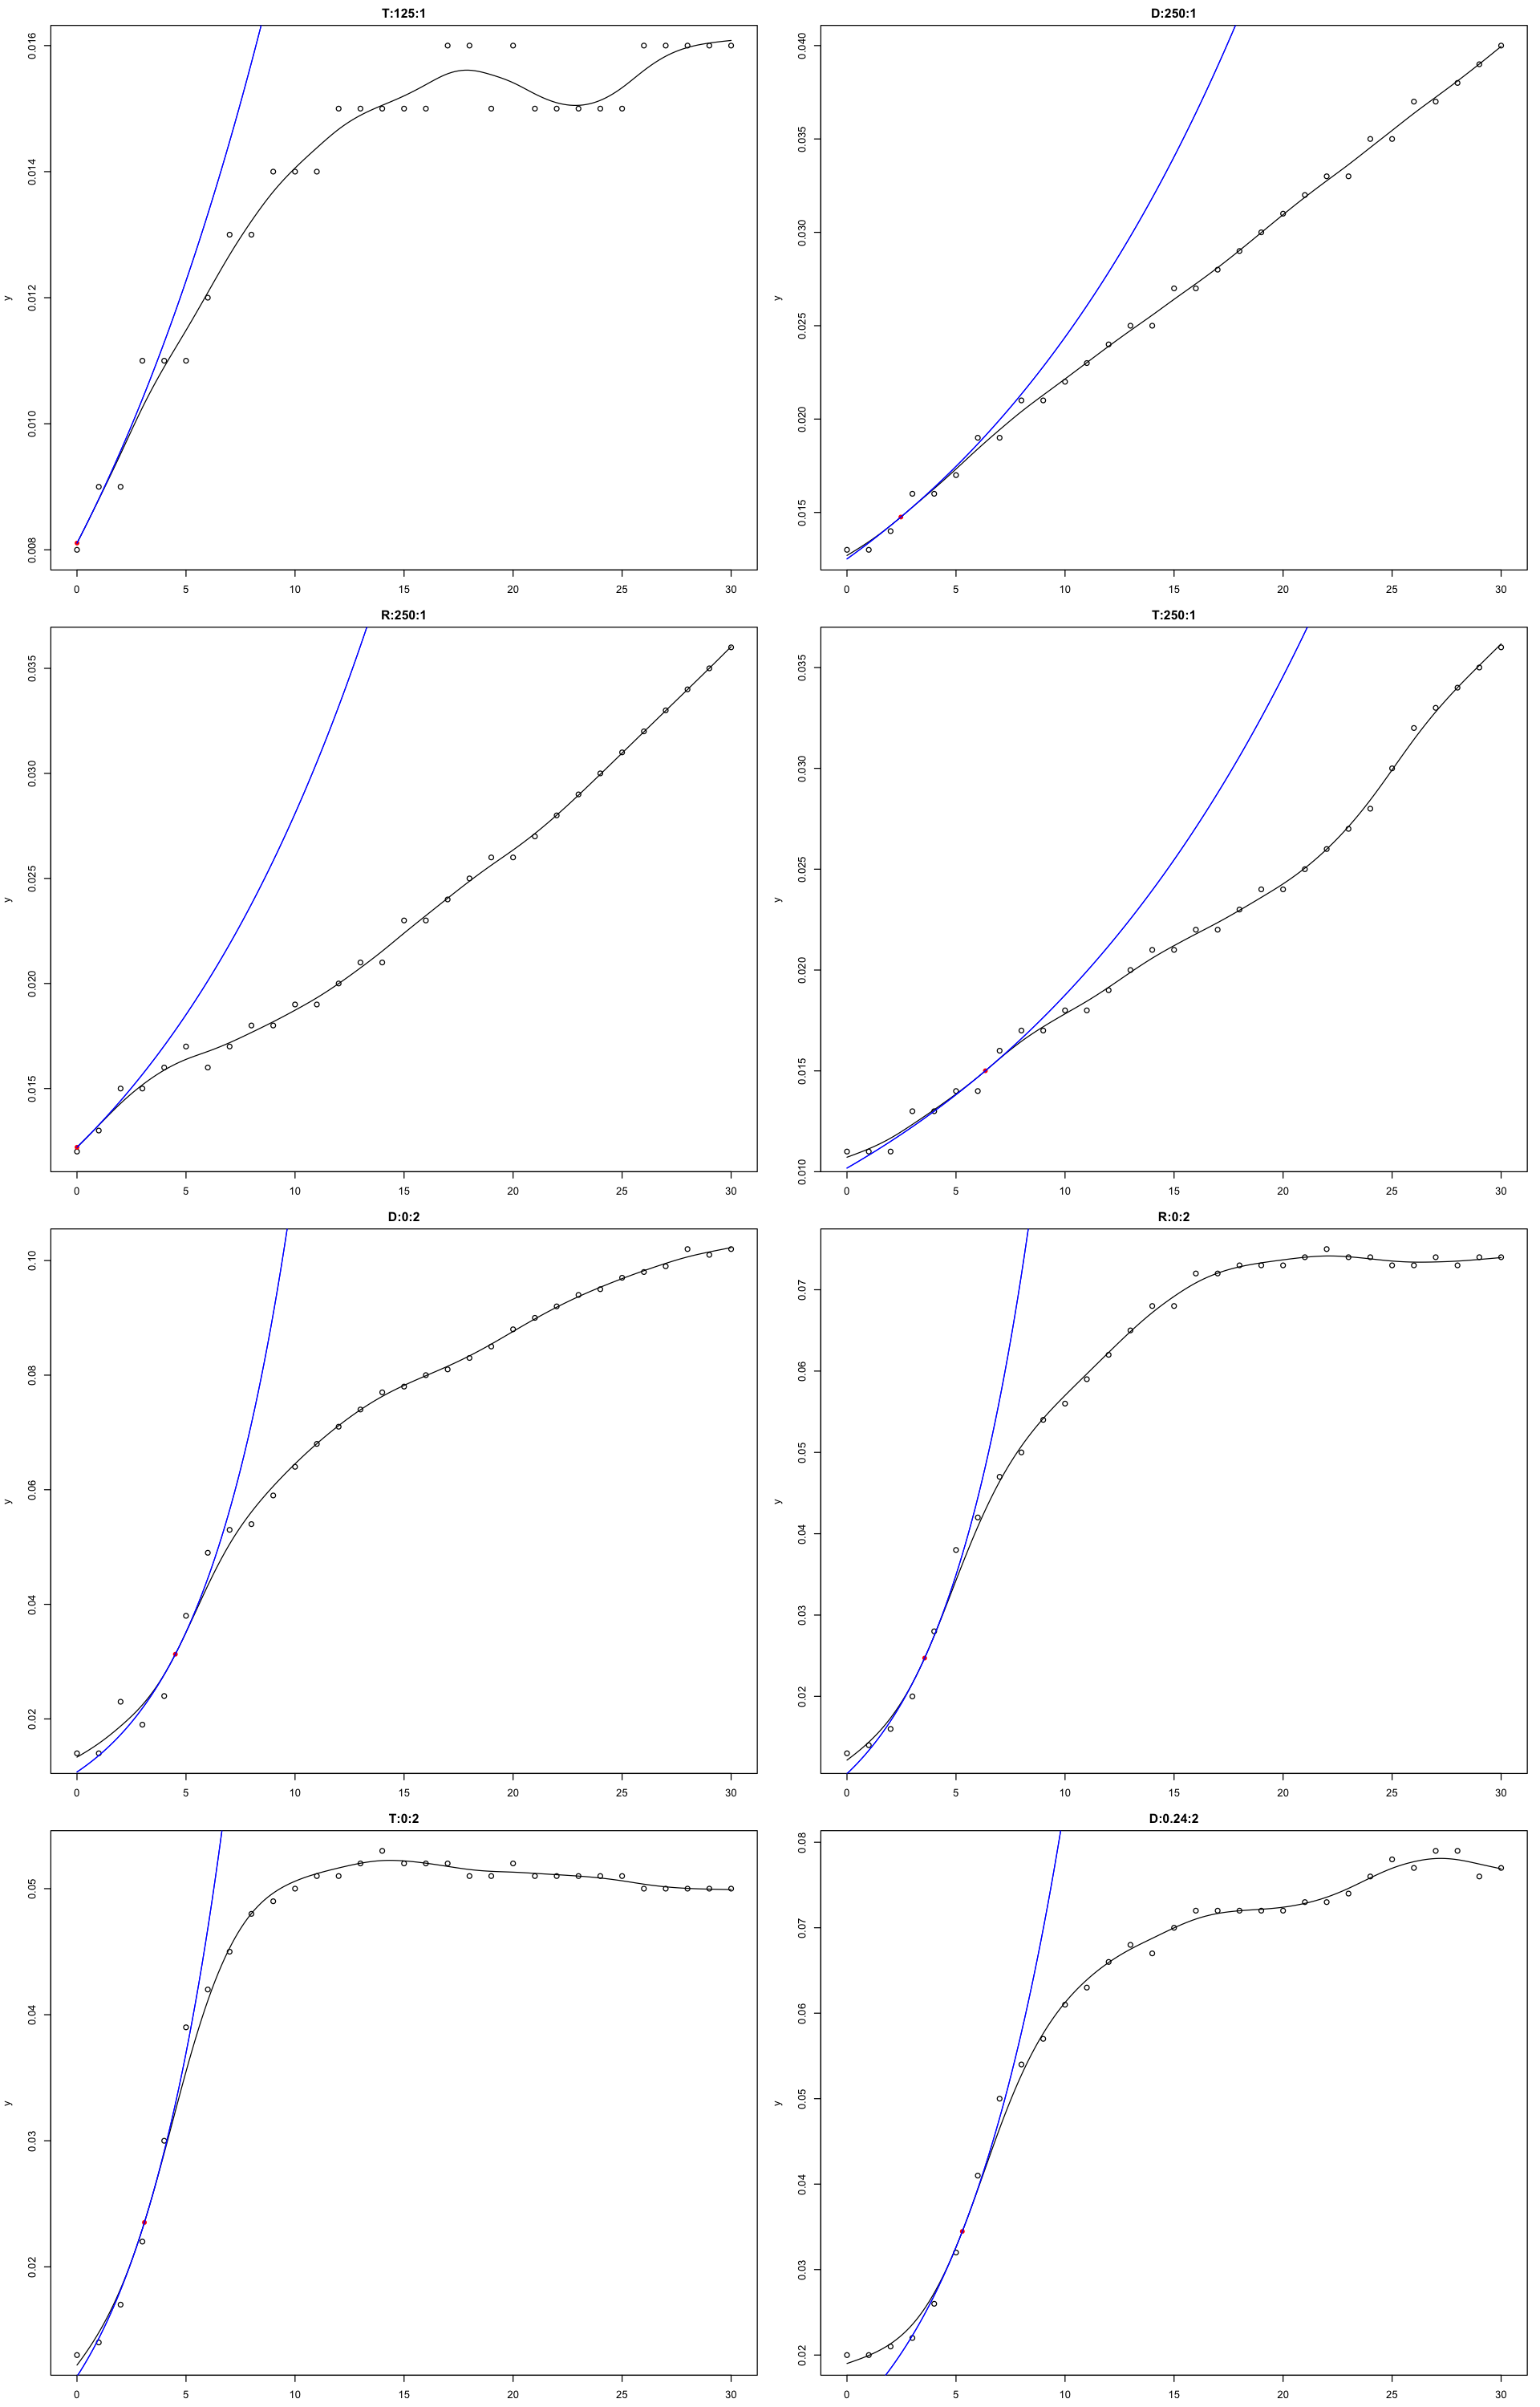

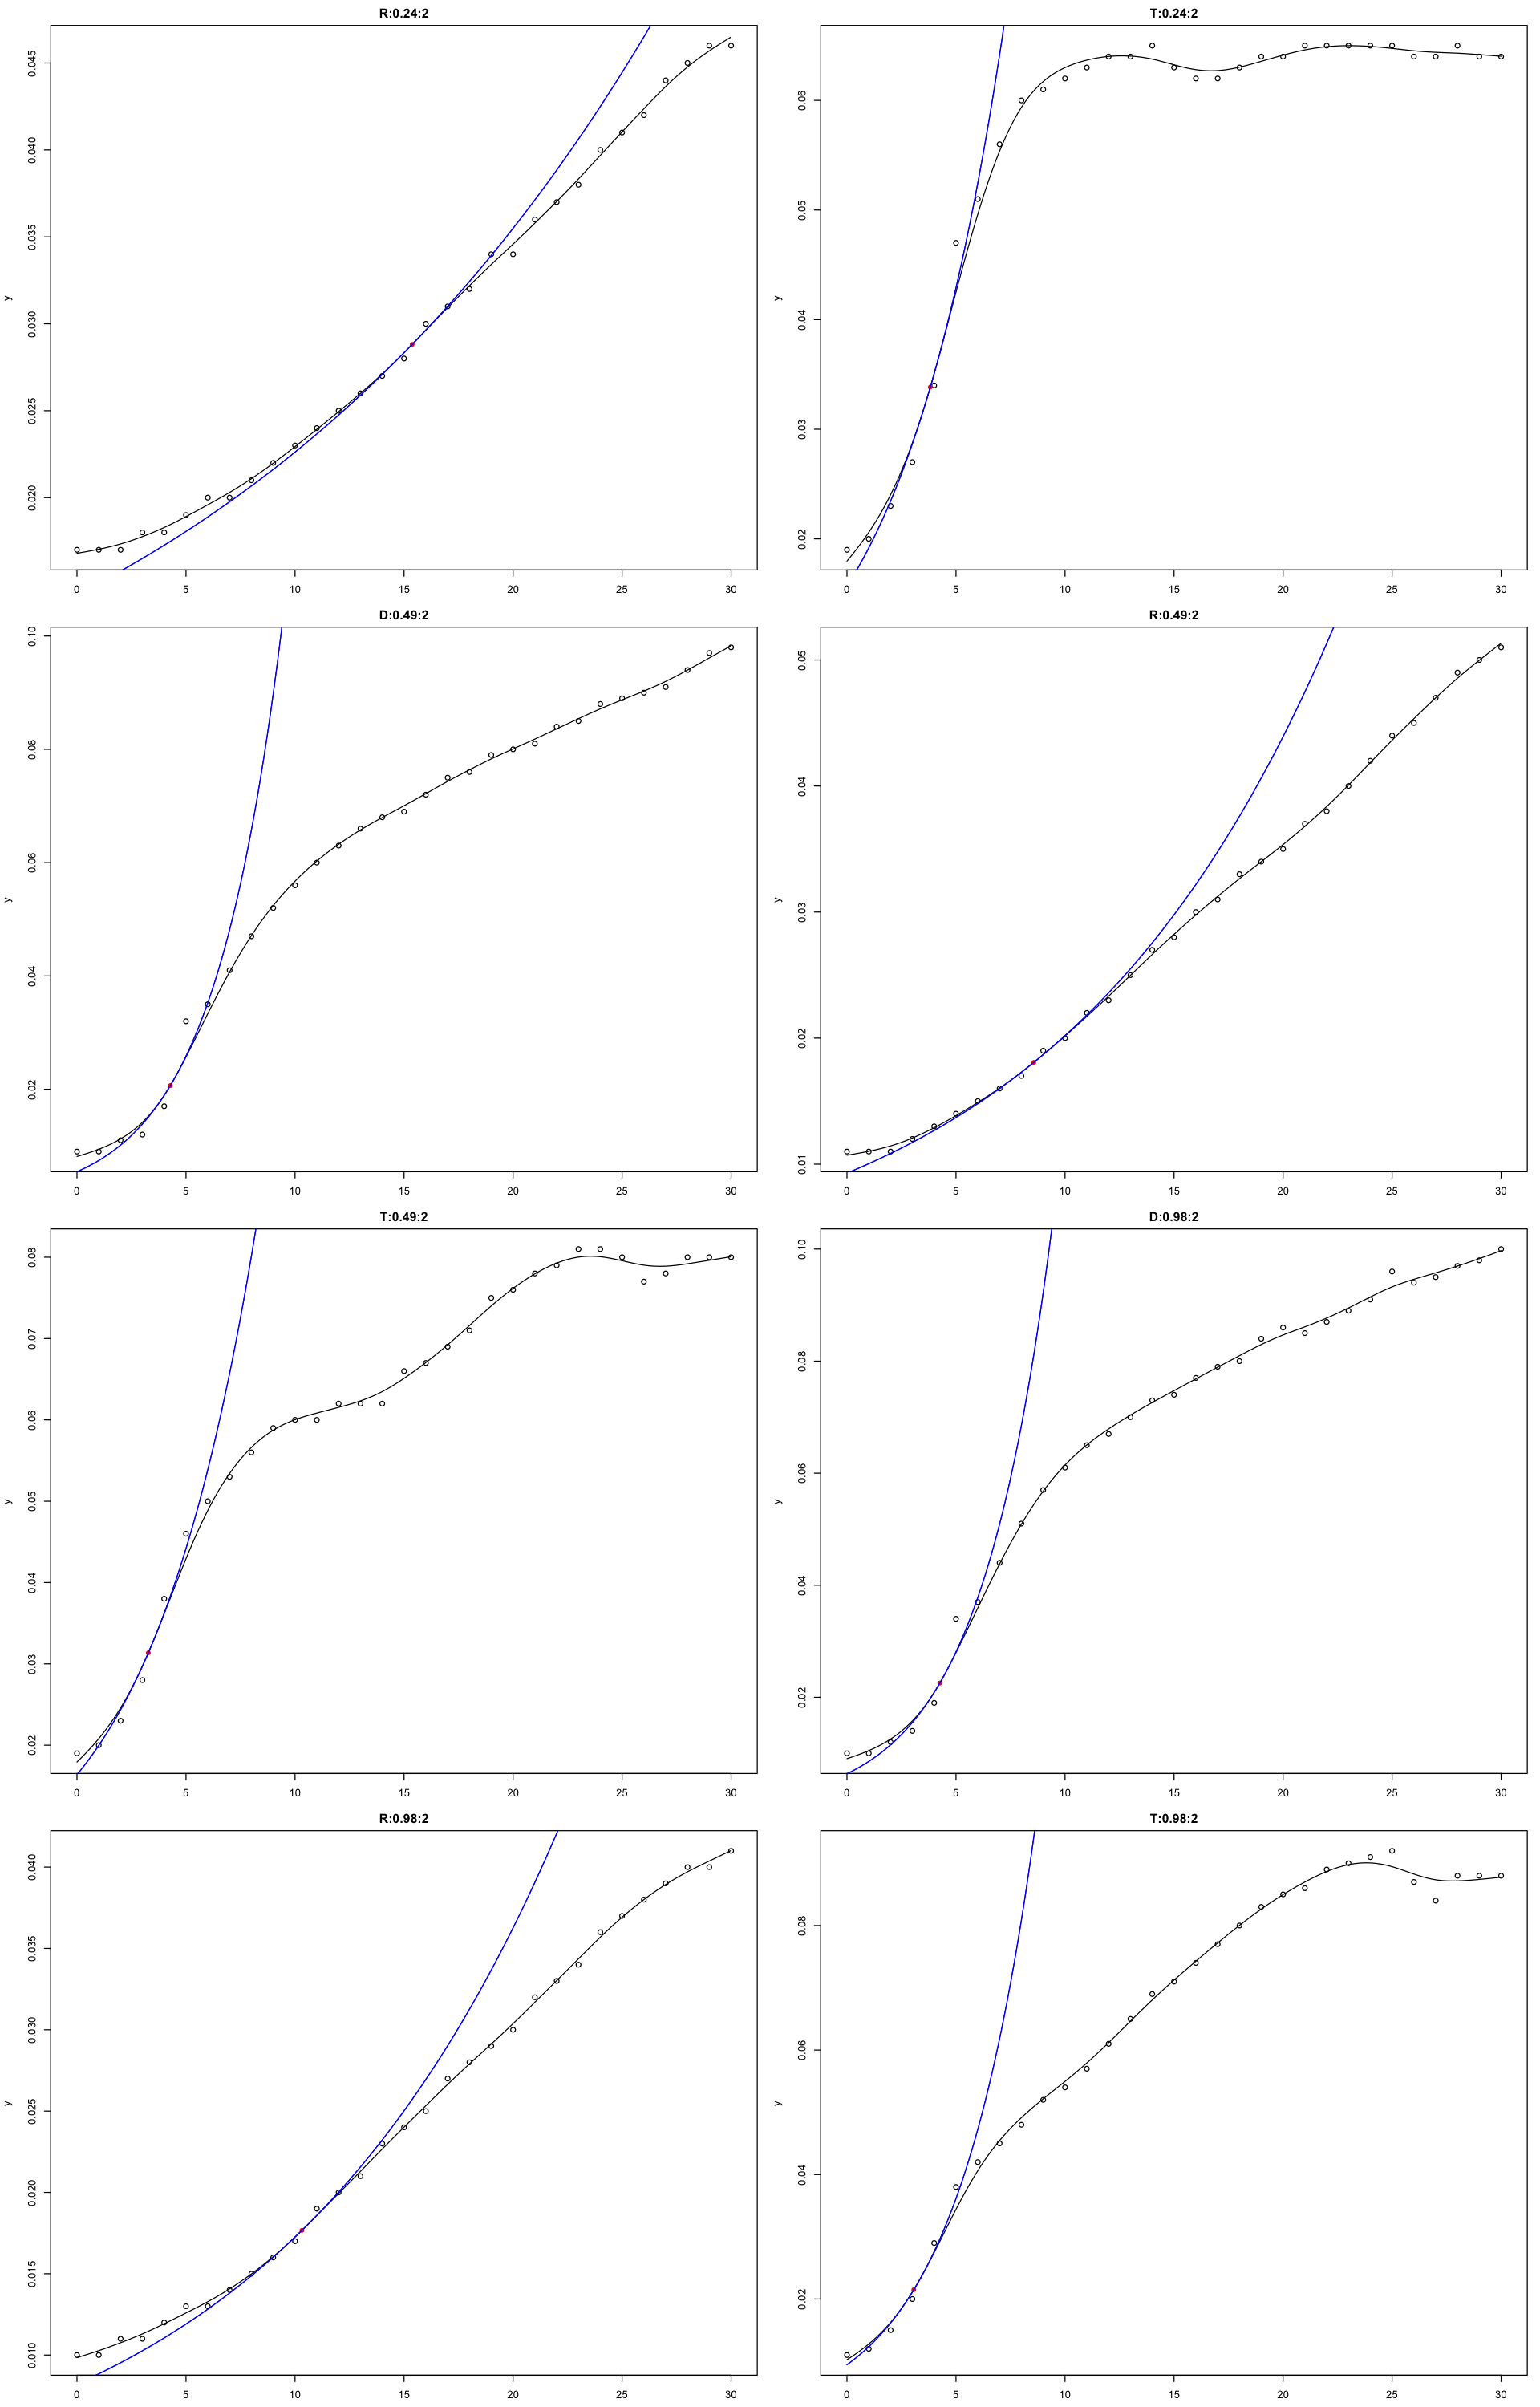

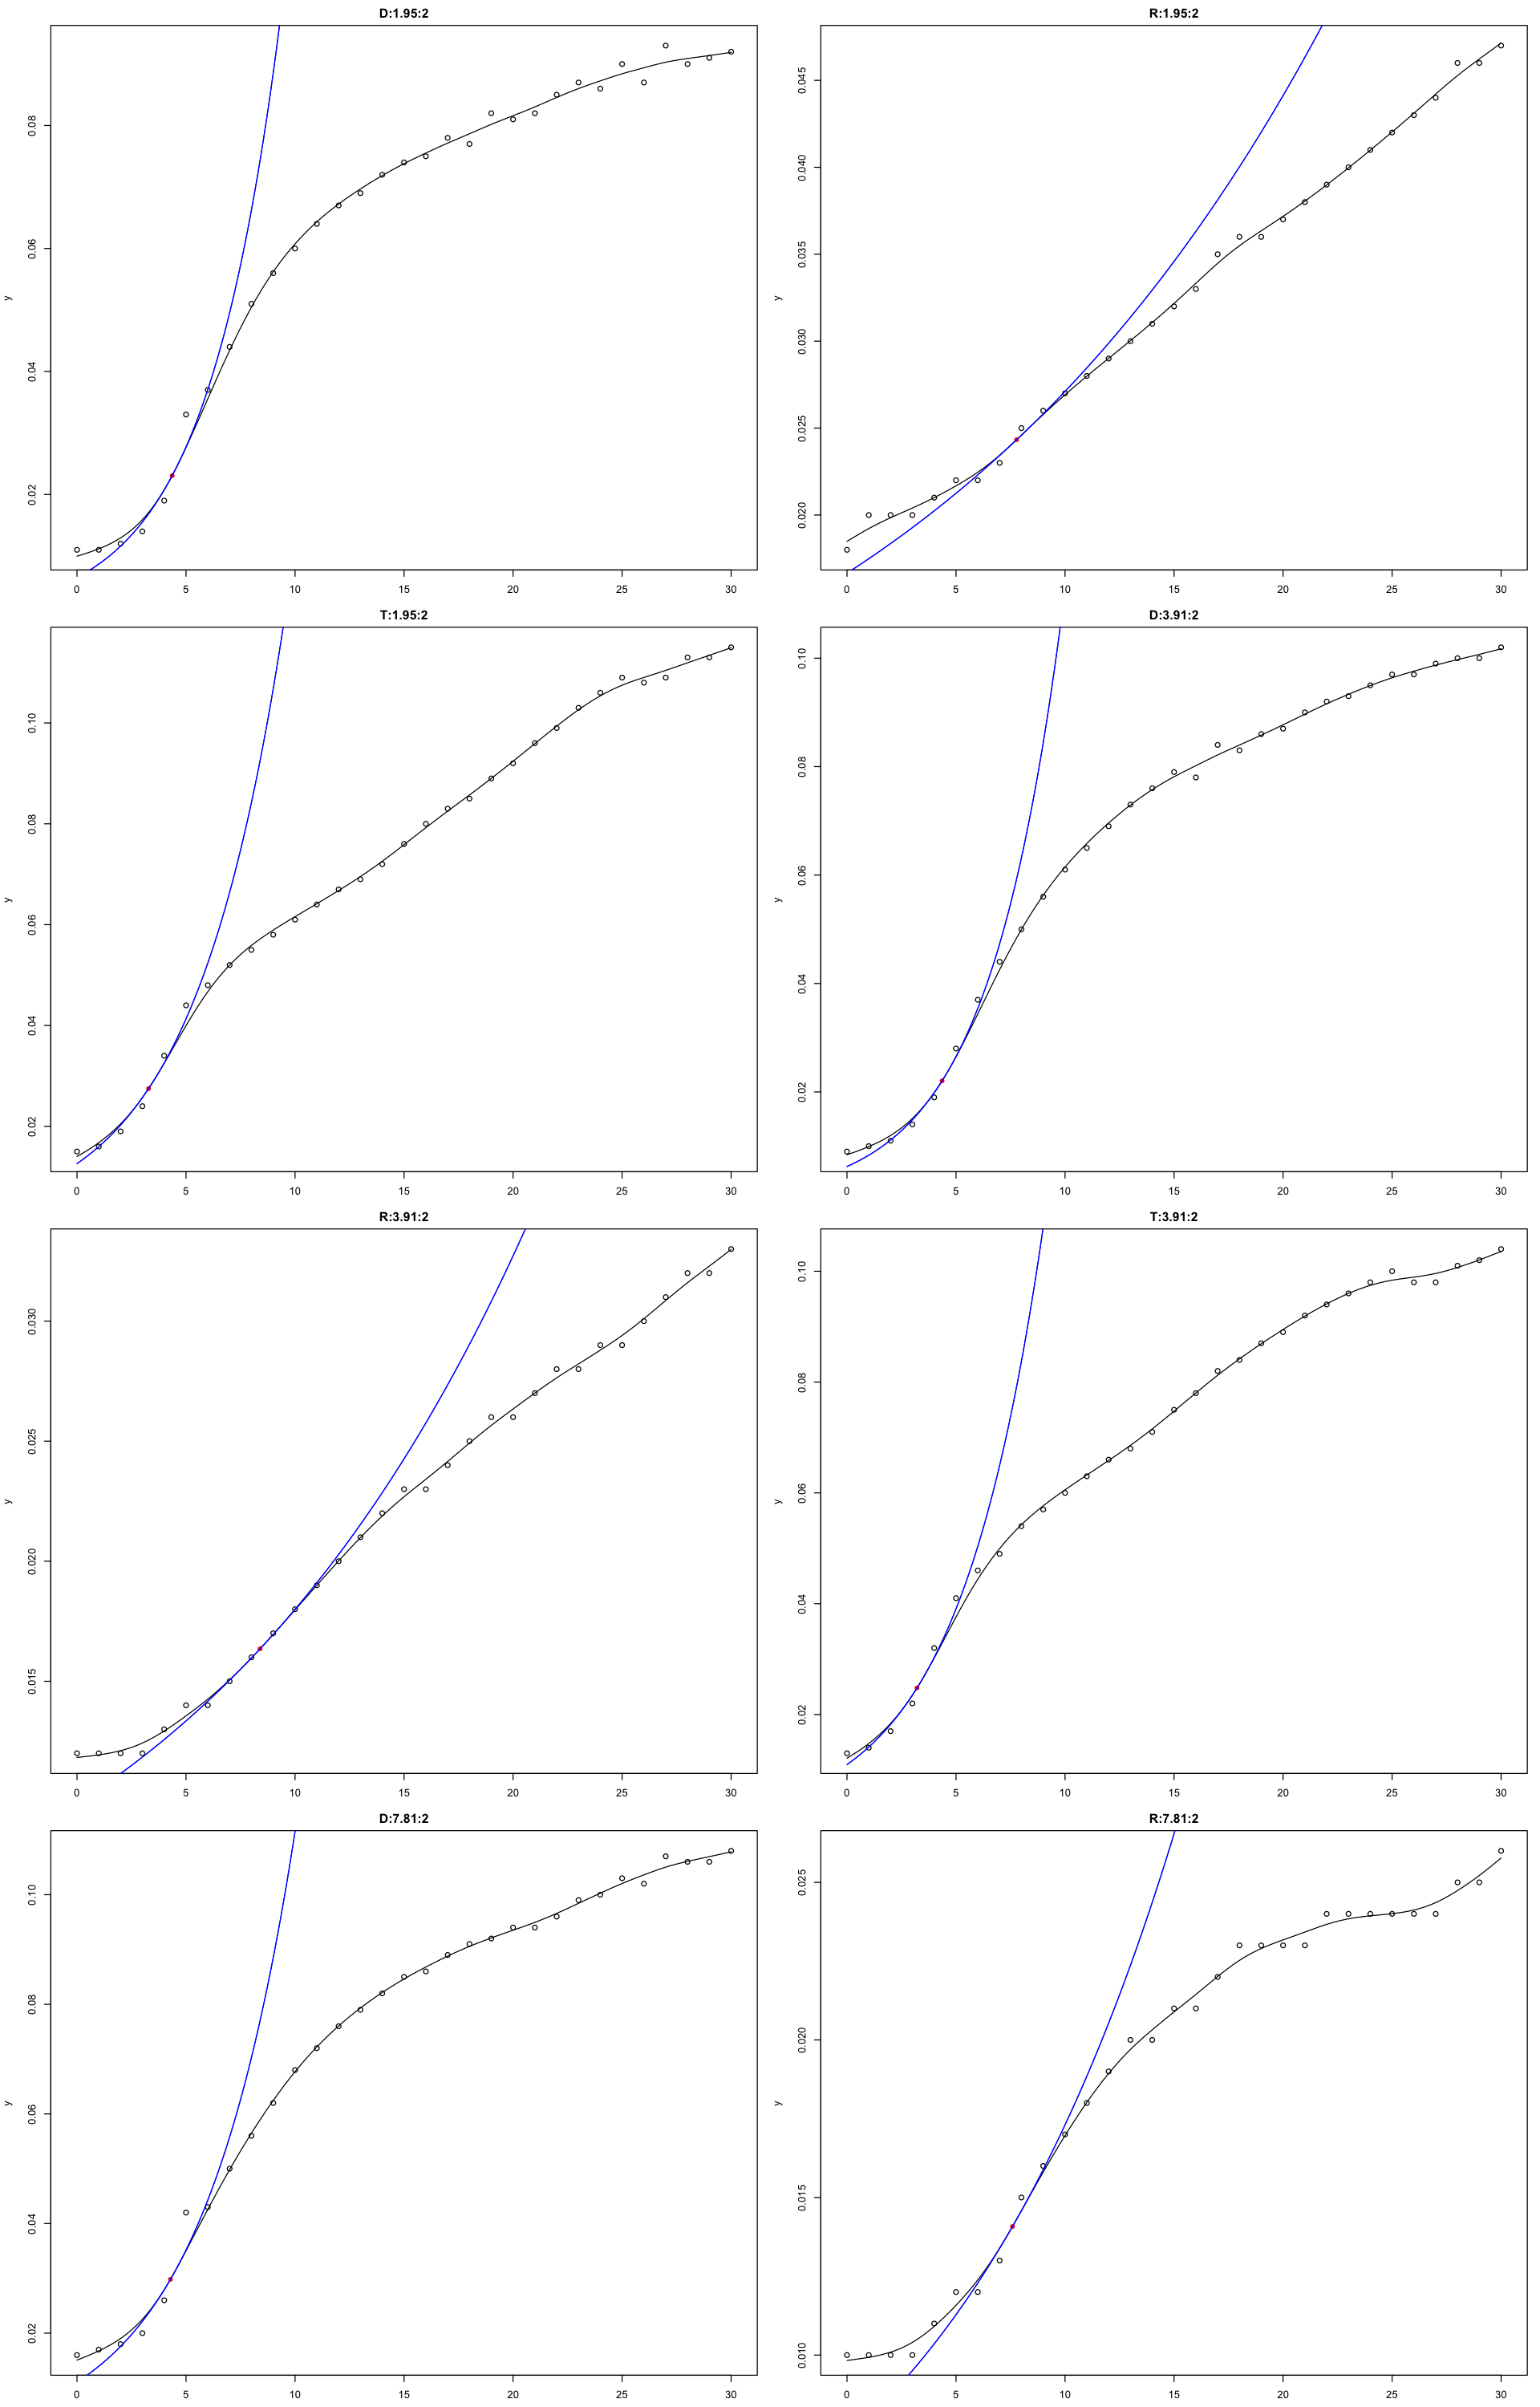

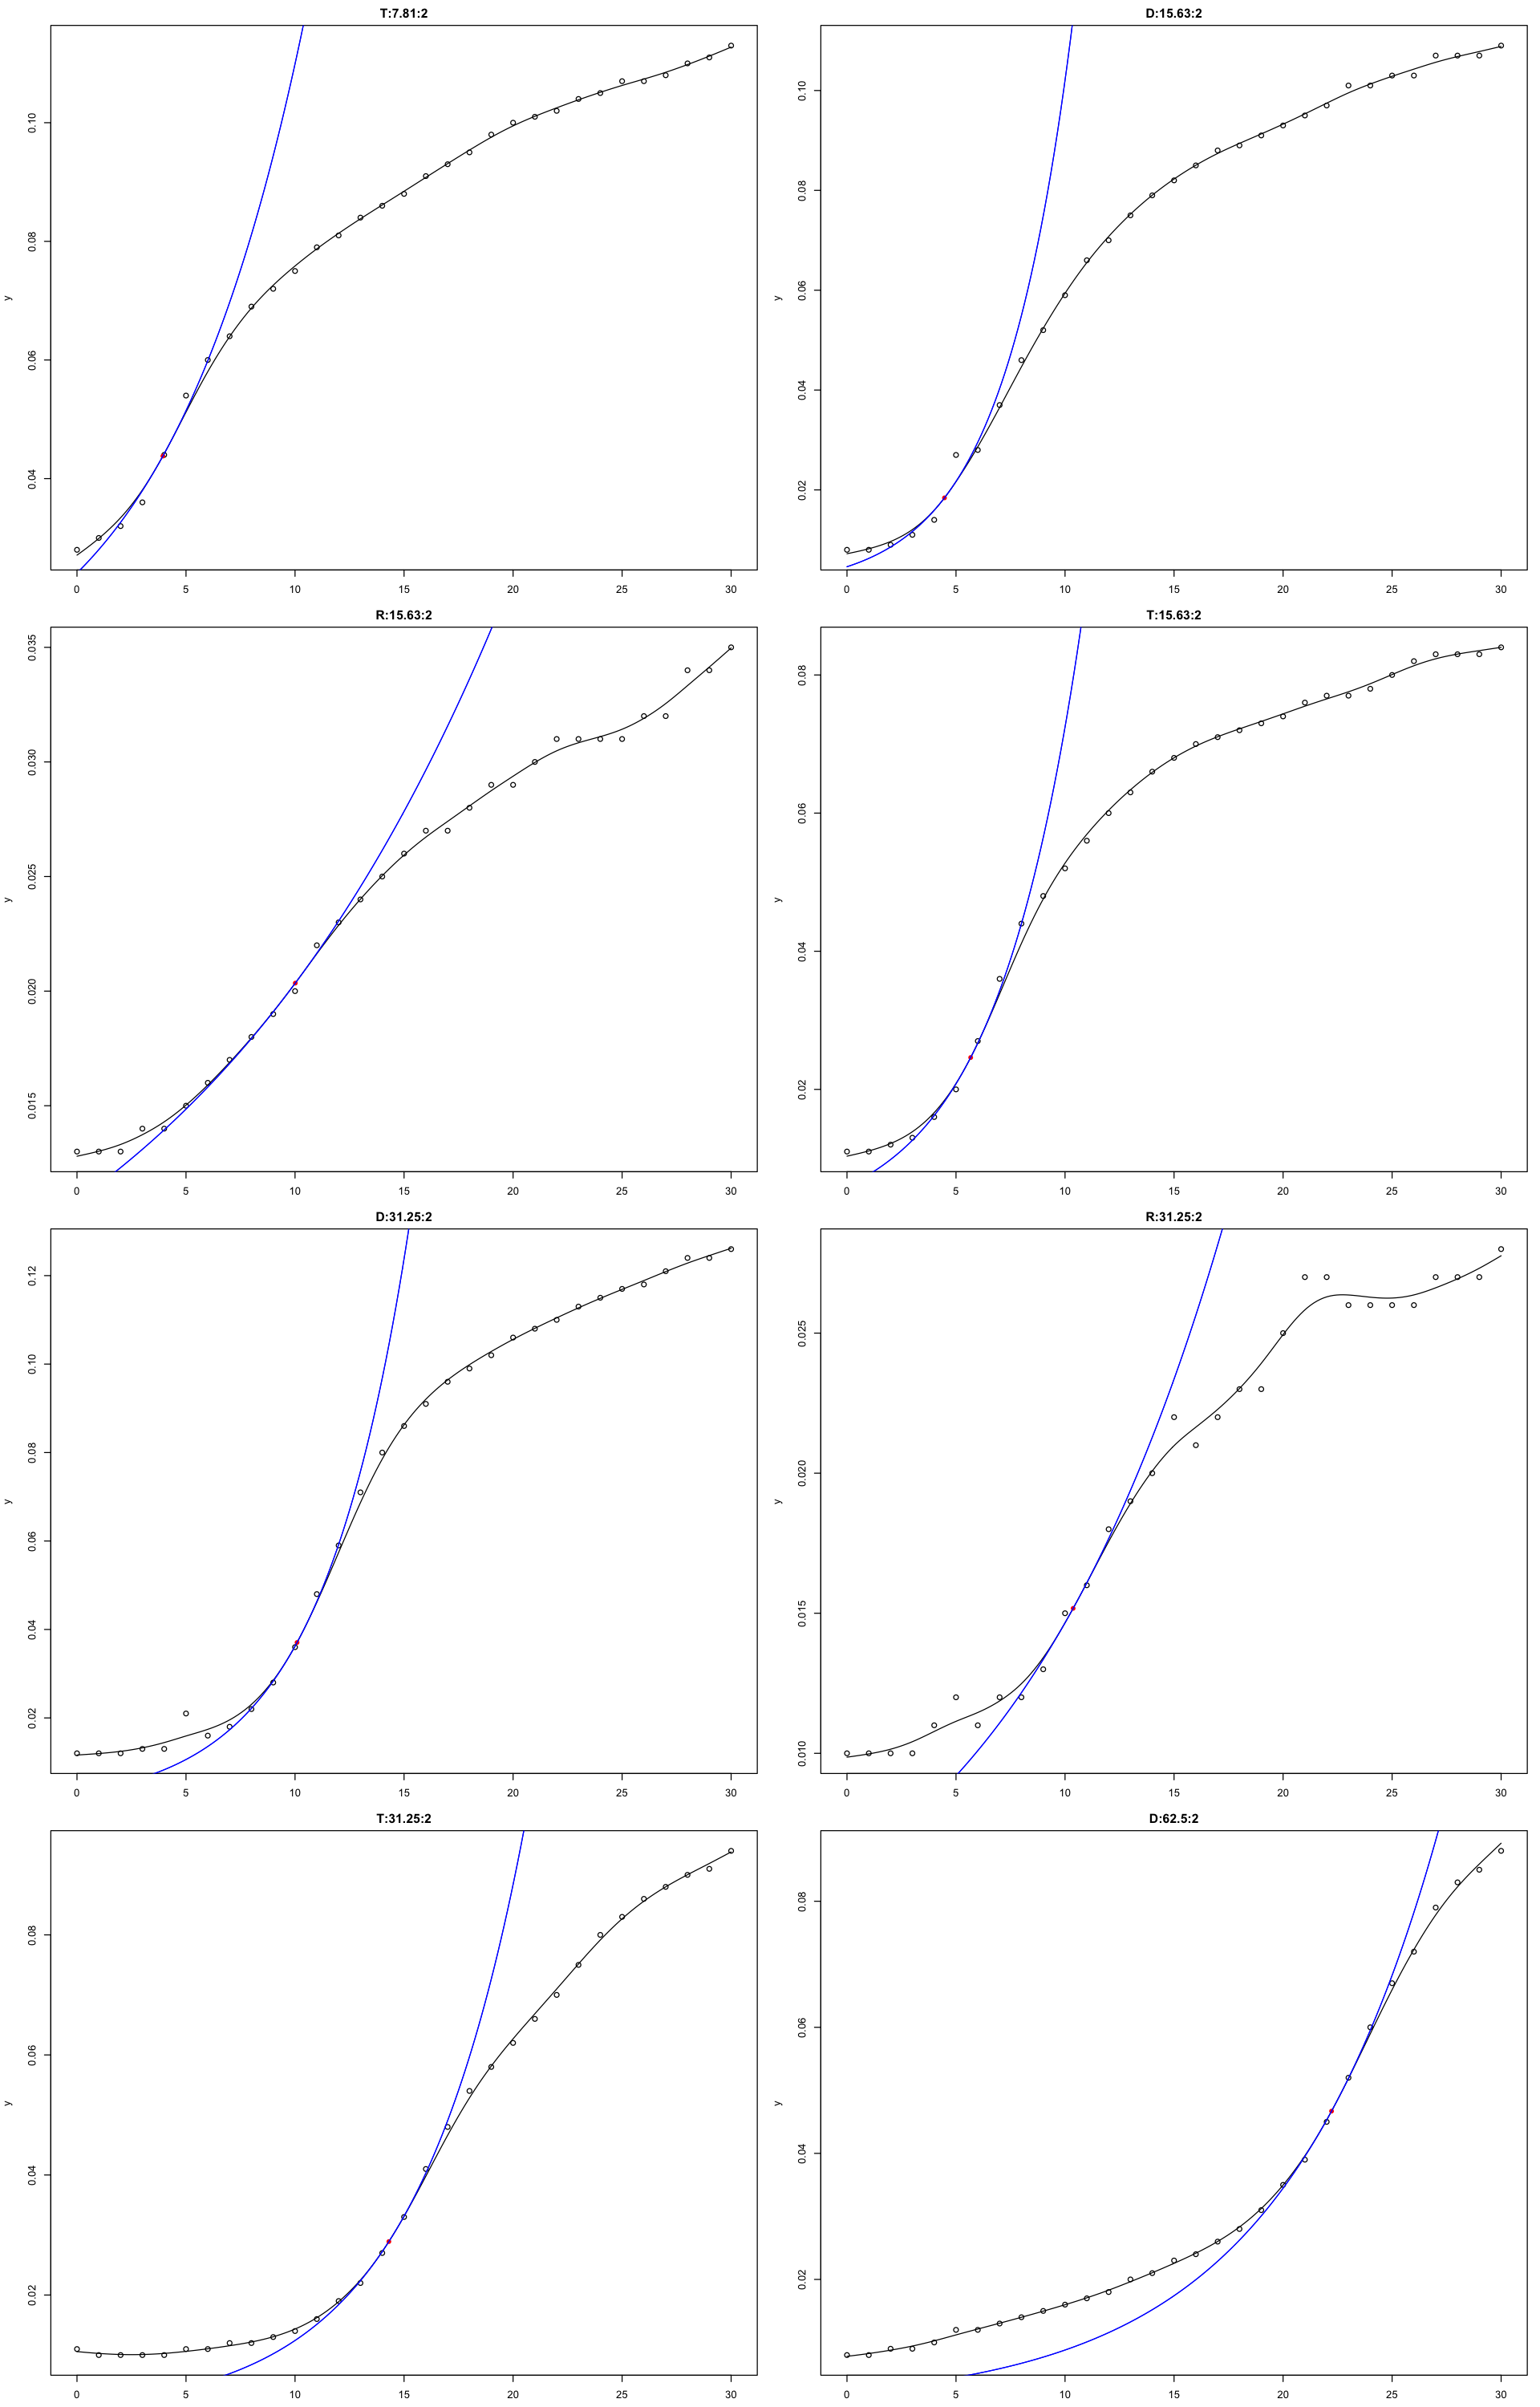

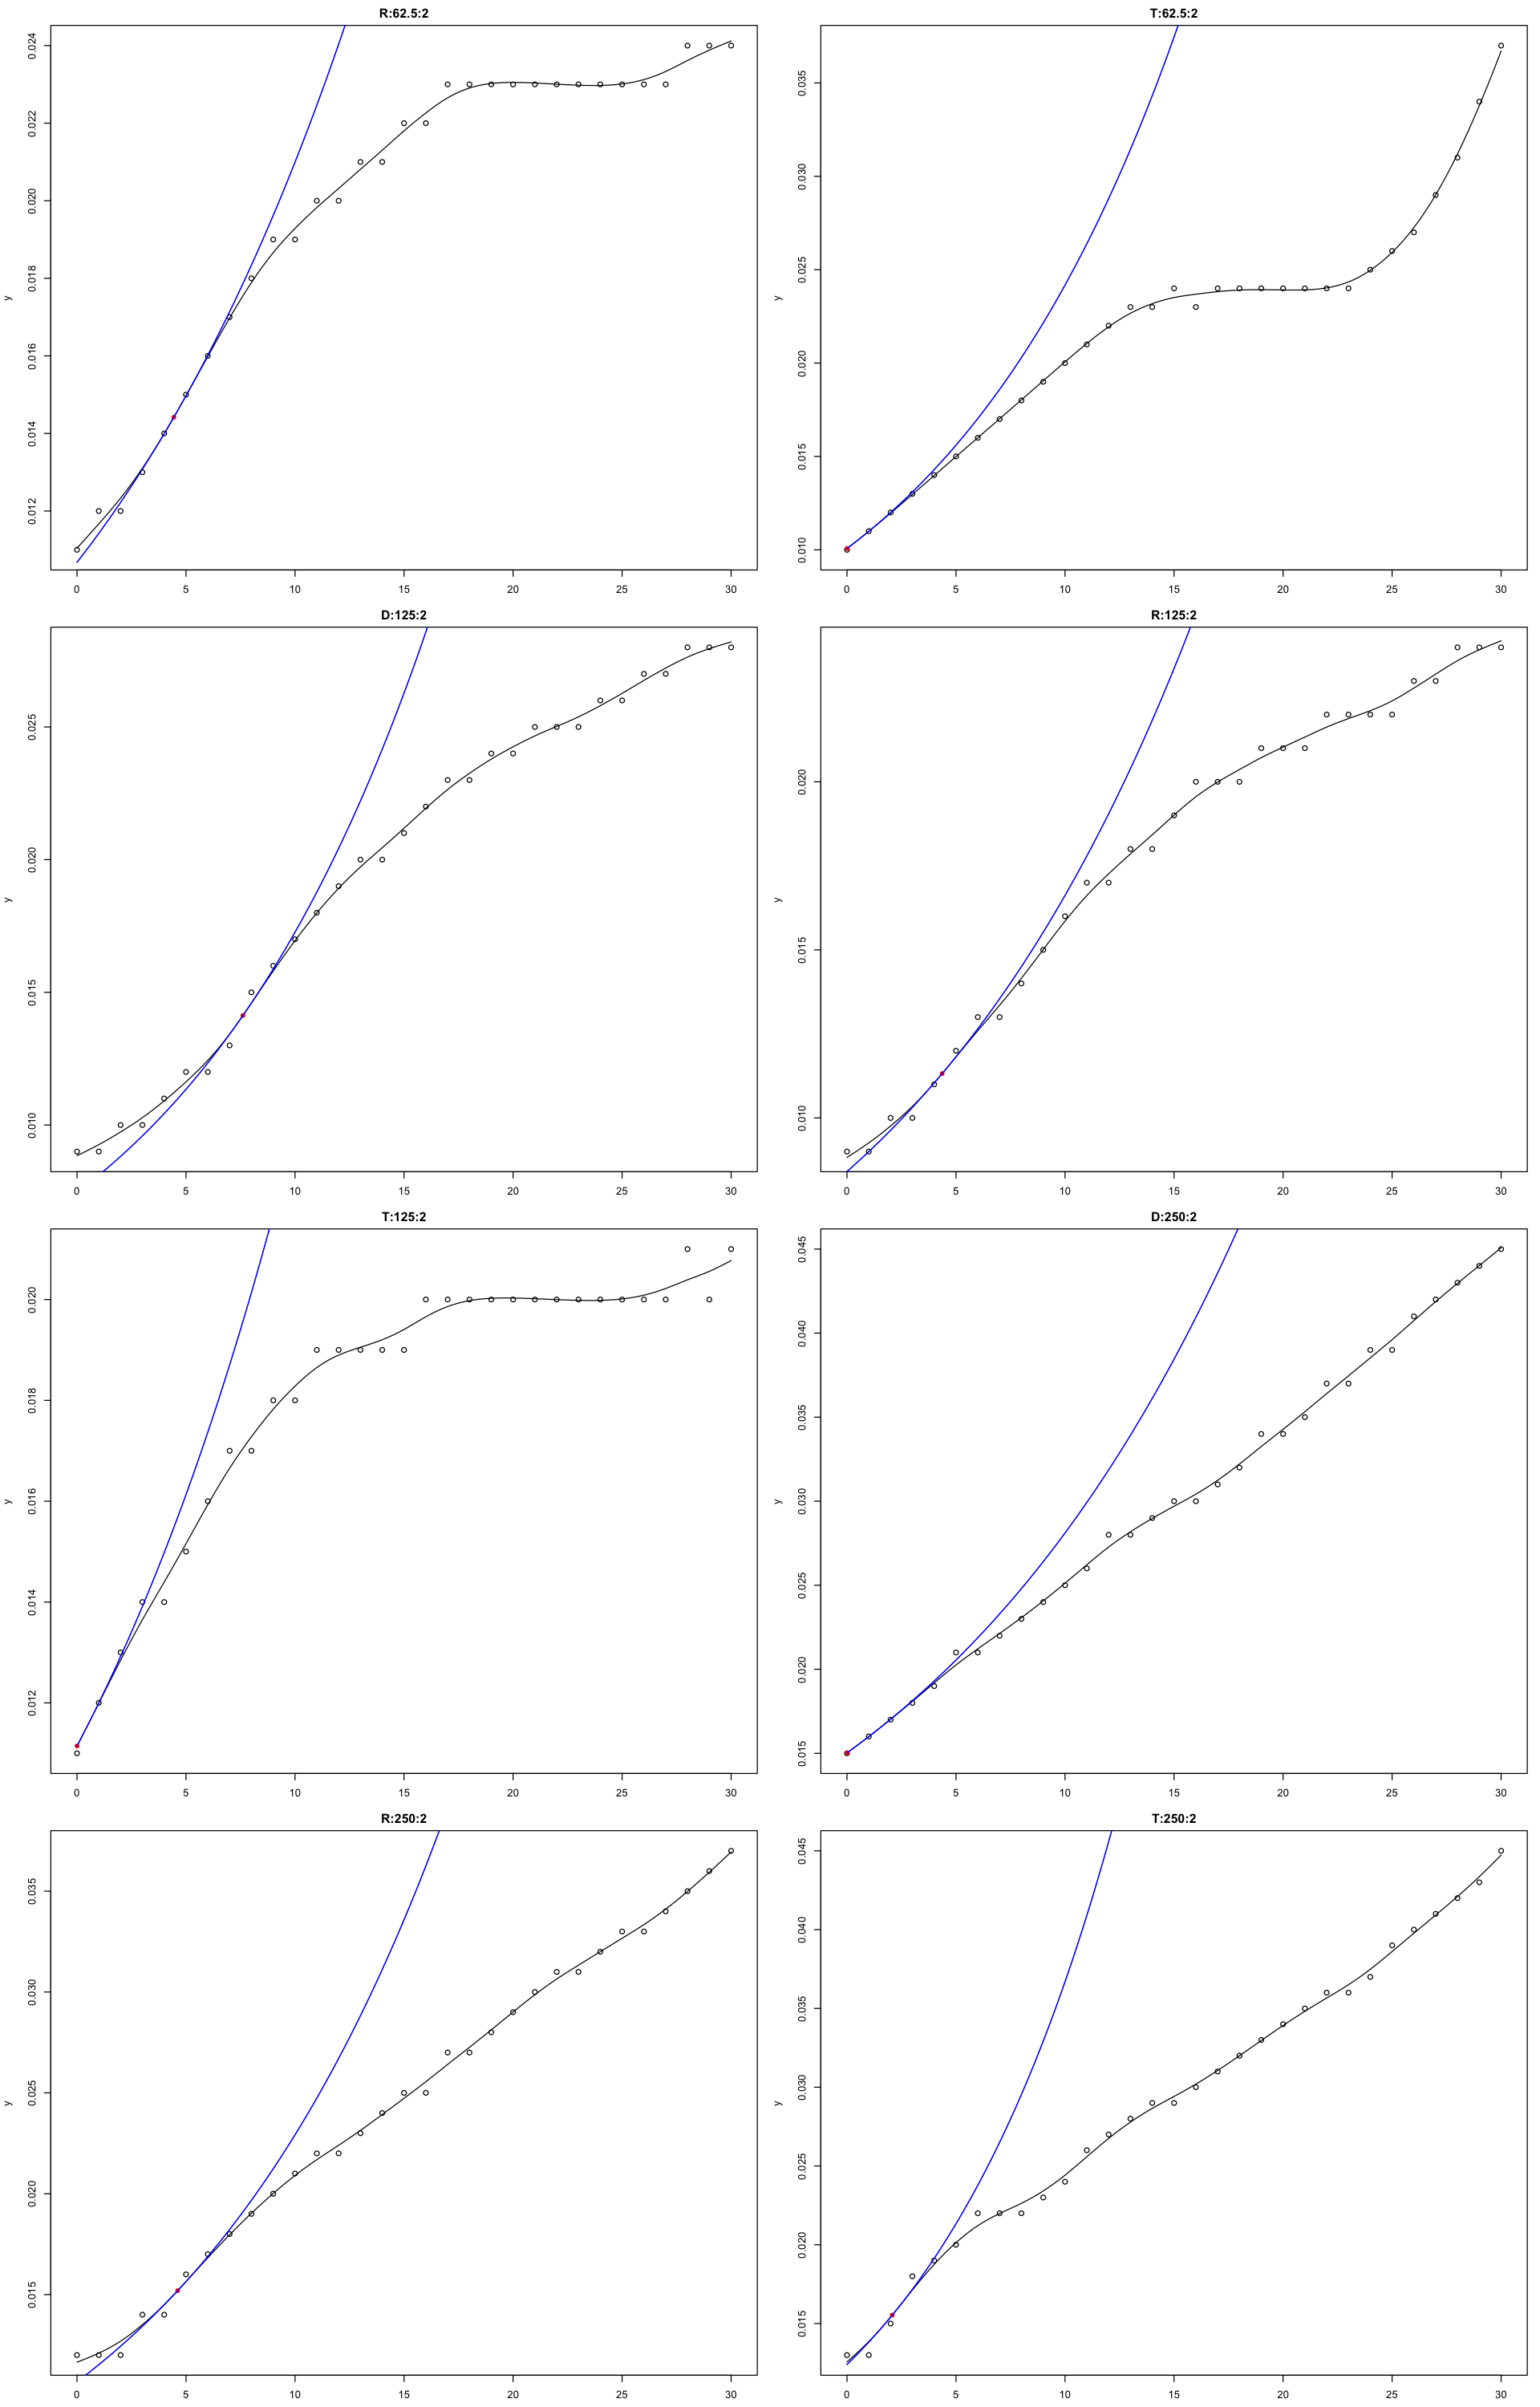

In [50]:
many_spline_fits <- all_splines(value ~ time | strain + conc + replicate, data = bactgrowth, spar = 0.5)
options(repr.plot.width=16, repr.plot.height=25)


par(mfrow = c(4, 2)) 
par(mar = c(2.5, 4, 2, 1)) 
plot(many_spline_fits)

In [54]:
## initial parameters and box constraints p
p<- c(y0 = 0.03, mumax = .1, K = 0.1, h0 = 1)
lower <- c(y0 = 0.001, mumax = 1e-2, K = 0.005, h0 = 0)
upper <- c(y0 = 0.1,mumax = 1, K = 0.5, h0 = 10)
##

In [56]:
## fit growth models to all data using log transformed residuals 
many_baranyi1 <- all_growthmodels( value ~ grow_baranyi(time, parms) | strain + conc + replicate, data = bactgrowth, p = p, lower = lower, upper = upper, log = "y", ncores = 2)

In [57]:
## use coefficients of first fit as new initial parameters 
pp<- coef(many_baranyi1)
## but set h0 to a fixed value pp[, "h0"] <- 0.65 ## re-fit models many_baranyi2

In [58]:
many_baranyi2 <- all_growthmodels( value ~ grow_baranyi(time, parms) | strain + conc + replicate, data = bactgrowth, p = pp, lower = lower, upper = upper, which = c("y0", "mumax", "K"), log = "y", ncores = 2)


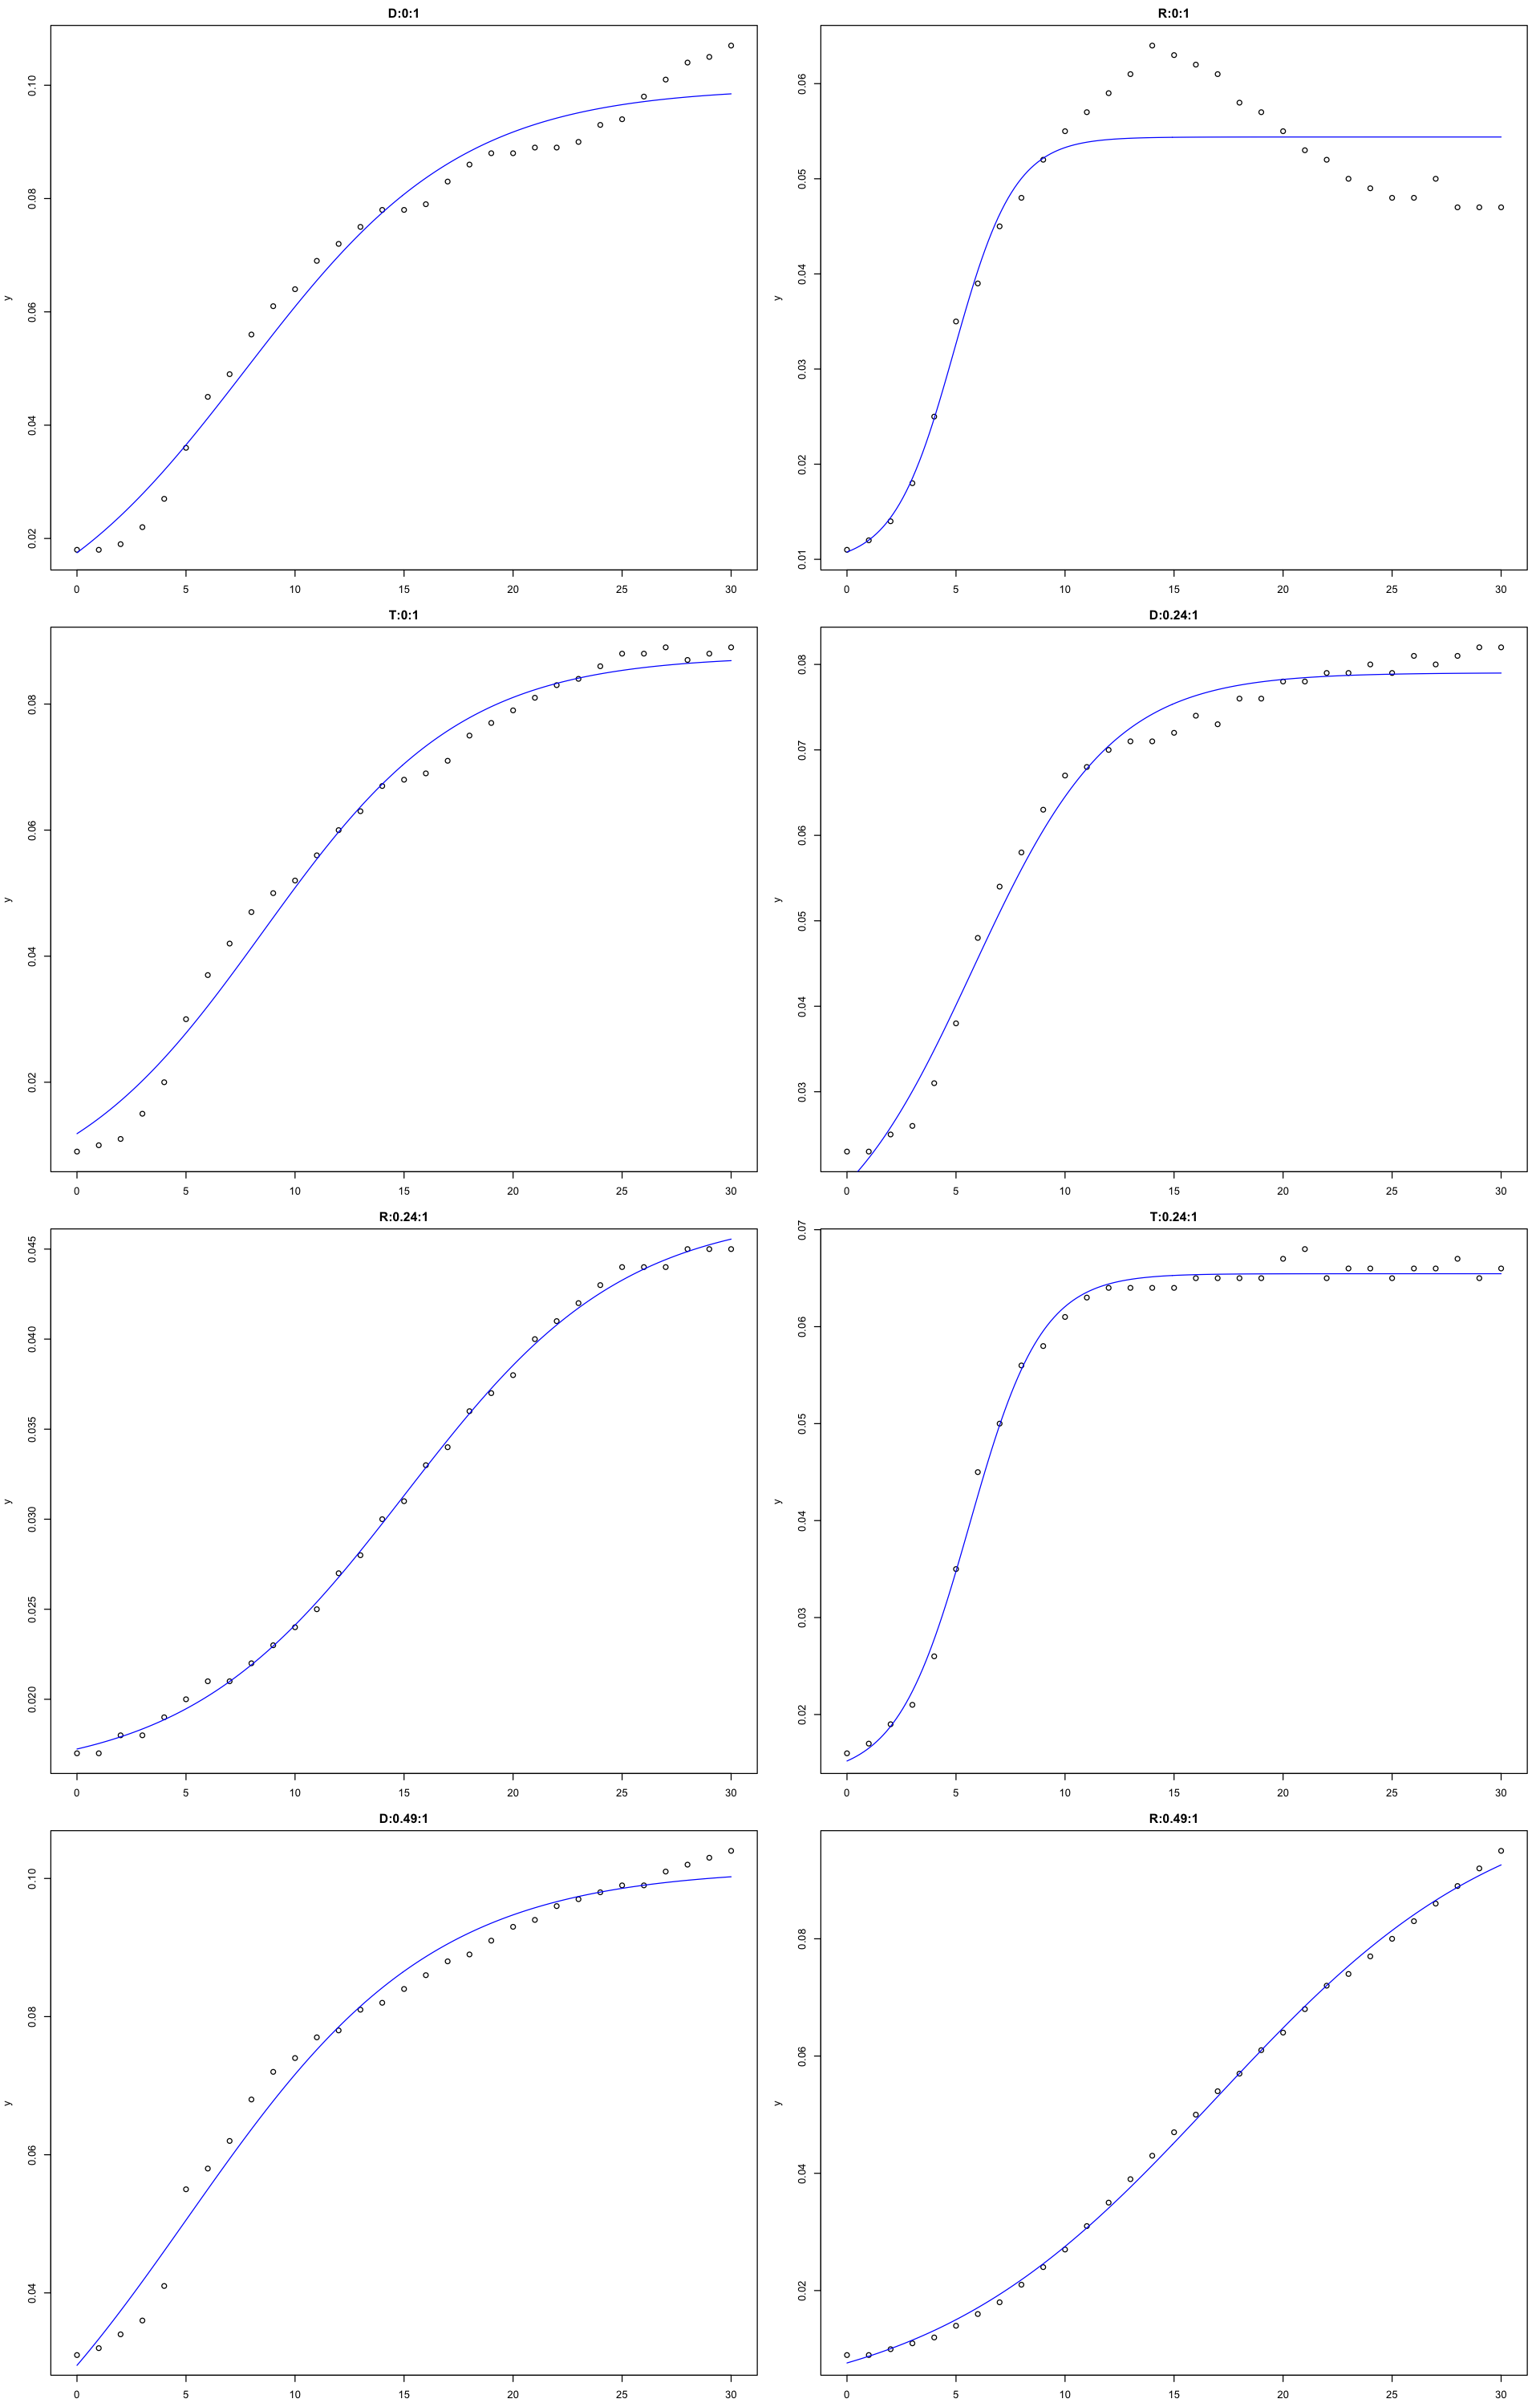

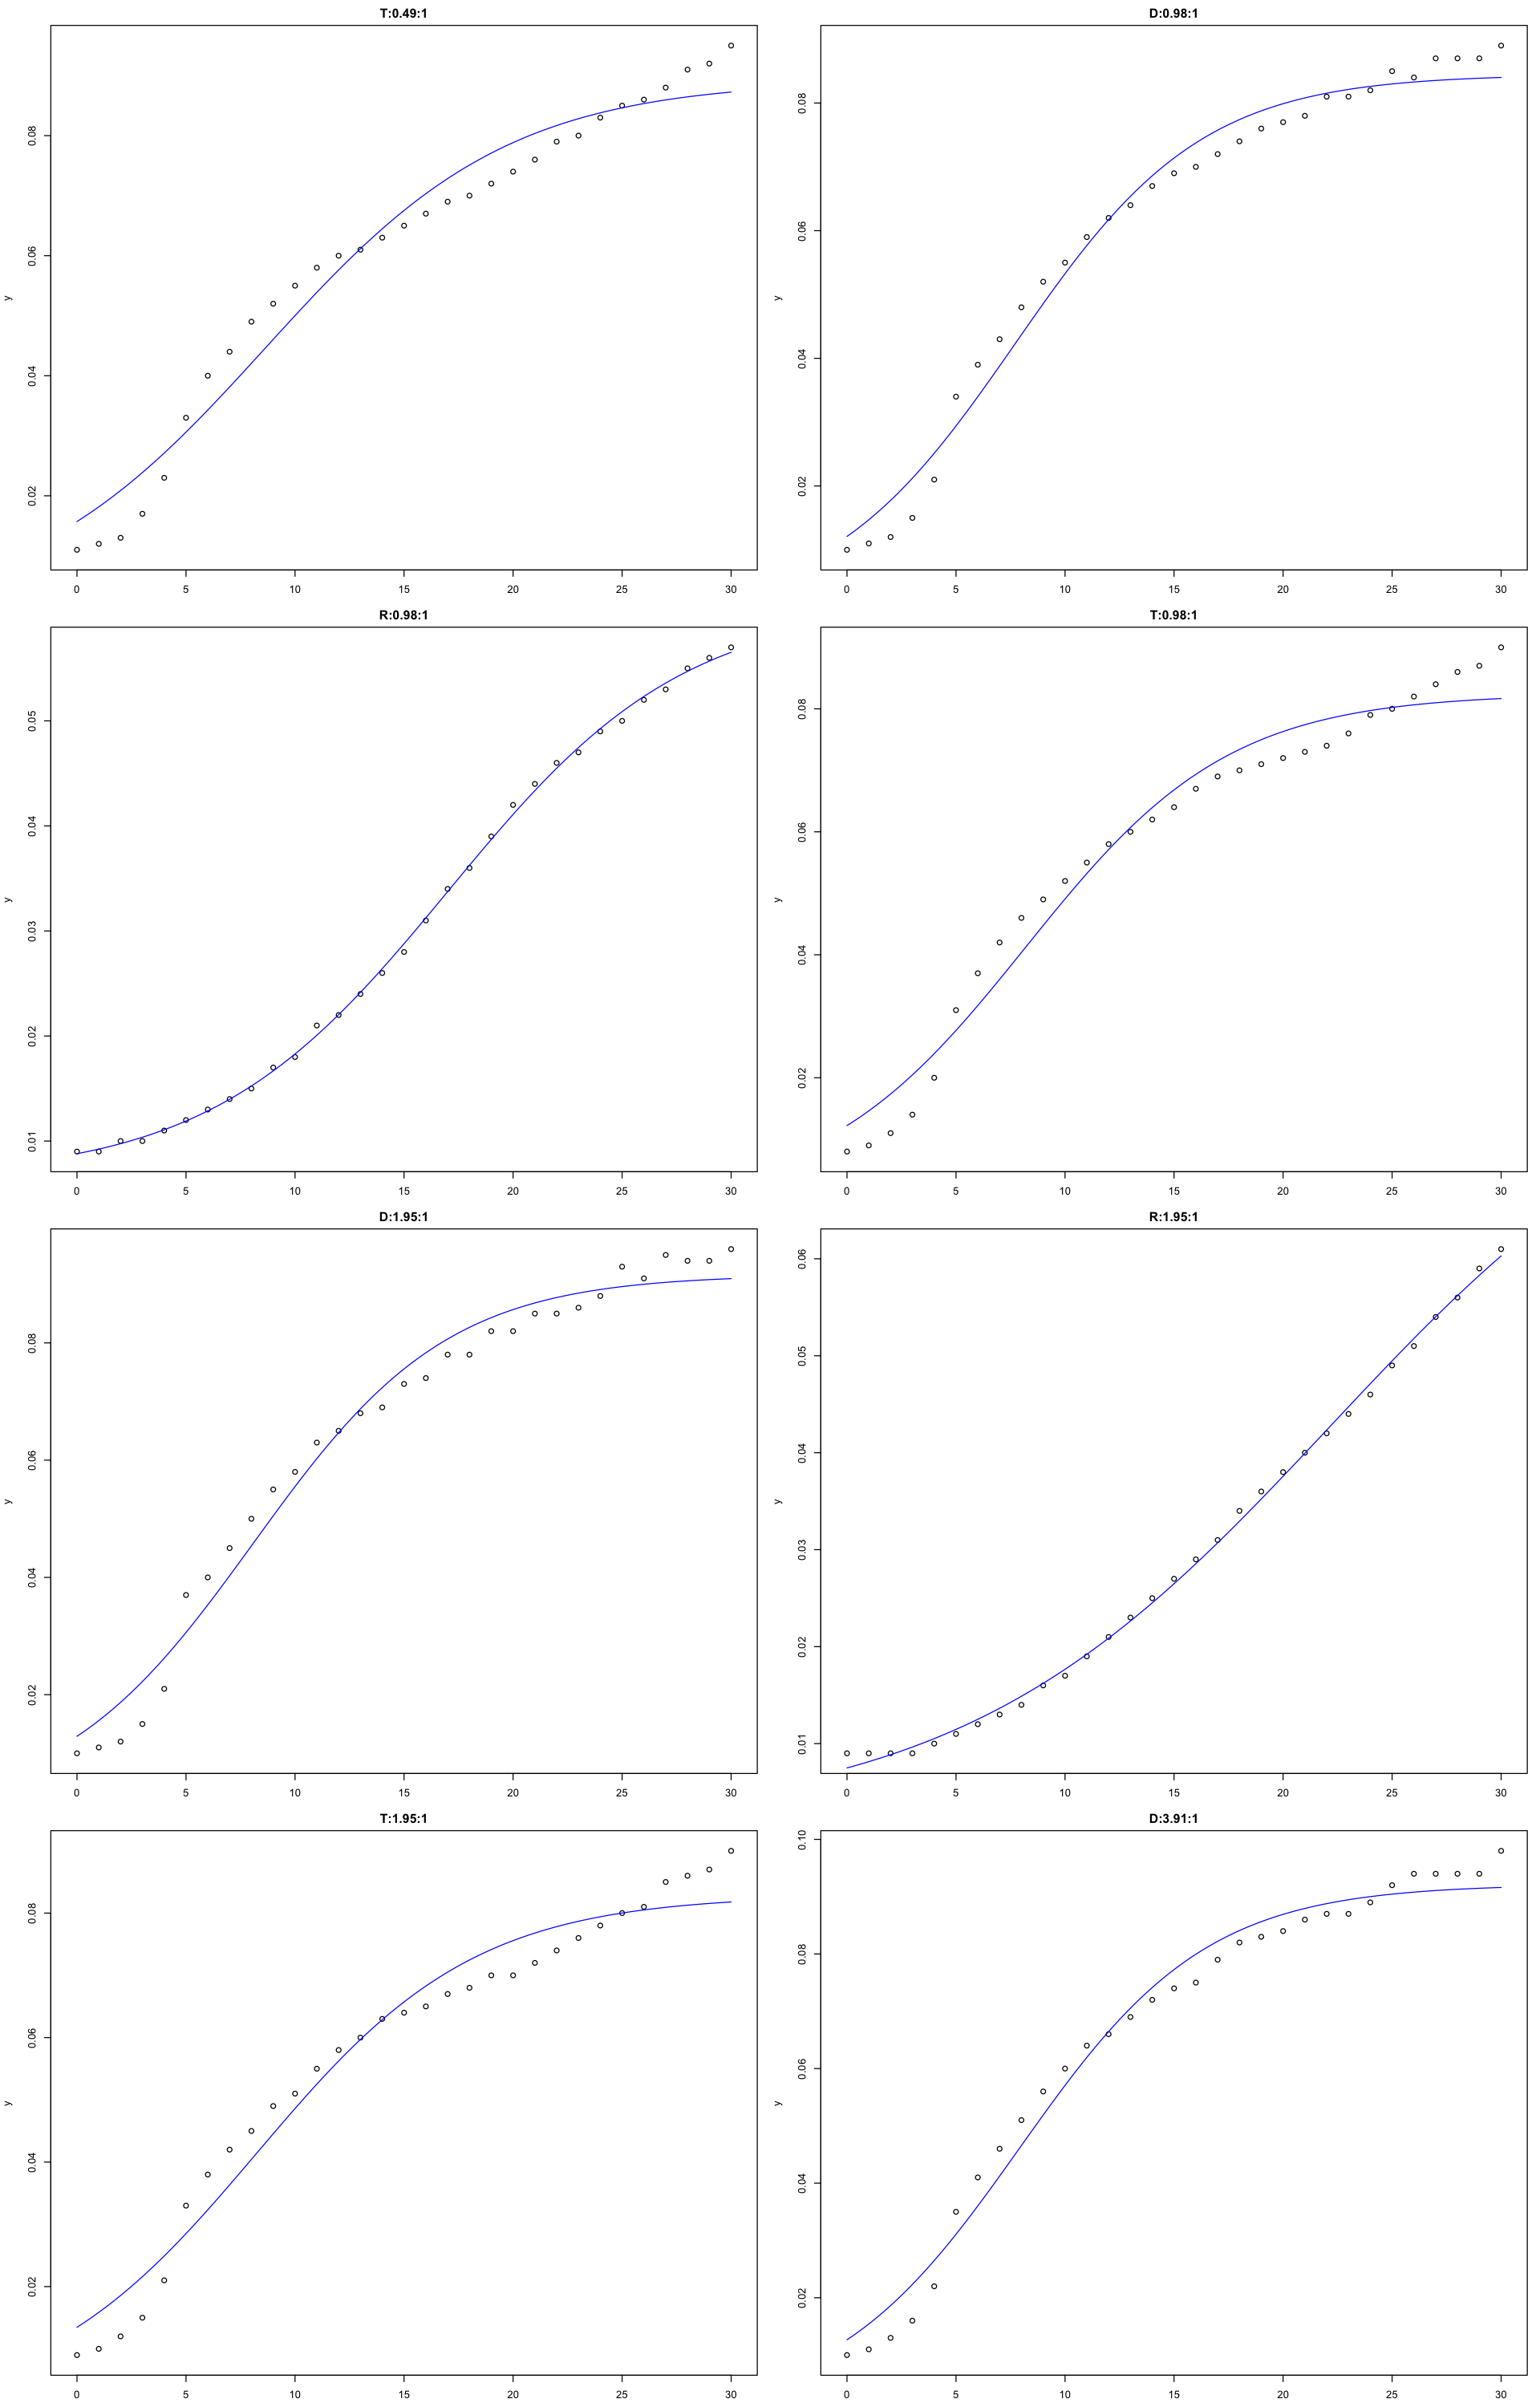

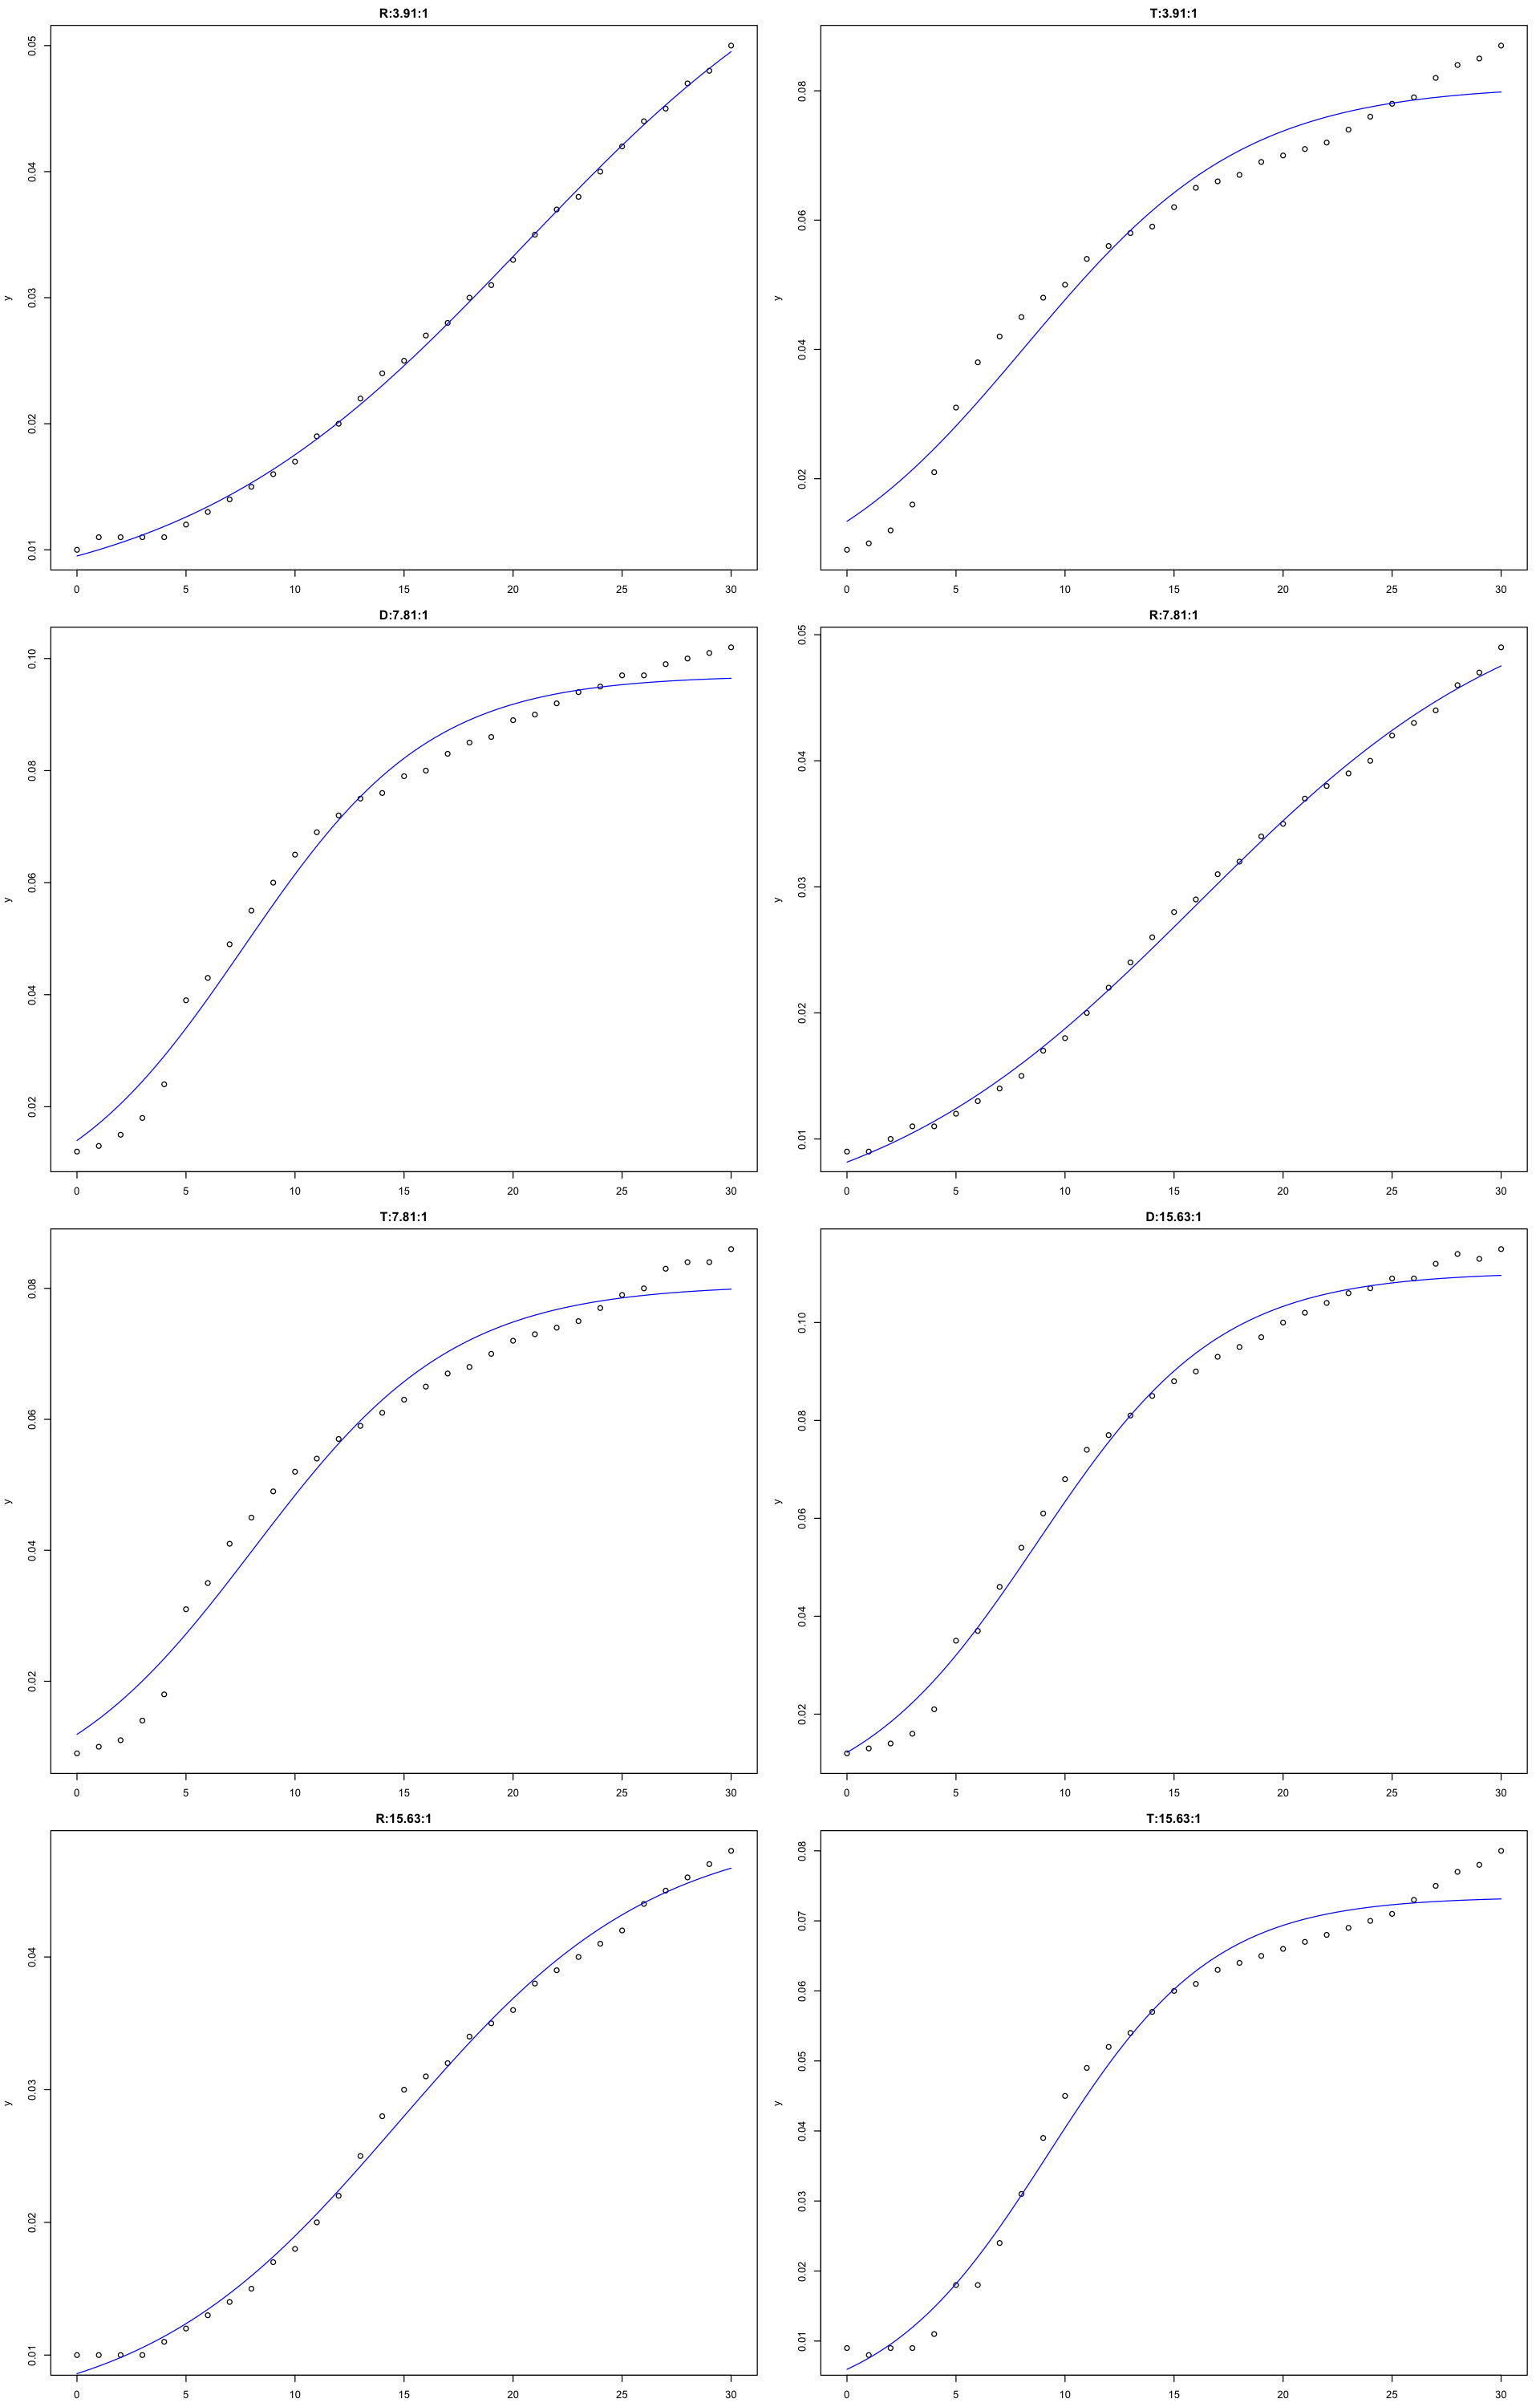

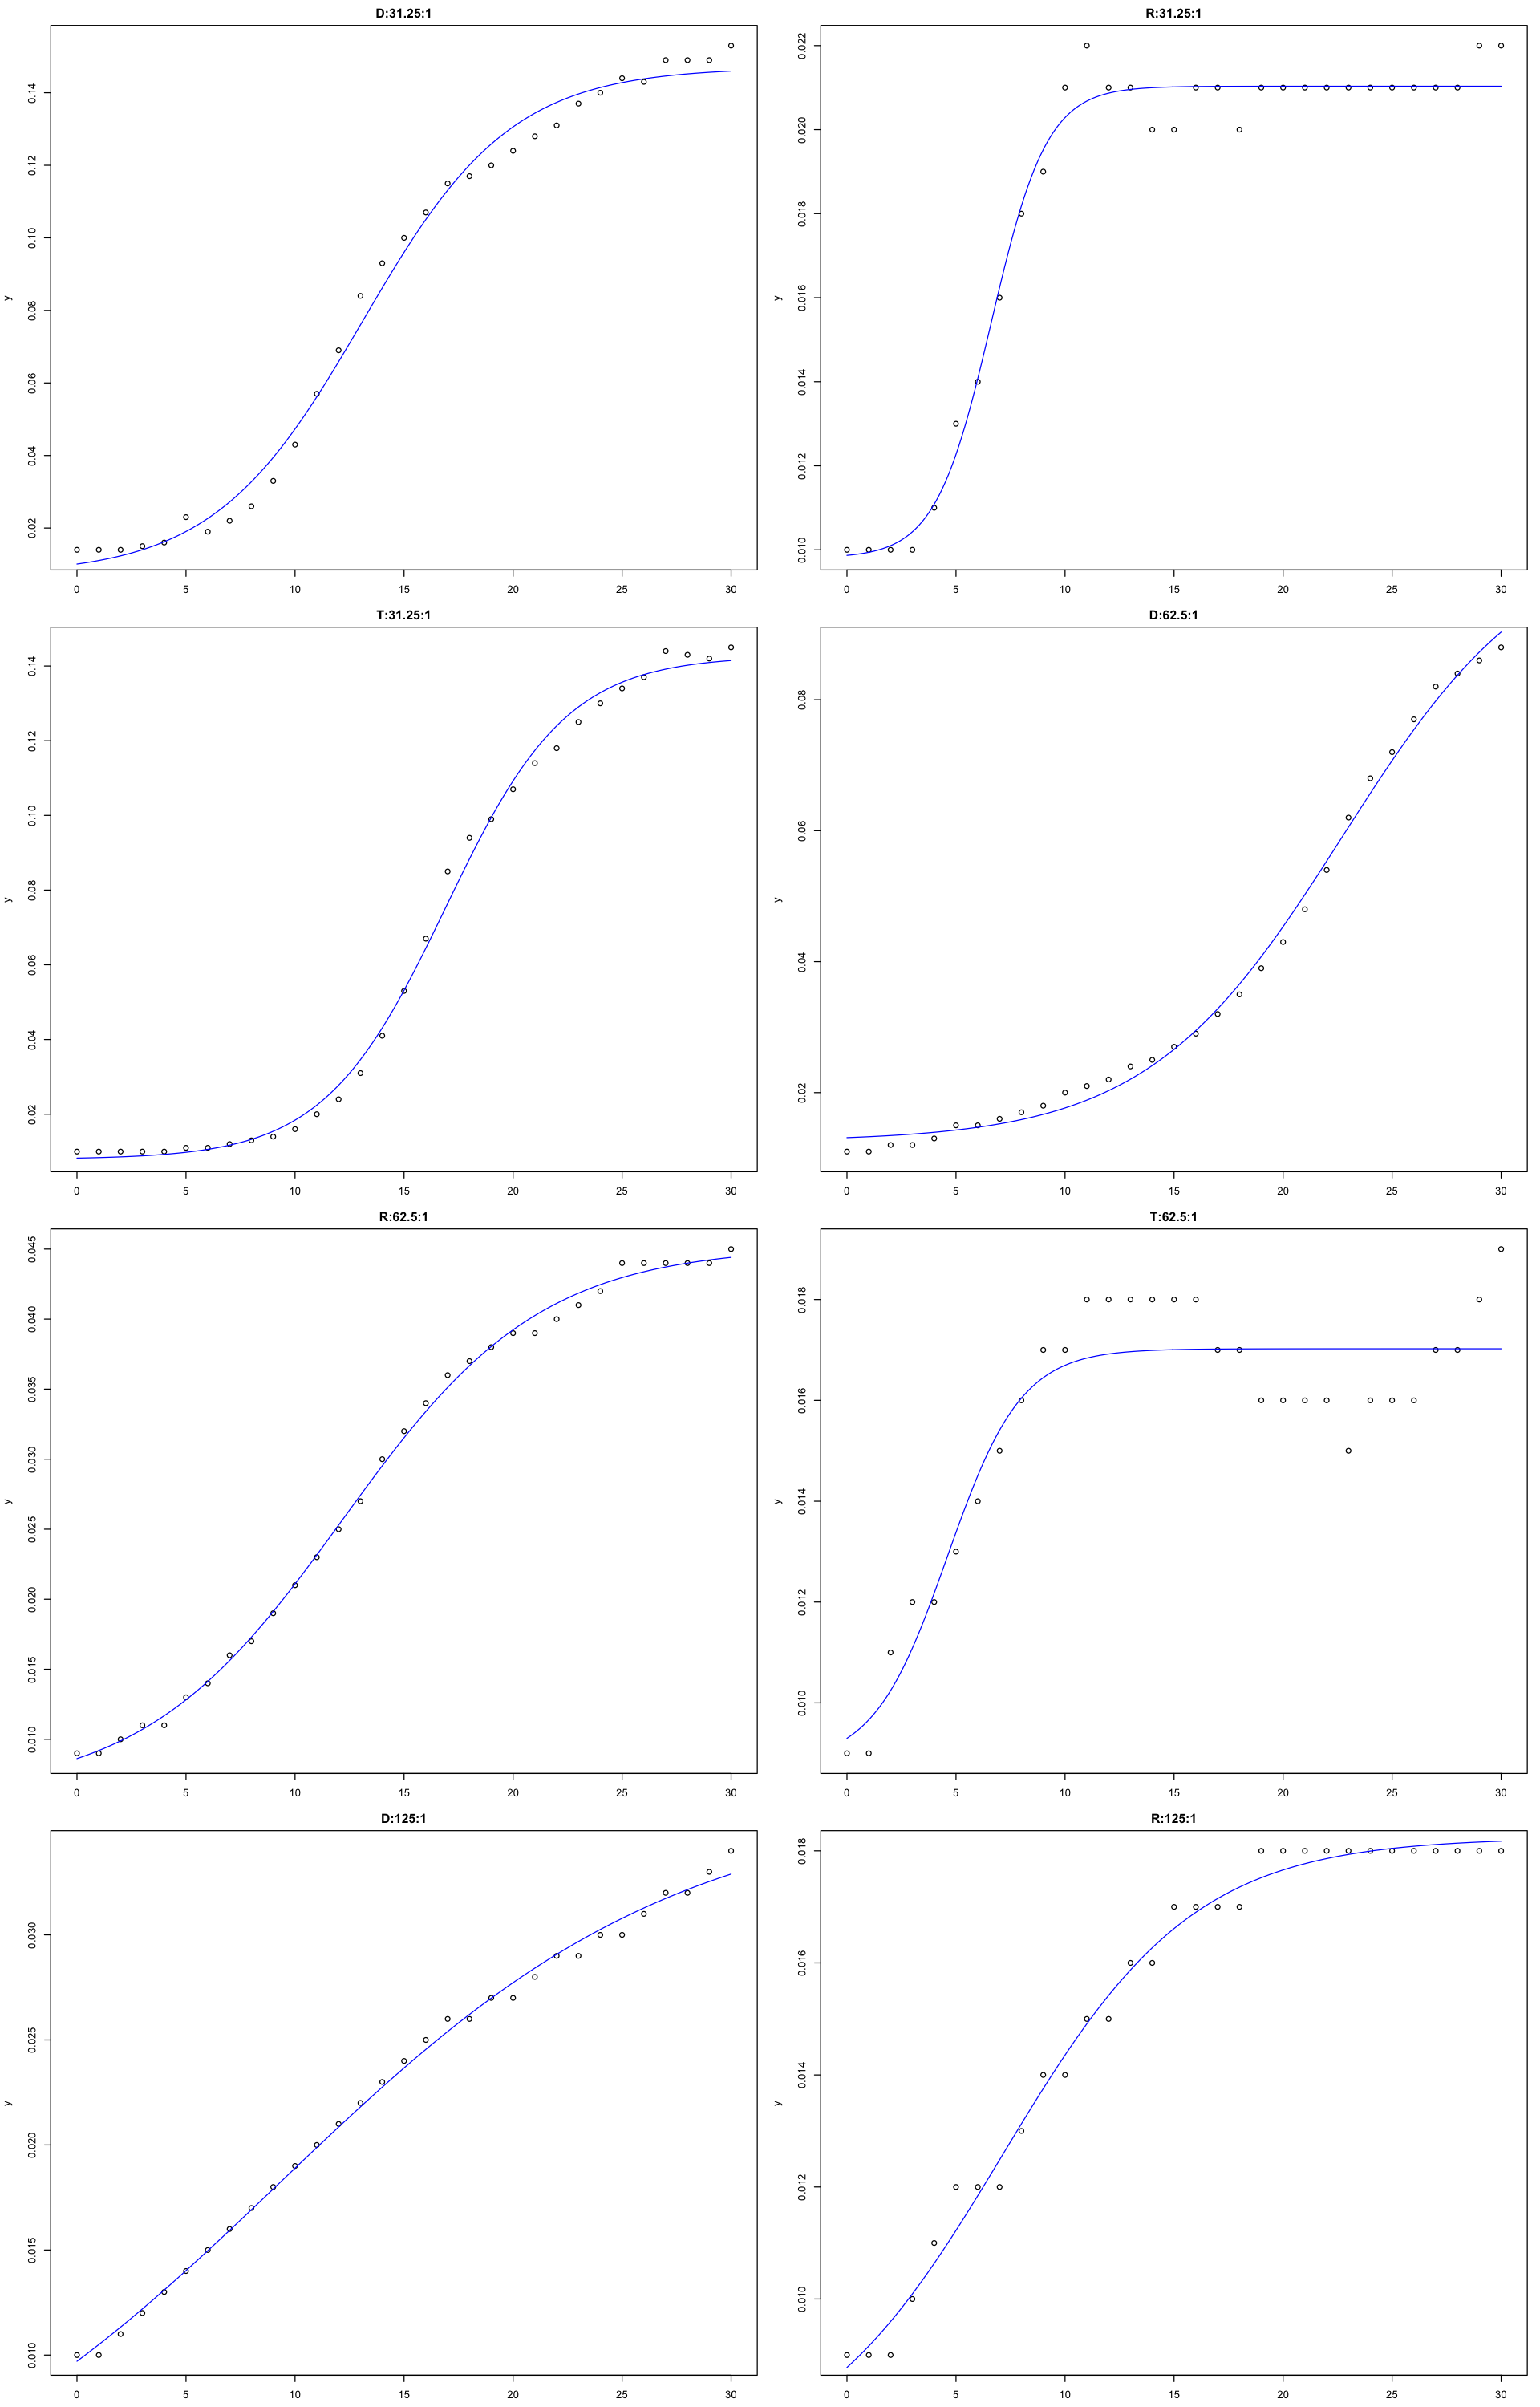

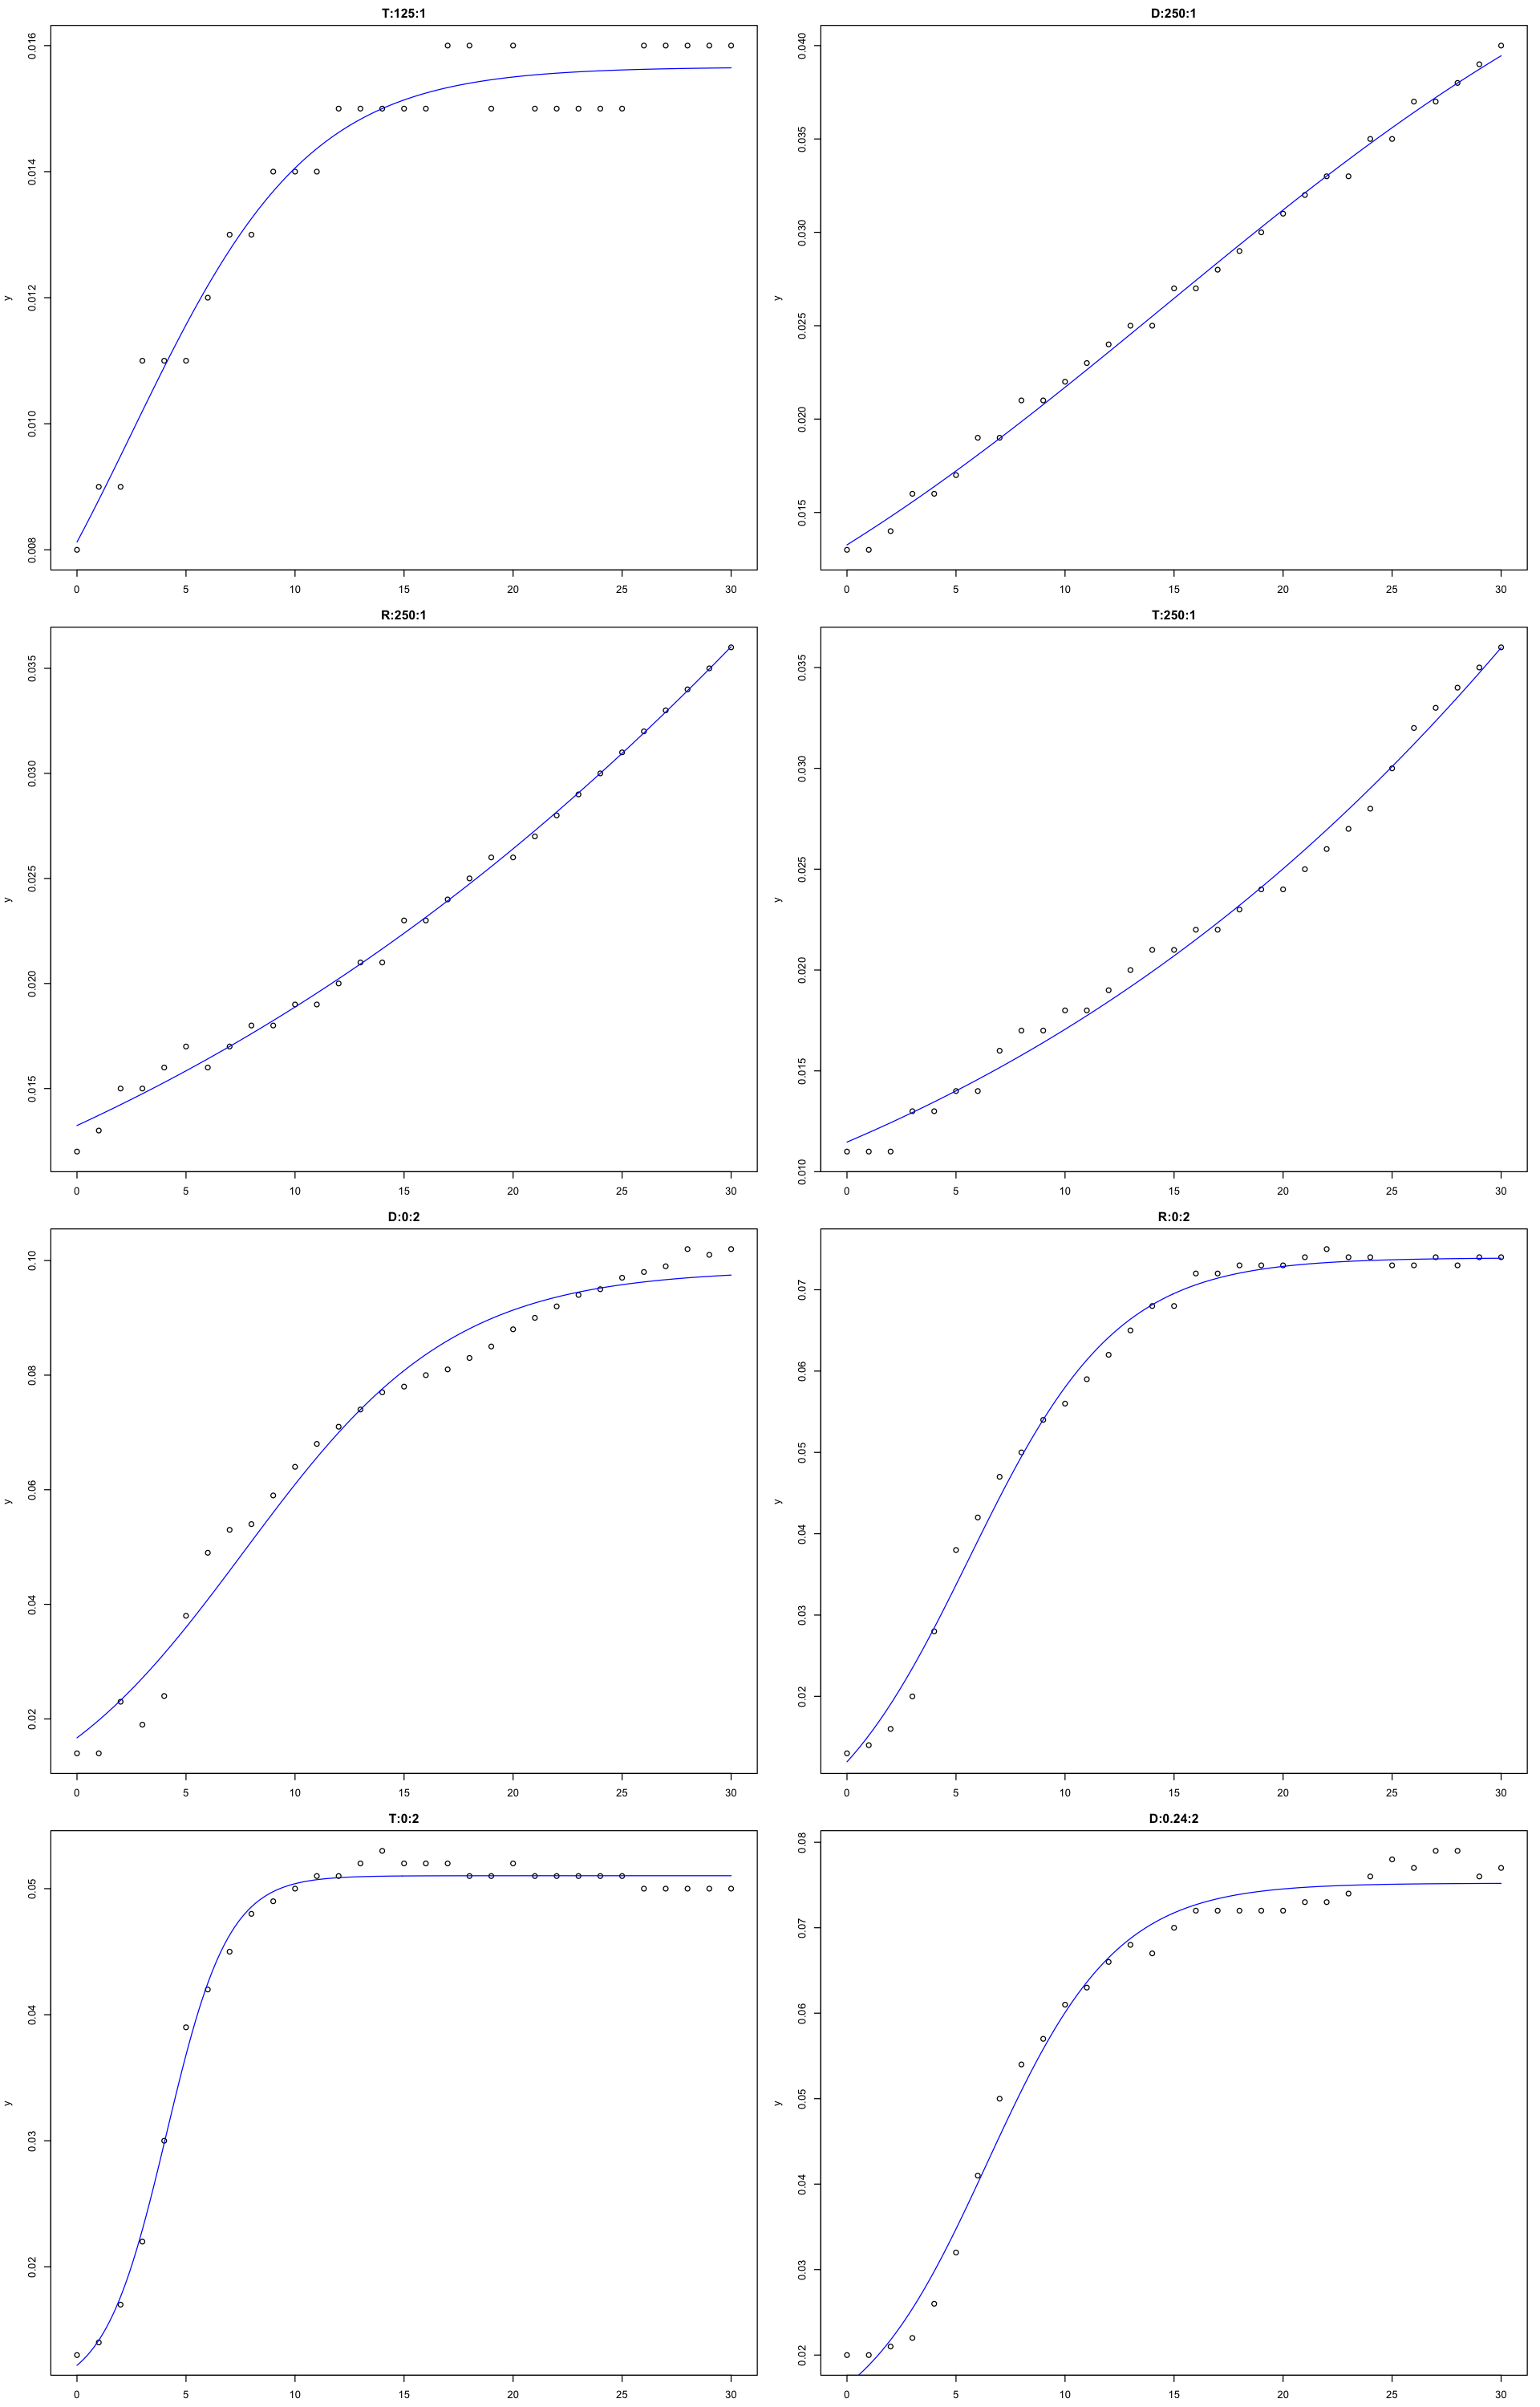

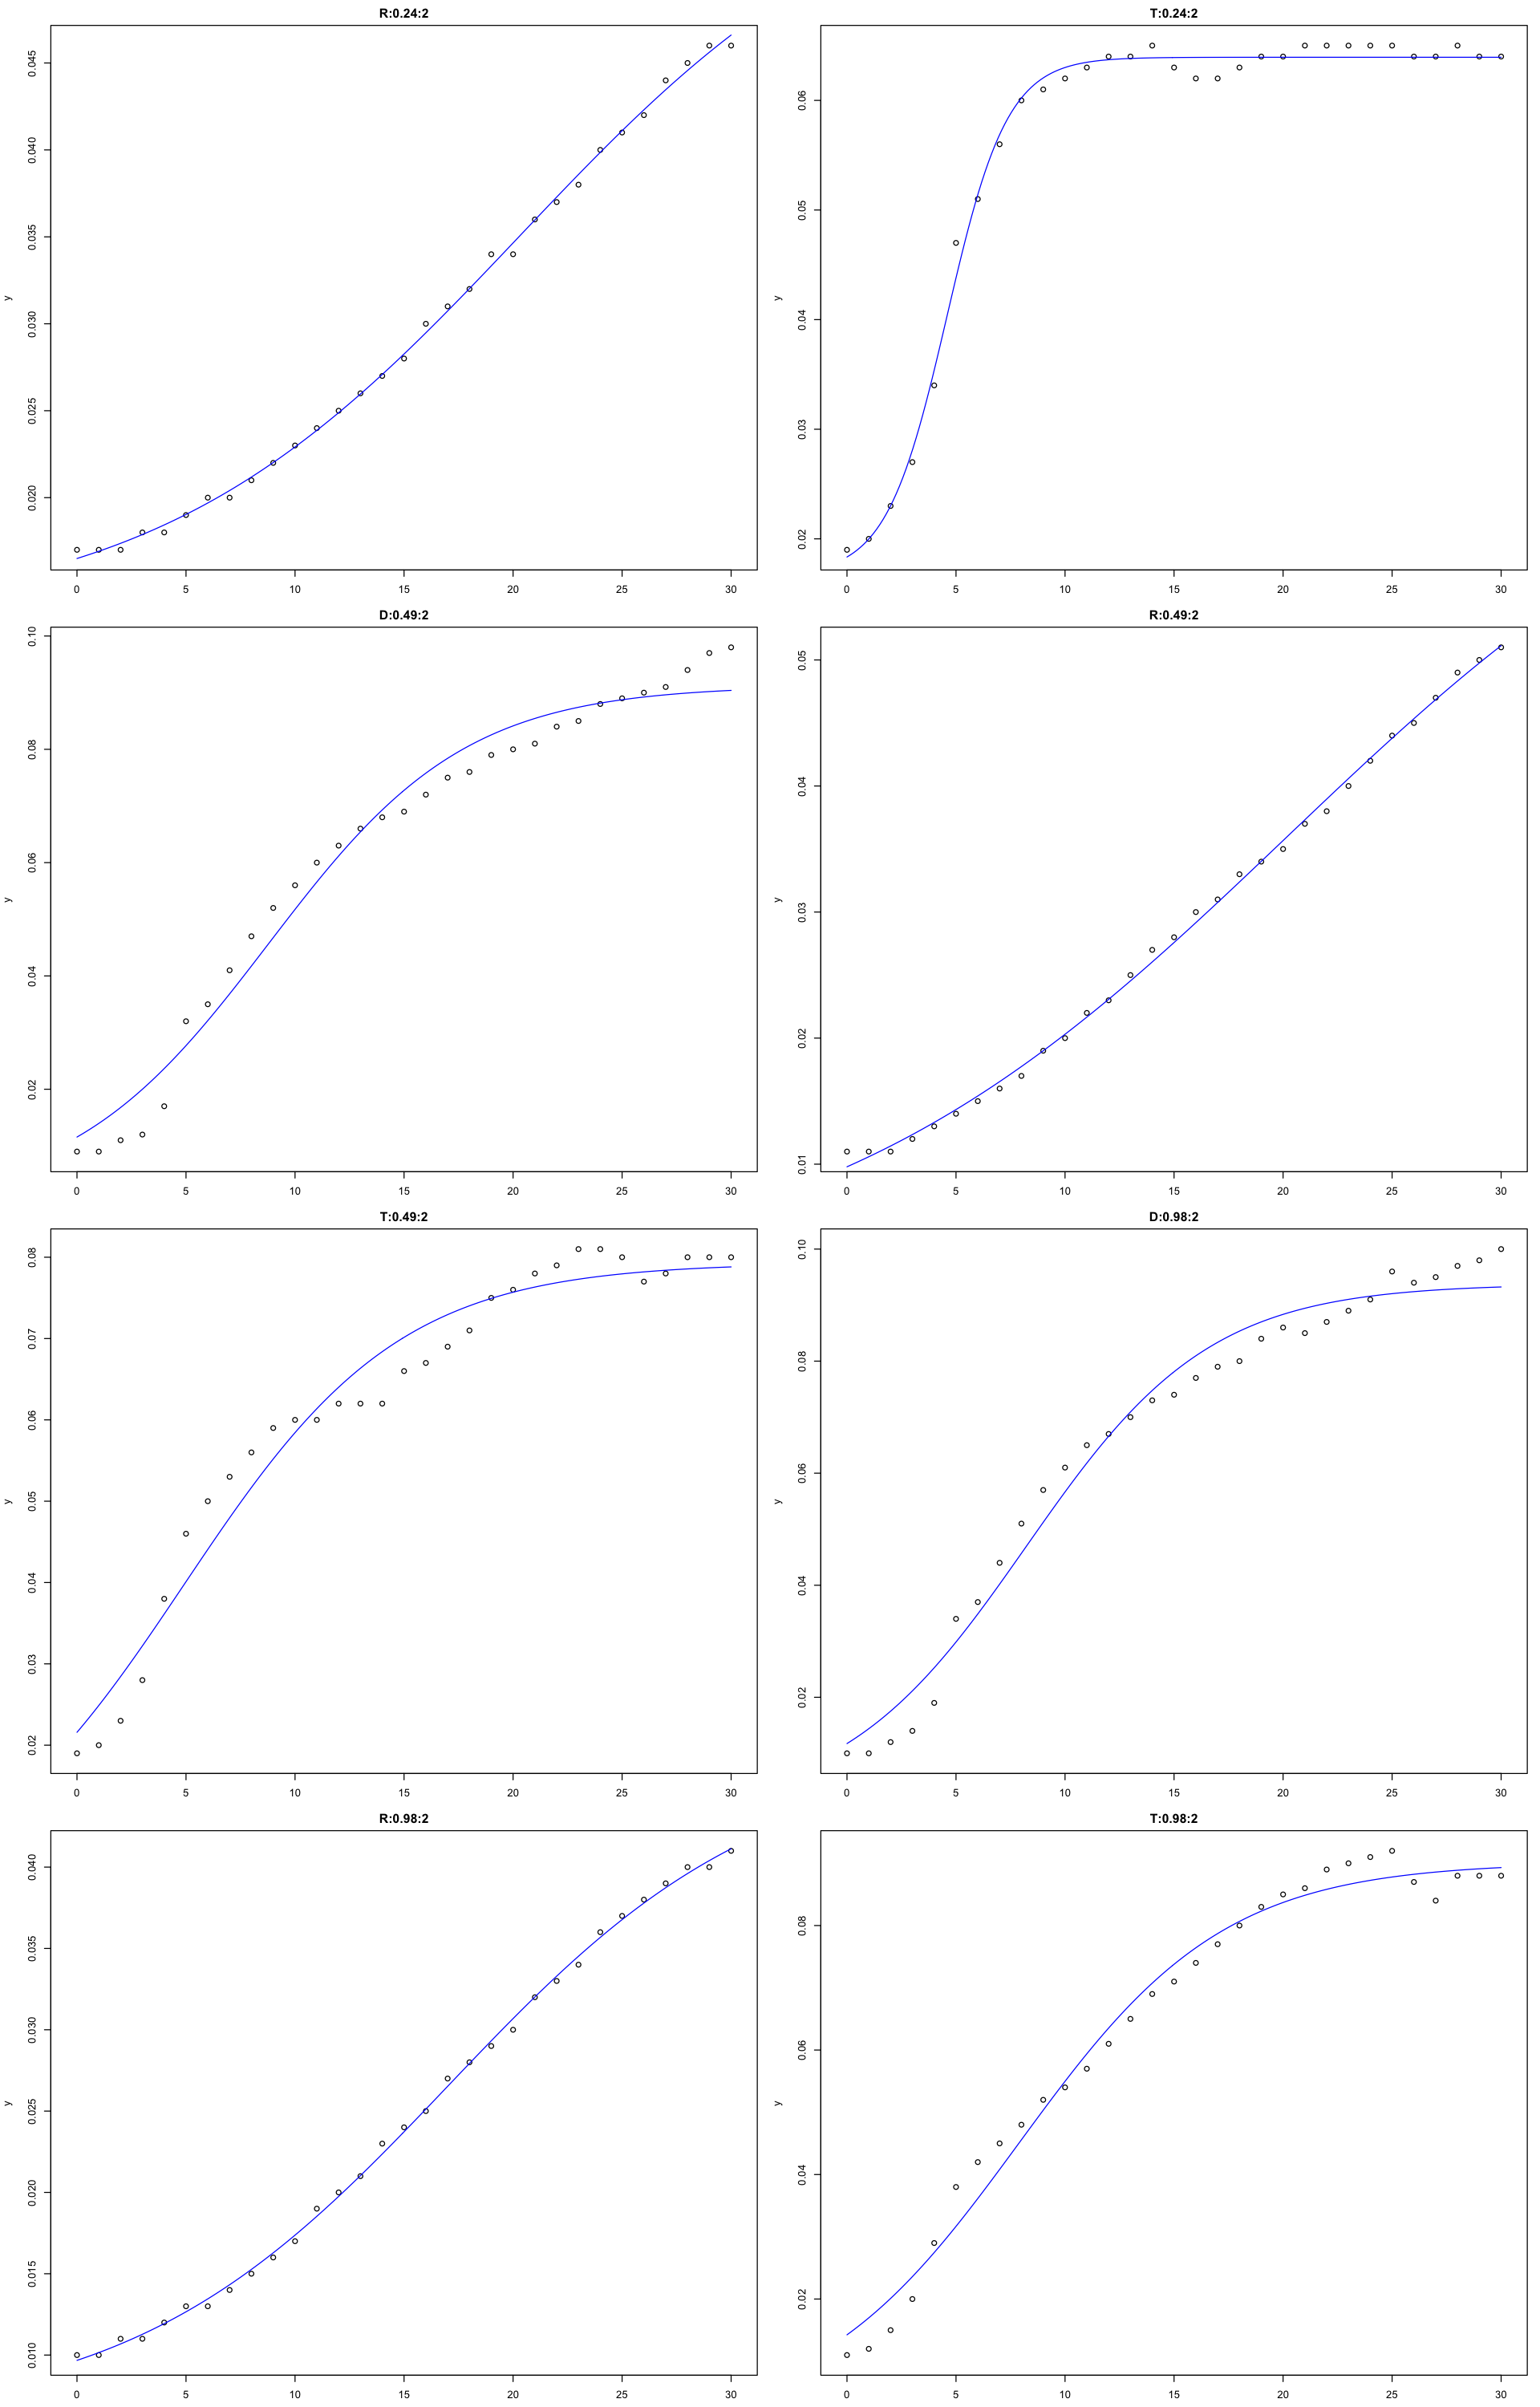

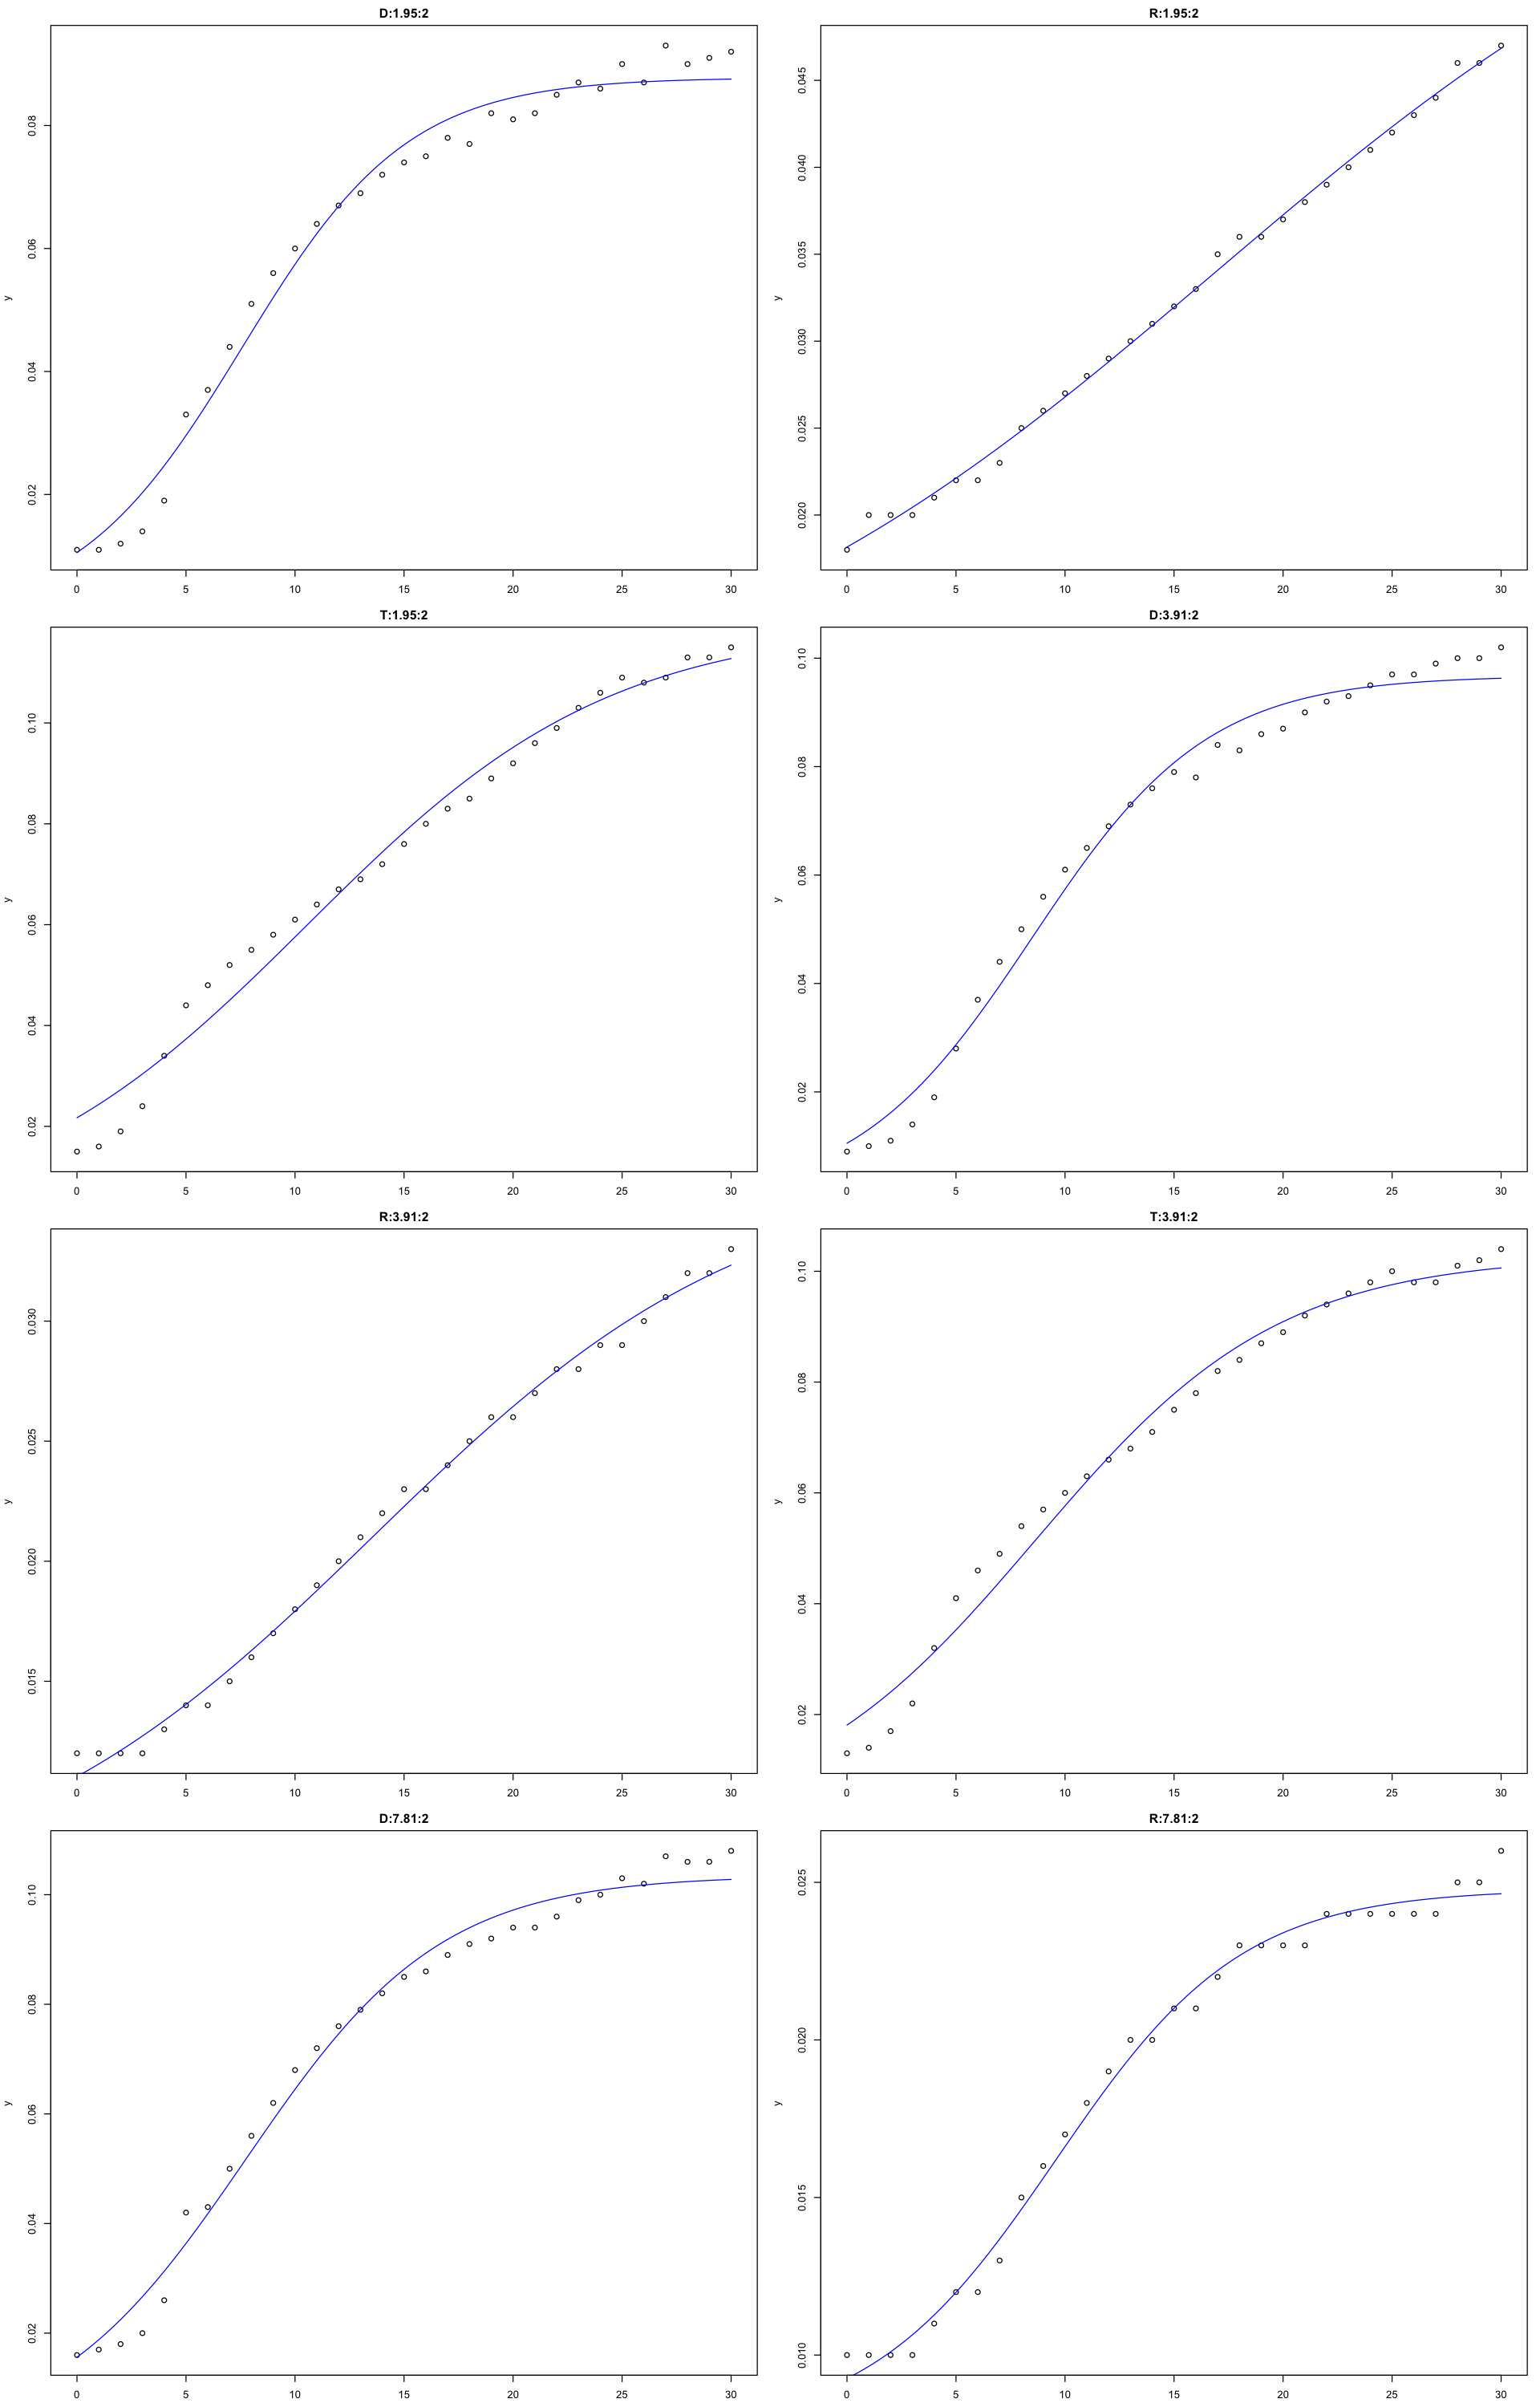

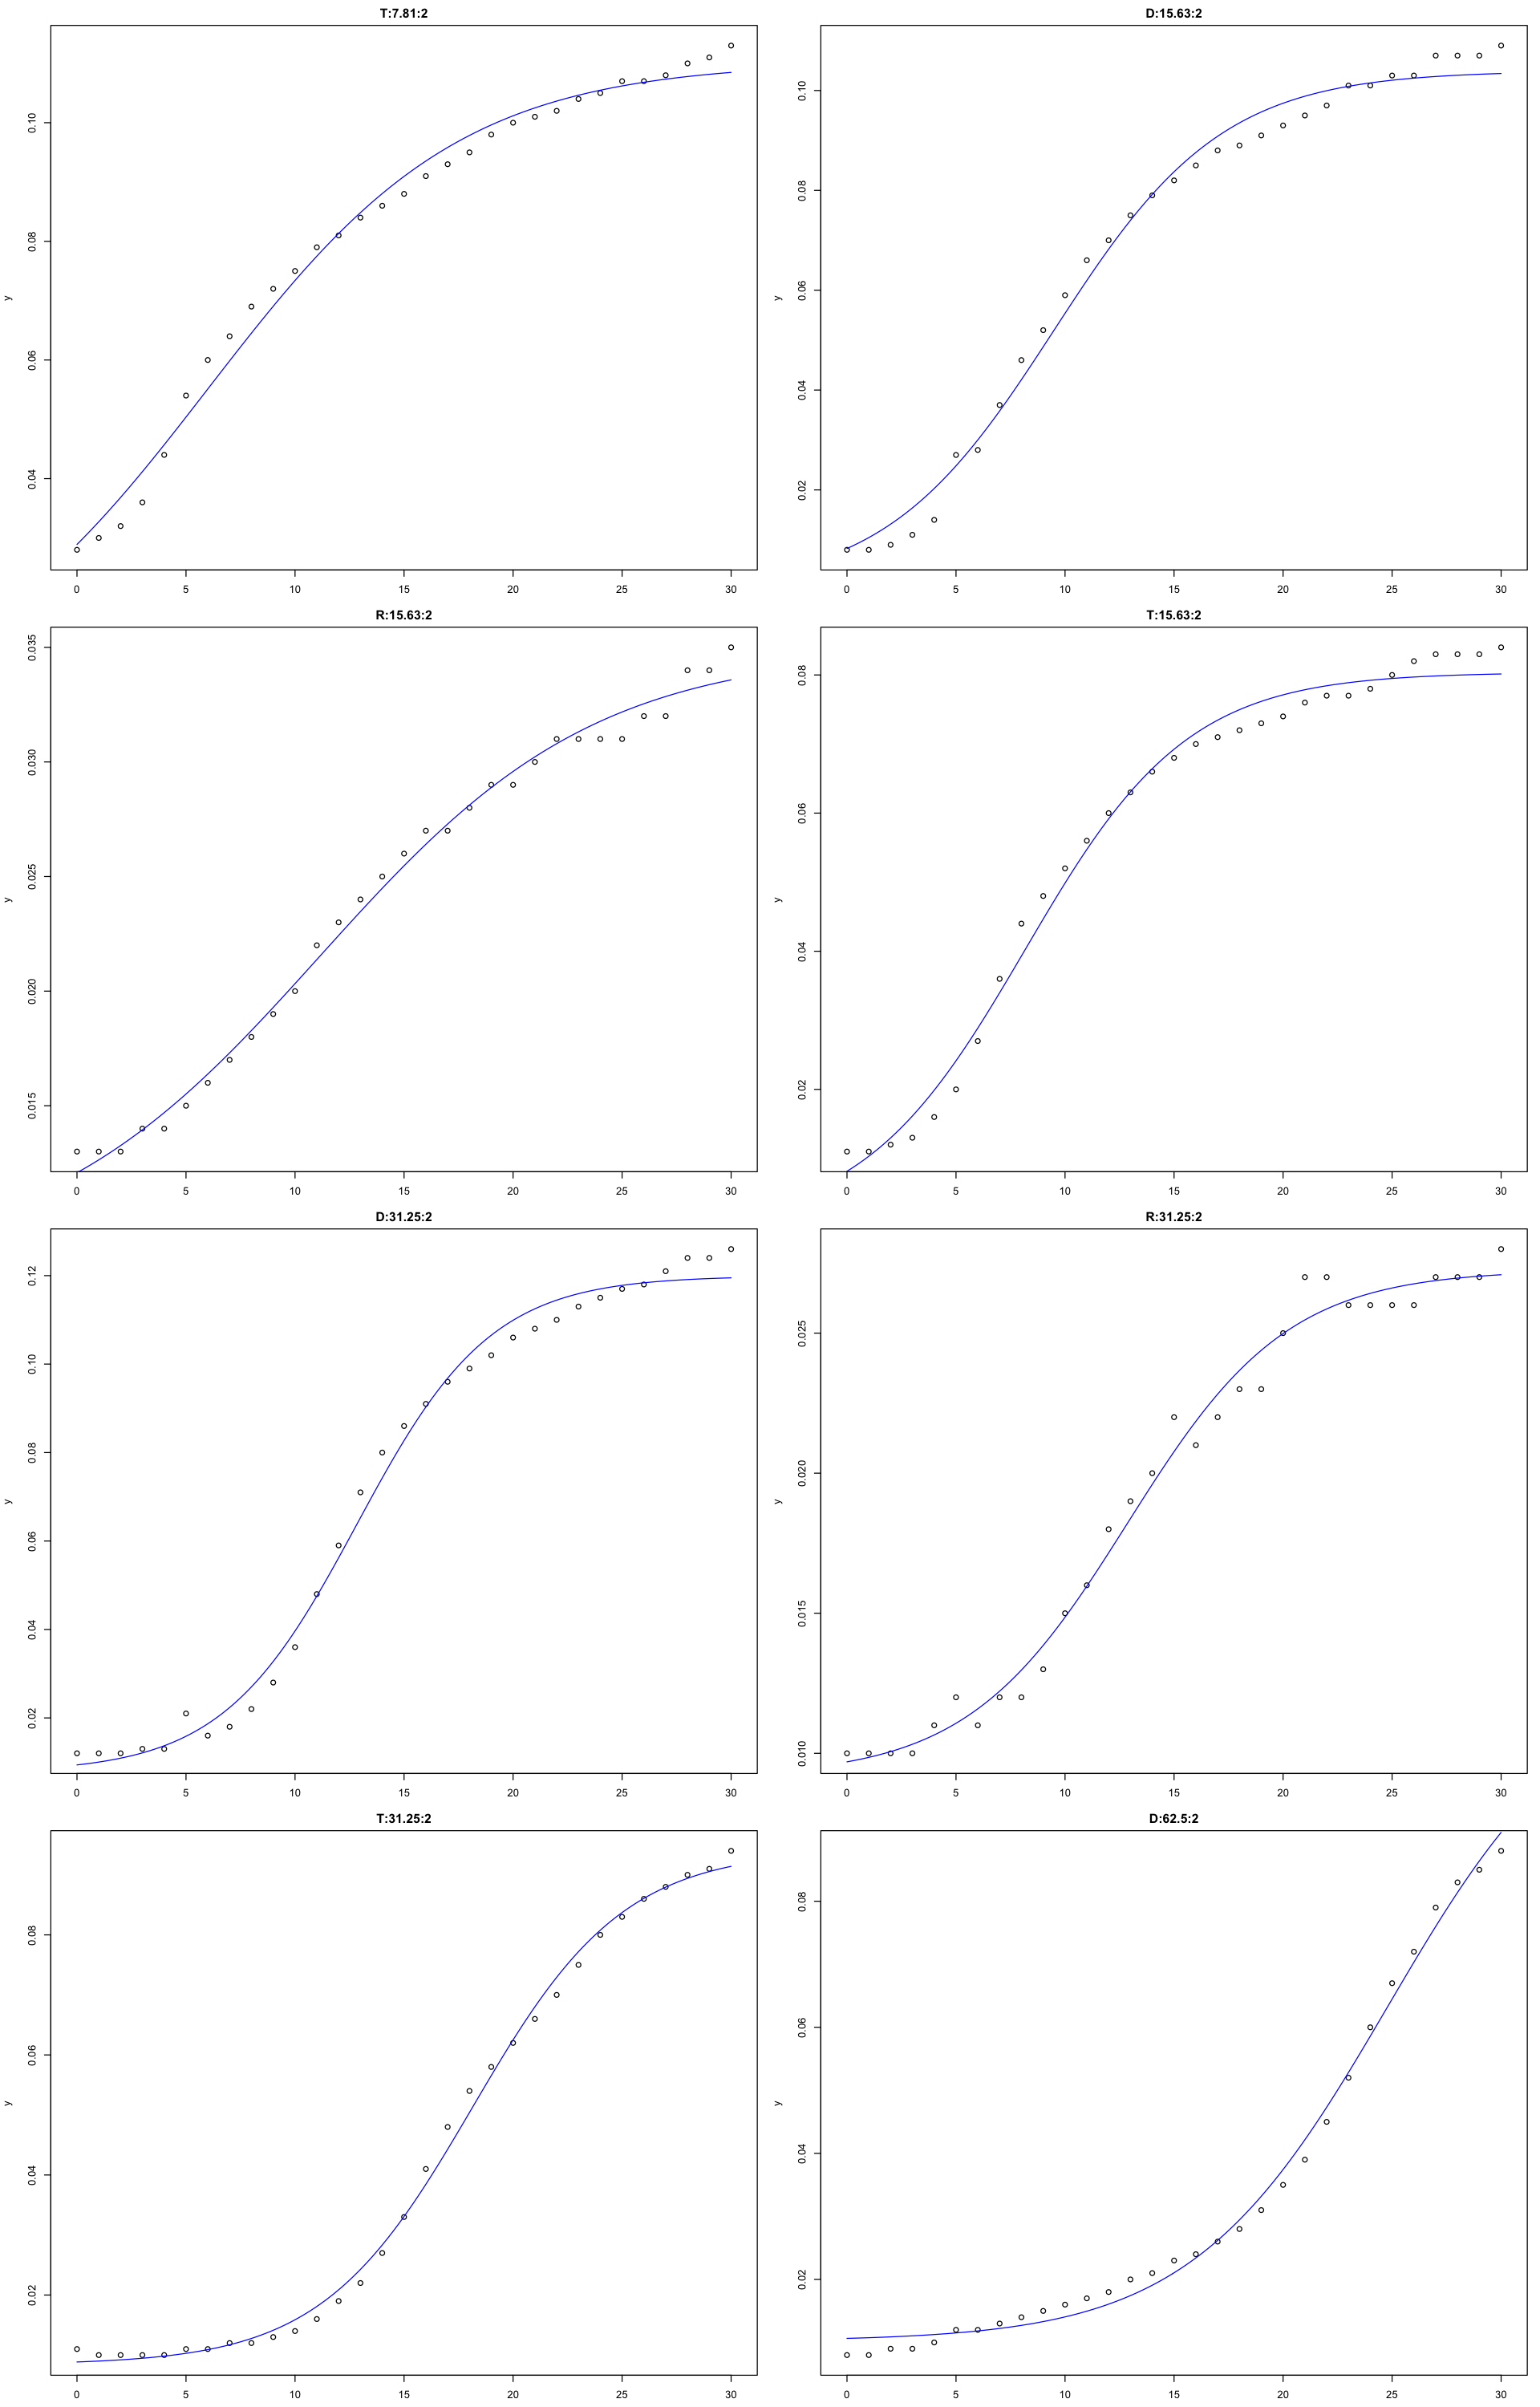

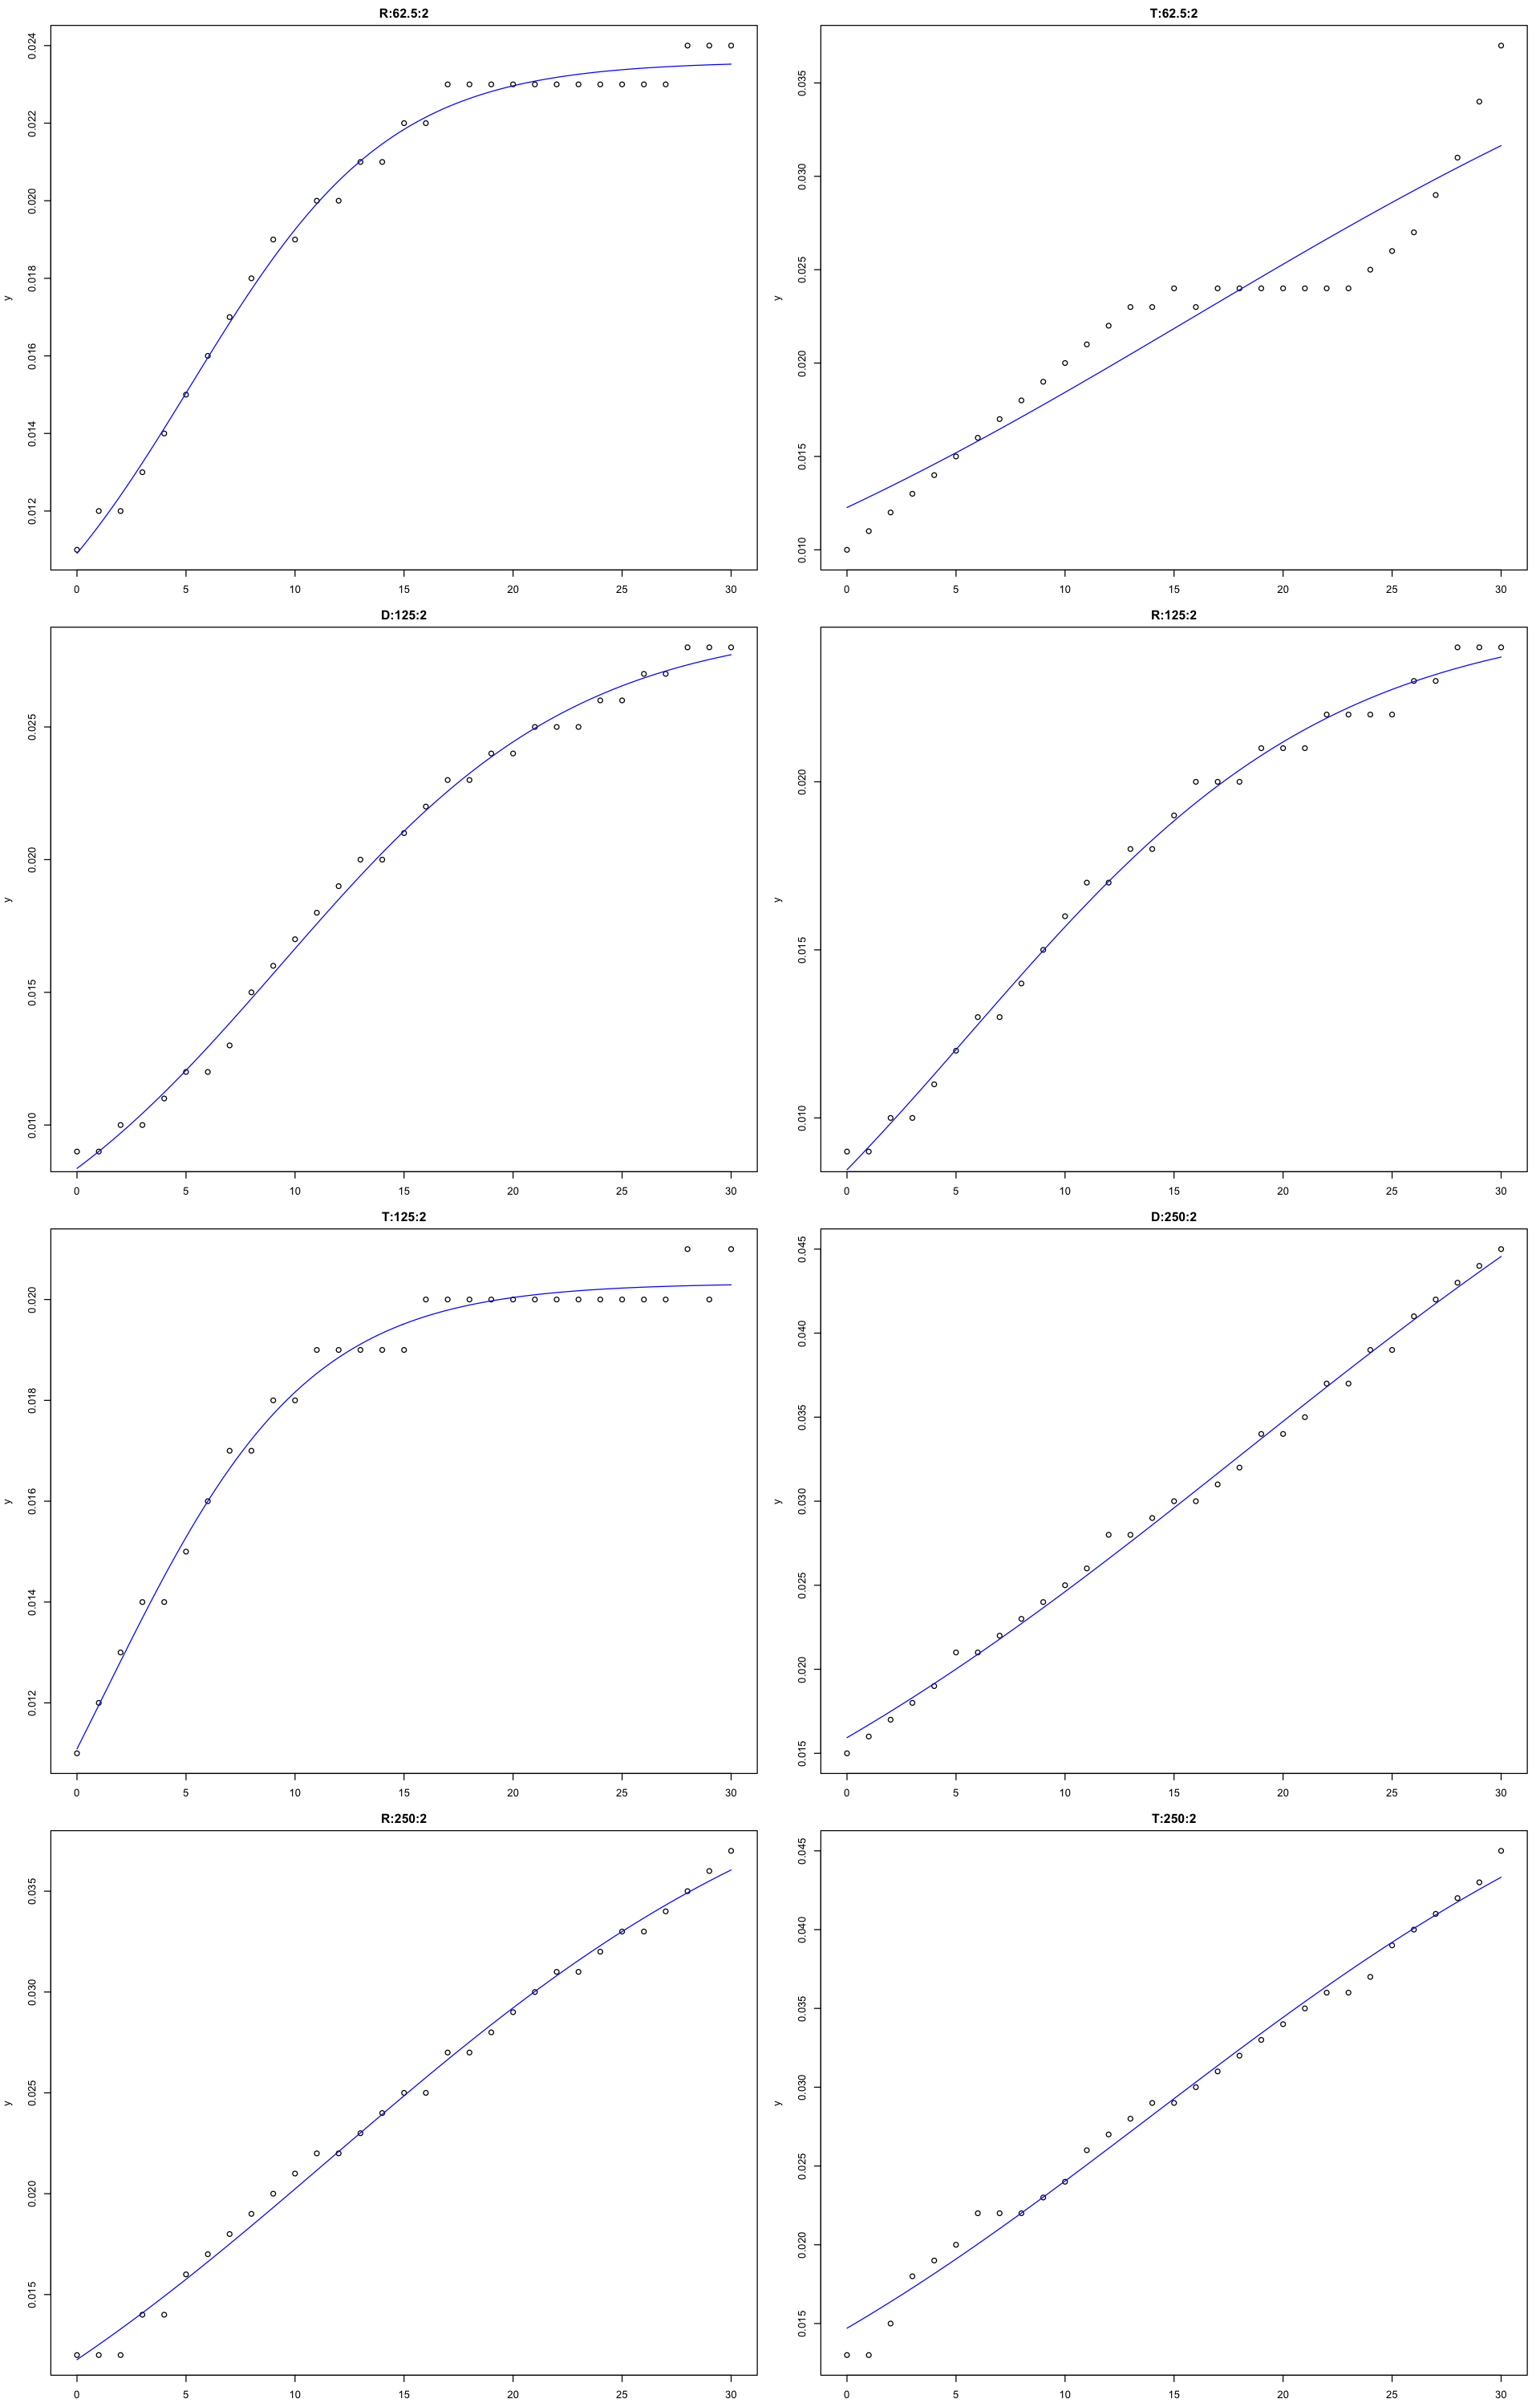

In [60]:
par(mfrow = c(4, 2)) 
par(mar = c(2.5, 4, 2, 1)) 
plot(many_baranyi2)

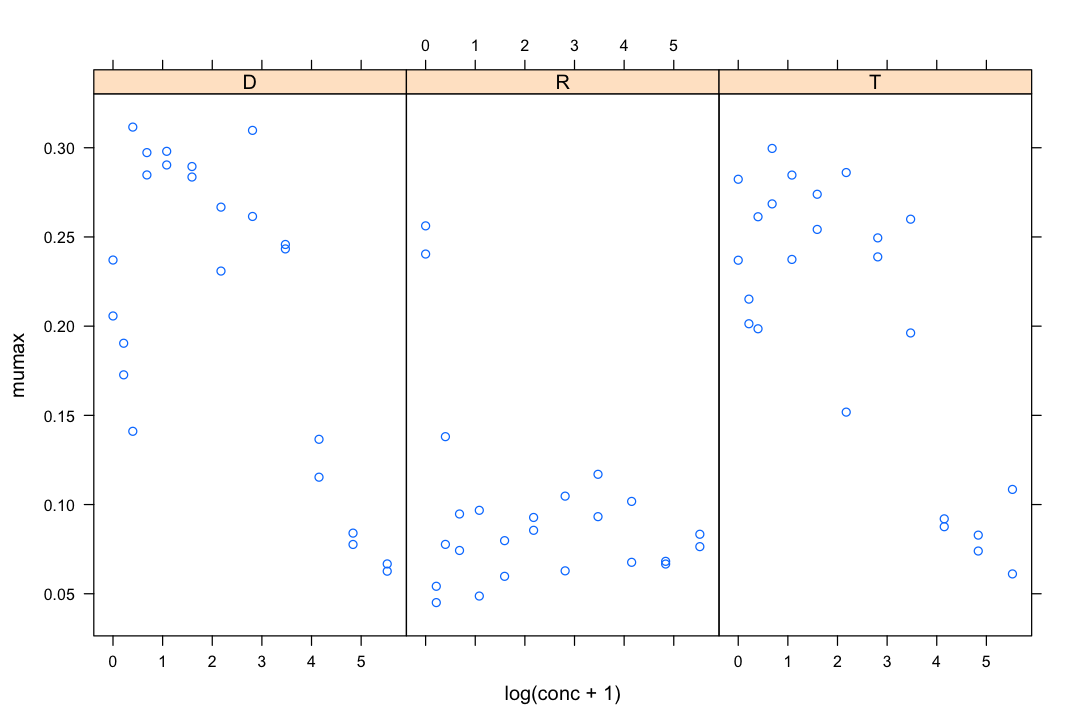

In [66]:
many_spline_res<- results(many_spline_fits)
many_baranyi2_res <- results(many_baranyi2) 
options(repr.plot.width=9, repr.plot.height=6)


xyplot(mumax ~ log(conc+1)|strain, data = many_spline_res, layout = c(3, 1))


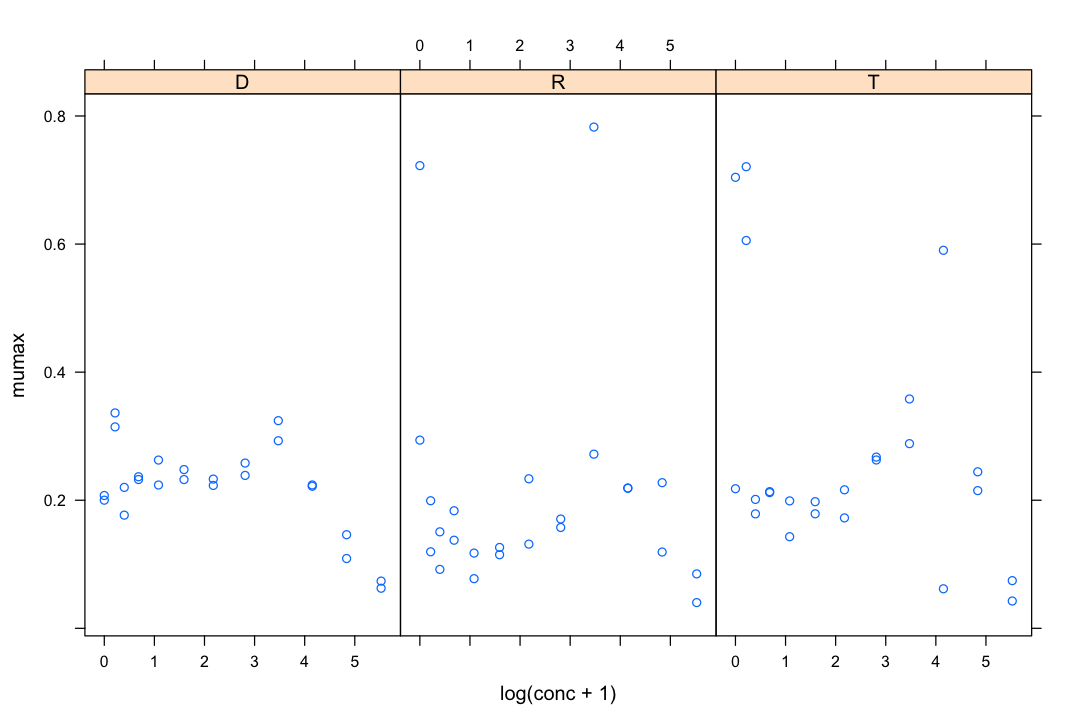

In [67]:
xyplot(mumax ~ log(conc+1)|strain, data = many_baranyi2_res, layout = c(3, 1)) 